# **PRCP-1004-FIFA20** - CLUSTERING CASE

**PROBLEM STATEMENT**
1. To Prepare a complete data analysis report on the given data.

2. To Explore football skills and **cluster** football players based on their attributes.

3. To Explore the data and attempt all the below asked questions in a step by step manner:
- Prepare a rank ordered list of top 10 countries with most players. Which countries are producing the most footballers that play at this level.
- Plot the distribution of overall rating vs. age of players. Interpret what is the age after which a player stops improving.
- Which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger?.


## **BUSINESS CASE**

This case aims at exploring the football skills and **clustering** football players based on their attributes.
The dataset provided includes the players data for the Career Mode from **FIFA 15 to FIFA 20**. The data allows multiple comparisons of the same players across the **last 6 versions of the videogame**.

Exploring the FIFA data can be done by: Historical comparisons between players, Ideal budget to create a competitive team and at which point the budget does not allow to buy significantly better players for the 11-men lineup. An extra is the same comparison with the Potential attribute for the lineup instead of the Overall attribute, in addition, Sample analysis of top n% players to see if some important attributes such as Agility or BallControl or Strength have been popular or not across the FIFA versions. The trend (year on year ) of attributes is also an important indication of how some attributes are necessary for players to win games (a version with more top 5% players with high BallControl stats would indicate that the game is more focused on the technique rather than the physical aspect). Since this case is aims at **clustering** football players based on their attributes we will be using **K-Means** to evaluate the data.



## **DOMAIN ANALYSIS**
- The data consists of players attributes for the FIFA period 15, 16, 17, 18, 19, and also FIFA 20
- it consists of 100+ attributes including;

  a. Player positions, with the role in the club and in the national team
  
  b. Player attributes with statistics as Attacking, Skills, Defense, Mentality, GK Skills, etc.
  
  c. Player personal data like Nationality, Club, DateOfBirth, Wage, Salary, etc.

##  Attributes used in the project are:
- 1. **Name, Age and Height**: these attributes are specific to each  player.  
- 2. **Overall**: (rated 1-99) this is the overall/general performance and value of the player. (this attribute may be used only in preprocessing and discussion stages because using it in modelling could lead to domination by this feature.)
- 3. **Potential**:(rated 1-99) this is the Maximum Overall rating expected to be reached by a player in the top of his career
- 4. **PreferredFoot**: (0- left, 1-right foot< label encoded) preference towards Right or Left foot.
- 5. **WeakFoot**:(left for righties rated between 1 to 5) describes How well a player uses his weak foot
- 6. **WorkRate**: (0 for low, 0.5 for medium and 1 for high < label encoded) this expresses the Degree of the effort the player puts in terms of attack and defense. This feature is divided into two new features as AttackWorkRate and DefenseWorkRate.
- 7. **Position**:(positions rated between 1-99) Position of the players on the pitch which determines their roles and responsibilities in the team. Forward positions in the football and FIFA 19 can be grouped as:

   ***Strikers***-  they are positioned in front of forwards and wingers and very closed to the opposing goal. their ball control, shooting and finishing skills are expected to be well.
   types: **ST**:center striker,**RS**-right striker, **LS**-left striker
  
   ***Forward***-  they have to be good at passing, the Right forwards and left forwards are positioned at the right and left of the center forwards.
      types: **CF**: center forward, **RF**: right forward, **LF**: left forward)

   ***Winger***-  Wingers are positioned near the touchlines.They are expected to be good at dribbling, acceleration, passing and crossing.
      types: **RW**: right winger, **LW**: left winger.
        
    **NOTE: Positions  are used only in preprocessing and discussion stages**

The following Skills are rated between **1-99**
- 8.  **Crossing**:Cross is a long-range pass from wings to center.
- 9.  **Finishing**:Finishing in football refers to finish an attack by scoring a goal.
- 10. **HeadingAccuracy**: Player’s accuracy to pass or shoot by using his head.
- 11. **ShortPassing & LongPassing**: Player’s accuracy for short & long passes respectively.
- 12. **Dribbling**: Dribbling is carrying the ball without losing while moving in one particular direction.
- 13. **SprintSpeed**: this is the Speed rate of the player.
- 14. **Acceleration**: Shows how fast a player can reach his maximum sprint speed.
- 15. **FKAccuracy**: Player’s accuracy to score free kick goals.
- 16. **BallControl**:this is the Player’s ability to control the ball.
- 17. **Balance**: Player’s ability to remain steady while running, carrying and controlling the ball.
- 18. **ShotPower**: Player’s strength level of shooting the ball.
- 19. **Jumping**: the Player’s jumping skill.
- 20. **Penalties**: Player’s accuracy to score goals from penalty.
- 21. **Strength**: the Physical strength of the player.
- 22. **Agility**: Gracefulness and quickness of the player while controlling the ball.
- 23. **Reactions**: Acting speed of the player to what happens in his environment.
- 24. **Aggression**: Aggression level of the player while pushing, pulling and tackling.
- 25. **Positioning**: Player’s ability to place himself in the right position to receive the ball or score goals.
- 26. **Vision**: Player’s mental awareness about the other players in the team for passing.
- 27. **Volleys**: Player’s ability to perform volleys.
- 28. **LongShots**: Player’s accuracy of shoots from long distances.
- 29. **Stamina**: Player’s ability to sustain his stamina level during the match.Players with lower stamina get tired fast.
- 30. **Composure**: Player’s ability to control his calmness and frustration during the match.
- 31. **Curve**: Player’s ability to curve the ball while passing or shooting.
- 32. **Interceptions**: Player’s ability to intercept the ball while opposite team’s players are passing.
- 33. **StandingTackle & SlidingTackle**: Player’s ability to tackle the ball from the opposite player while standing & sliding. these both are defensive skills.
- 34. **Marking**: Player’s ability to prevent opposing team from taking the ball. It is a defensive skill.  



In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')



In [2]:
#read/import csv file
data=pd.read_csv('players_20.csv')

# Basic Checks

In [3]:
data.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  ...   lwb   ldm  \
0        170         72   Argentina         FC Barcelona  ...  68+2  66+2   
1        187         83    Portugal             Juventus  ...  65+3  61+3   
2        175         68      Brazil  Paris Saint-Germain  ...  66+3  61+3   
3        188         87    Slovenia      Atlético Madrid  ...   NaN   NaN   
4        175         74     Belgium          Real Madrid  ...  66+3  63+3   

    cdm   rdm   rwb    lb   lcb    cb   rcb    rb  
0  66+2  66+2  68+2  63+2  52+2  52+2  52+2  63+2  
1  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3  
2  61+3  61+3  66+3  61+3  46+3  46+3  46+3  61+3  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4  63+3  63+3  66+3  61+3  49+3  49+3  49+3  61+3  

[5 rows x 104 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [5]:
print(data.dtypes)

sofifa_id      int64
player_url    object
short_name    object
long_name     object
age            int64
               ...  
lb            object
lcb           object
cb            object
rcb           object
rb            object
Length: 104, dtype: object


In [6]:
data.describe()

sofifa_id           age     height_cm     weight_kg       overall  \
count   18278.000000  18278.000000  18278.000000  18278.000000  18278.000000   
mean   219738.864482     25.283291    181.362184     75.276343     66.244994   
std     27960.200461      4.656964      6.756961      7.047744      6.949953   
min       768.000000     16.000000    156.000000     50.000000     48.000000   
25%    204445.500000     22.000000    177.000000     70.000000     62.000000   
50%    226165.000000     25.000000    181.000000     75.000000     66.000000   
75%    240795.750000     29.000000    186.000000     80.000000     71.000000   
max    252905.000000     42.000000    205.000000    110.000000     94.000000   

          potential     value_eur       wage_eur  international_reputation  \
count  18278.000000  1.827800e+04   18278.000000              18278.000000   
mean      71.546887  2.484038e+06    9456.942773                  1.103184   
std        6.139669  5.585481e+06   21351.714095                  0.378861   
min       49.000000  0.000000e+00       0.000000                  1.000000   
25%       67.000000  3.250000e+05    1000.000000                  1.000000   
50%       71.000000  7.000000e+05    3000.000000                  1.000000   
75%       75.000000  2.100000e+06    8000.000000                  1.000000   
max       95.000000  1.055000e+08  565000.000000                  5.000000   

          weak_foot  ...  mentality_penalties  mentality_composure  \
count  18278.000000  ...         18278.000000         18278.000000   
mean       2.944250  ...            48.383357            58.528778   
std        0.664656  ...            15.708099            11.880840   
min        1.000000  ...             7.000000            12.000000   
25%        3.000000  ...            39.000000            51.000000   
50%        3.000000  ...            49.000000            60.000000   
75%        3.000000  ...            60.000000            67.000000   
max        5.000000  ...            92.000000            96.000000   

       defending_marking  defending_standing_tackle  defending_sliding_tackle  \
count       18278.000000               18278.000000              18278.000000   
mean           46.848889                  47.640333                 45.606631   
std            20.091287                  21.585641                 21.217734   
min             1.000000                   5.000000                  3.000000   
25%            29.000000                  27.000000                 24.000000   
50%            52.000000                  55.000000                 52.000000   
75%            64.000000                  66.000000                 64.000000   
max            94.000000                  92.000000                 90.000000   

       goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
count        18278.000000          18278.000000         18278.000000   
mean            16.572765             16.354853            16.212934   
std             17.738069             16.996925            16.613665   
min              1.000000              1.000000             1.000000   
25%              8.000000              8.000000             8.000000   
50%             11.000000             11.000000            11.000000   
75%             14.000000             14.000000            14.000000   
max             90.000000             92.000000            93.000000   

       goalkeeping_positioning  goalkeeping_reflexes  
count             18278.000000          18278.000000  
mean                 16.368038             16.709924  
std                  17.136497             18.038125  
min                   1.000000              1.000000  
25%                   8.000000              8.000000  
50%                  11.000000             11.000000  
75%                  14.000000             14.000000  
max                  91.000000             92.000000  

[8 rows x 61 columns]

**As the data set has 104 columns, we will try to delete the unnecessary columns such as:
sofifa_id, player_url, long_name and dob.**

In [7]:
data.drop(["sofifa_id", "player_url", "long_name", "dob"], axis = 1, inplace = True)  #we'll keep short_name for identification

**checking other columns**

In [8]:
data.columns

Index(['short_name', 'age', 'height_cm', 'weight_kg', 'nationality', 'club',
       'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'player_tags', 'team_position',
       'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until',
       'nation_position', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'player_traits', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_re

In [9]:
print("The number of rows in the dataset are:", data.shape[0])
print("The number of columns in the dataset are:", data.shape[1])

The number of rows in the dataset are: 18278
The number of columns in the dataset are: 100


## EXPLORATORY DATA ANALYSIS

### Task 1: A complete data analysis report on the given data.


### Task 2: Football skills and clustering football players based on their attributes.

In [10]:
# First remove the special character from data
data = data.replace('[\#]','',regex=True)
data.head(1)

short_name  age  height_cm  weight_kg nationality          club  overall  \
0   L. Messi   32        170         72   Argentina  FC Barcelona       94   

   potential  value_eur  wage_eur  ...   lwb   ldm   cdm   rdm   rwb    lb  \
0         94   95500000    565000  ...  68+2  66+2  66+2  66+2  68+2  63+2   

    lcb    cb   rcb    rb  
0  52+2  52+2  52+2  63+2  

[1 rows x 100 columns]

In [11]:
# Split the column and remove the '+' with the values after them
columns = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm',
           'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']
data[columns]

for colmun in columns: # for itertion of columns
    data[colmun] = data[colmun].str.split('+',expand=True)[0] # Split of string
data.head(1)


short_name  age  height_cm  weight_kg nationality          club  overall  \
0   L. Messi   32        170         72   Argentina  FC Barcelona       94   

   potential  value_eur  wage_eur  ... lwb ldm  cdm  rdm  rwb  lb lcb  cb  \
0         94   95500000    565000  ...  68  66   66   66   68  63  52  52   

   rcb  rb  
0   52  63  

[1 rows x 100 columns]

#### 1.UNIVARIATE ANALYSIS

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
univariate = data[[ 'age',  'height_cm', 'weight_kg','overall', 'potential', 'value_eur', 'wage_eur',
                   'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type',
                   'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number',
                   'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing',
                   'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
                   'gk_positioning','attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
                   'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy',
                   'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
                   'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping',
                   'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
                   'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking',
                   'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling',
                   'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'ls', 'st', 'rs', 'lw', 'lf',
                   'cf', 'rf', 'rw', 'lam','cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb',
                   'lb', 'lcb', 'cb', 'rcb', 'rb']]
import sweetviz
sv = sweetviz.analyze(univariate)
sv.show_html() #Generate default argument

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### OBSERVATIONS:
##### 1.AGE:
* The player age ranges from 16 to 42, with an average age of 25.3.

##### 2.HEIGHT CM:
* The average height of a player is 181.4cm, maximum height is 205 and minimum height is 156cm.

##### 3.WEIGHT KG:
* The weight of players ranges between 50 to 110 kg.

##### 4.OVERALL:
* The stats have a maximum score of 94 and a minimum of 48.0, with an average of 66.2.

##### 5.POTENTIAL:
* The maximum score of player potential is 95.0 and minimum score of potential is 49.0

##### 6.VALUE EUR:
* The average value of player is 2.5million.
* Maximum value of player is 105.5 million.

##### 7.WAGE EUR:
* The maximum living wage of player is 565k with the average of 9k.

##### 8.PREFEERED FOOT:
* 75% of player prefeered right foot.
* 25% of player prefeered left foot.

##### 9.INTERNATIONAL REPUTATION:
* The range of international reputation is 1 to 5.
* 92% of players rated with 1, 6% of player is rated with 2 and remaining player rated with 3,4,5 rating.

##### 10.WEEK FOOT:
* A week foot is rated between 1 to 5.
* Most of week foot player rating is 3

##### 11.SKILL MOVES:
* The skill moves range between 1 to 5.
* 2 skill moves is maximum in player as well as 36% is 3 and 11% is 1 skill moves.

##### 12.WORK RATE:
* The work rate "medium" comprises the maximum count of 54%, while "high/medium" represents 18%.

##### 13.BODY TYPE:
* 59% player body type is normal
* 36% player body type is lean.

##### 14.REAL FACE:
* 89% player face is not real and remaining 11% face is real in game.

##### 15. RELEASE CLAUSE EUR:
* The maximum release clause of player is 165.8million with the average of 4.7 million

##### 16. PLAYER TAGS:
* Strength, acrobat, engine, and speedster- these tags are the most in the  player tags

##### 17.TEAM POSITION & NATION POSITION:
*The position "SUB" has the highest count of 7280, and "RES" team position has 2958 occurrences. All other positions have counts less than 5%.

##### 18.TEAM JERSEY NUMBER:
*The team jersey number ranges from 1 to 99, with the maximum jersey number falling between 1 to 40.

##### 19.CONTRACT VALID UNTIL:
* Most of the players' contracts are valid until 2020, 23%  of player contracts are valid until 2021
* The contract year ranges from 2019 to 2026.

##### 20.NATION JERSEY NUMBER:
*The nation jersey numbers range from 1 to 30, with the majority of the jersey numbers falling between 1 to 20.

##### 21.PACE:
*The majority of the players' pace falls between 60 to 80.

##### 22.SHOOTING:
*The shooting score ranges from 15 to 93, with the most common shooting scores clustering around 25 to 70.

##### 23.PASSING:
* The range of passing score of the player is 24 to 92 with the average 57.2.

##### 24. DRIBBLING:
* The most no of dribbling score between 50 to 80.

##### 25.DEFENDING:
* The range of defending between 15 to 90.the Most no of defending score between 50 to 70.

##### 26.PHYSIC:
* The physic score range between 27.0 to 90.0 the most no of physcore between 60 to 80

##### 27.GK DIVING:
* Most no of score of gk diving between 60 to 70
* The range of gk diving between 44 to 90.

##### 28. GK HANDLING:
* The most observation of gk handling between 60 to 70, maximum score is 92 and minimum score is 42

##### 29.GK KICKING:
* The range of gk kicking in between 35.0 to 93.0 with the average of 61.8.

##### 30.GK REFLEX:
* Most of the gk reflex between 60 to 70.

##### 31.GK SPPED:
* The highest speed of of gk is 65.0, most no of gk speed between 25 to 50

##### 32. GK POSITIONING:
* Most gk positioning score is 65 and maximum score is 91 as well as minimum score is 41

##### 33. ATTACKING CROSSING:
* The attacking crossing range between 5 to 93, the most observation of attacking passing between 50 to 70

##### 34.ATTACKING FINISHING:
* Most of the attacking finishing is 60,Maximum 95 and minimum 2 attacking finishing.

##### 35.ATTACKING HEADING ACCURACY:
* Heading accuracy range between 5 to 93,most observation of attacking heading accuracy between 50 to 60

##### 36.ATTACKING SHORT PASSING:
* most observation of attacking short passing between 60 to 70

##### 37.ATTACKING VOLLEYS:
* most observation of attacking volleys between 30 to 70 with the average of 42.8.

##### 38.SKILL DRIBBLING:
* most observation of skill dribbling is 65.
* The range of skill dribbling between 4 to 97

##### 39.SKILL CURVE:
* The most observation of skill curve between 40 to 70, maximum score is 94 and minimum score is 6

##### 40.SKILL FK ACCURACY:
* The maximum accuracy is 94 and minimum accuracy is 4 with the average of 42.7

##### 41.SKILL  LONG PASSING:
* The most observation of skill long passing between 50 to 60, maximum score is 92 and minimum score is 8

##### 42.SKILL BALL CONTROL:
* The maximum skill ball control is 96 and minimum skill ball control is 5 with the average of 58.5

##### 43.MOVEMENT ACCELERATION:
* The most observation of movement acceleration between 60 to 80, maximum score is 97 and minimum score is 12

##### 44.MOVEMENT  SPRINT SPPED:
* Maximum sprint speed is 96 and minimum sprint speed is 11 with the average of 64.4

##### 45.MOVEMENT AGILITY:
* Maximum movement agility is 96 and minimum movement agility is 11 with the average of 63.5

##### 46.MOVEMENT REACTION:
* Maximum movement reaction is 96 and minimum movement reaction is 21 with the average of 61.8

##### 47.MOVEMENT BALANCE:
* The range of movement balance is 12 to 97 with 64.9 average.

##### 48.POWER SHOT POWER:
* Maximum shot power is 95 and minimum shot power is 14 with the average of 58.2

##### 49.POWER JUMPING:
* Maximum power jumping is 95 and minimum power jumping is 19 with the average of 64.9

##### 50.POWER STAMINA:
* Maximum power stamina is 97 and minimum shot stamina is 12 with the average of 62.9

##### 51.POWER STRENGTH:
* Maximum power strength is 97 and minimum power strength is 20 with the average of 65.2

##### 51.POWER LONG SHOT:
* Maximum power long shot is 94 and minimum power long shot is 4 with the average of 46.8

##### 52.MENTALITY AGGRESSION:
* Maximum mentality aggression is 95 and minimum mentality aggression is 9 with the average of 55.7

##### 53.MENTALITY INTERCEPTIONS:
* Maximum mentality interception is 93 and minimum mentality interception is 3 with the average of 46.3

##### 54.MENTALITY POSITIONING:
* Maximum mentality positioning is 95 and minimum mentality positioning is 2 with the average of 50.1

##### 55.MENTALITY VISION:
* Maximum mentality vision is 94 and minimum mentality vision is 9 with the average of 53.6

##### 56.MENTALITY PENALTIES:
* Maximum mentality penalties is 92 and minimum mentality penalties is 7 with the average of 48.7

##### 58.MENTALITY COMPOSER:
* Maximum mentality composure is 96 and minimum mentality composure is 12 with the average of 58.5

##### 59.DEFENDING MARKING:
* Maximum defending marking is 94 and minimum defending marking is 1 with the average of 46.8

##### 60.DEFENDING STANDING TACKLE:
* Maximum defending standing tackle is 92 and minimum defending standing tackle is 5 with the average of 47.6

##### 61.DEFENDING SLIDING TACKLE:
* Maximum defending sliding tackle  is 90 and minimum defending sliding tackle  is 3 with the average of 45.6

##### 62.GOALKEEPING DIVING:
* Maximum goalkeeping diving is 90 and minimum goalkeeping diving is 1 with the average of 16.6

##### 63.GOALKEEPING HANDLING:
* Maximum goalkeeping diving is 92 and minimum goalkeeping diving is 1 with the average of 16.4

##### 63.GOALKEEPING KICKING:
* Maximum goalkeeping diving is 93 and minimum goalkeeping diving is 1 with the average of 16.2

##### 63.GOALKEEPING POSITIONING:
* Maximum goalkeeping diving is 91 and minimum goalkeeping diving is 1 with the average of 16.4

##### 63.GOALKEEPING REFLEX:
* Maximum goalkeeping diving is 92 and minimum goalkeeping diving is 1 with the average of 16.7

#### 64.PLAYER POSITIONS
##### [LS, ST, RS, LW, LF, CF, LF, RW, LAM, CAM, RAM, LM, LCM, CM, RCM, RM, LWB, LDM, CDM, RDM, RWB, LB, LCB, CB, RCB, RB]
* All position scores are nearly similar, with most of the observations falling within the range of 56 to 63.

#### BIVARIATE AND MULTIVARIATE ANALYSIS

#### NUMERICAL VARIABLE

Age Vs movement reactions


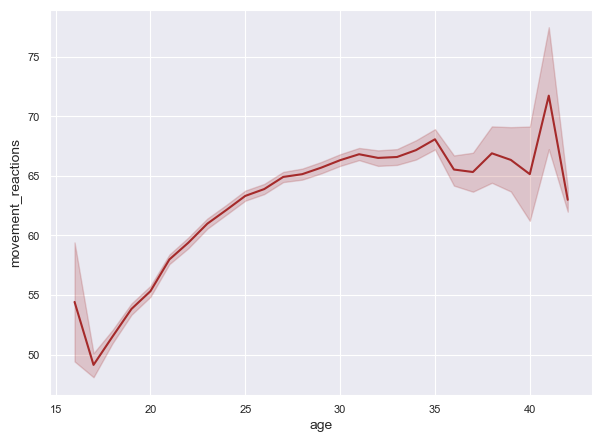

In [14]:
plt.figure(figsize=(7,5))
sns.set_style('darkgrid')
sns.lineplot(x='age',y='movement_reactions',data=data,color='brown')
plt.show()

##### OBSERVATION:
* At the age 15 to 20 movement raction is less.
* If player age is increasing player movement reaction also increasing.

##### 2.IMPACT OF HEIGHT TO WEIGHT

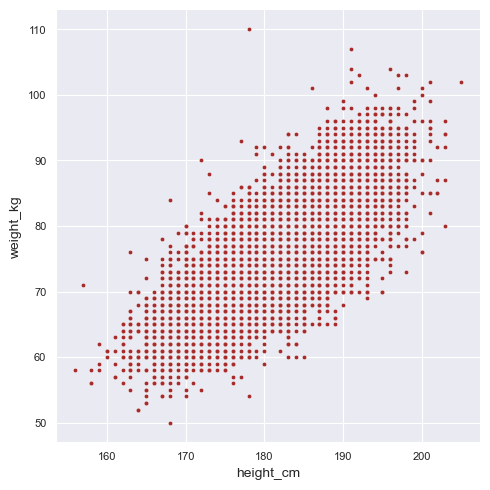

In [15]:
sns.relplot(x='height_cm',y='weight_kg',data=data,color='brown')
plt.show()

##### OBSERVATION:
* If the players height increases player weight also increases.

3.RELATION BETWEEN OVERALL AND POTENTIAL WITH RESPECT TO PREFERRED FOOT

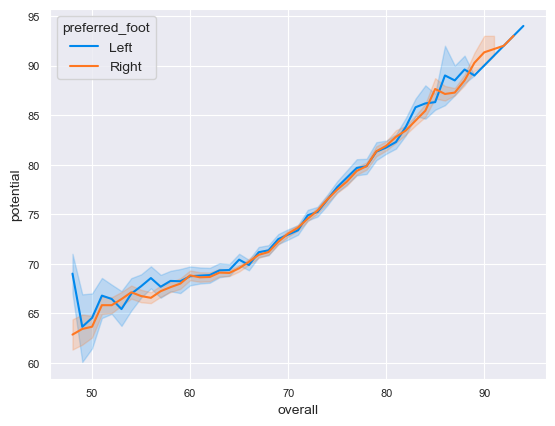

In [16]:
sns.lineplot(x='overall',y='potential',data=data,color='brown',hue='preferred_foot')
plt.show()

##### OBSERVATION:
* If the players overall score is increasing the score of potential also increasing with both foot.

##### 4.RELATION BETWEEN VALUE EUR AND WAGE EURO WITH RESPECT TO PREFERRED FOOT

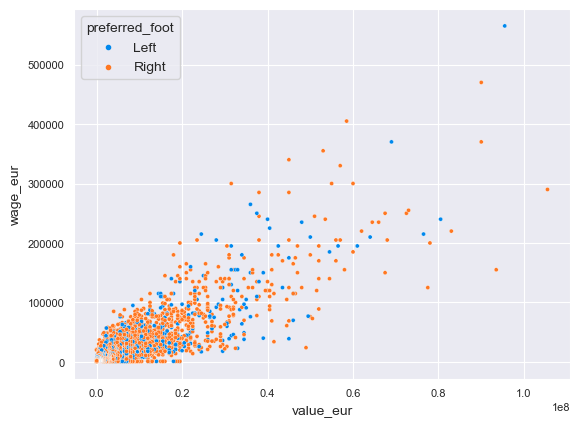

In [17]:
sns.scatterplot(x='value_eur',y='wage_eur',data=data,color='brown',hue='preferred_foot')
plt.show()

##### OBSERVATION:
* If player value is less then the wage of player also less.
* If the value of player is more the wage is silghtly more.

##### 5.IMPACT OF CONTRACT VALID UNTIL TO RELEASE CLAUSE EUR

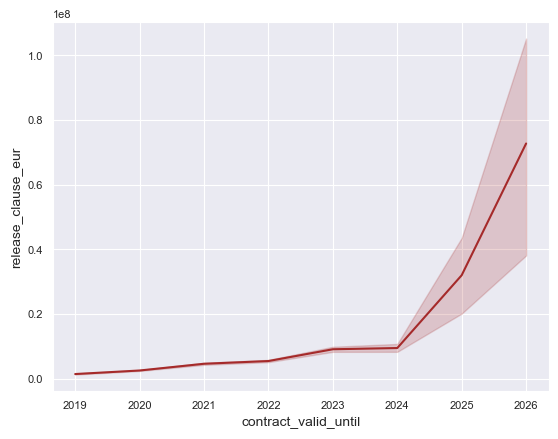

In [18]:
sns.lineplot(x='contract_valid_until',y='release_clause_eur',data=data,color='brown')
plt.show()

##### OBSERVATION:
* If player contract valid until 2024 to 2026 then the relase clause of player is more.
* If player contract valid until 2019 to 2024 then the release clause of player is less.

##### 6..RELATION BETWEEN PACE AND SHOOTING WITH RESPECT TO PREFERRED FOOT

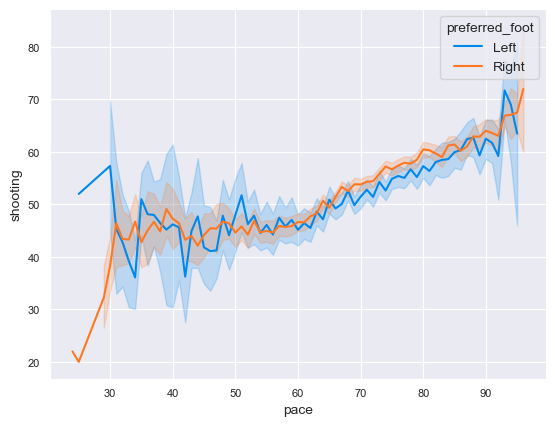

In [19]:
sns.lineplot(x='pace',y='shooting',data=data,color='brown',hue='preferred_foot')
plt.show()

OBSERVATION:
If the player preferred left foot then the pace is less but shooting is around 50 to 60.
If the player preferred right foot then the pace is less as well as shooting also less.

In [20]:
#IMPACT OF DRIBBLING TO DEFENDING

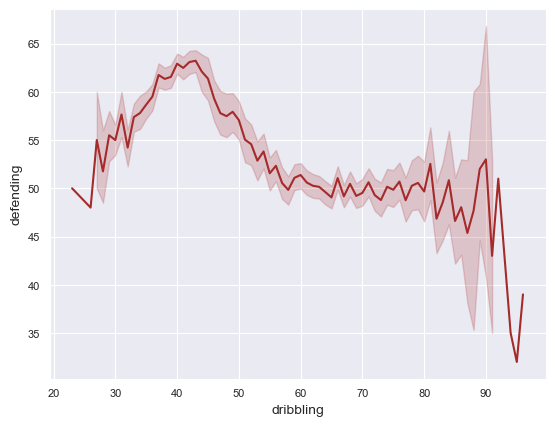

In [21]:
sns.lineplot(x='dribbling',y='defending',data=data,color='brown')
plt.show()

OBSERVATION:
If the dribbling score is 30 to 50 then the defending score is high.
If dribbling score is more then the defending score also less.

### IMPACT OF PHYSIC TO ATTACKING CROSSING

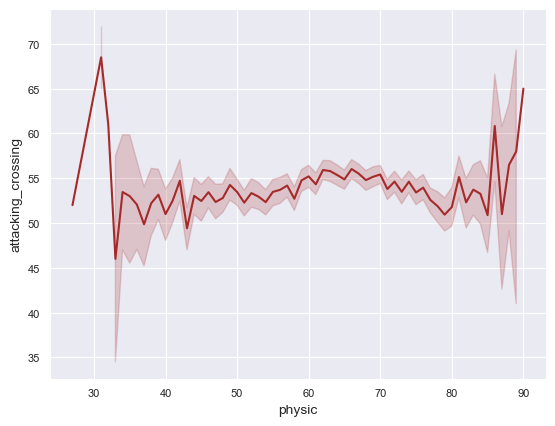

In [22]:
sns.lineplot(x='physic',y='attacking_crossing',data=data,color='brown')
plt.show()

##### OBSERVATION:
* If the physic is less then the attacking crossing is more.
* Otherwise physic range between 35 to 80 the attacking crossing is constant.

### IMPACT OF GK DIVING TO GK HANDLING

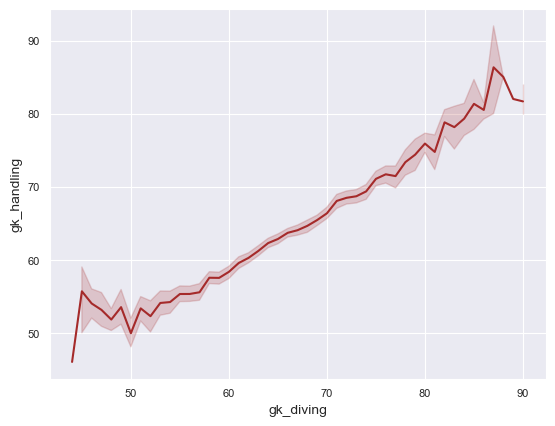

In [23]:
sns.lineplot(x='gk_diving',y='gk_handling',data=data,color='brown')
plt.show()

##### OBSERVATION:
* If the gk diving score is increases the gk handling score also increases.

### IMPACT OF GK RELEXES TO GK SPEED

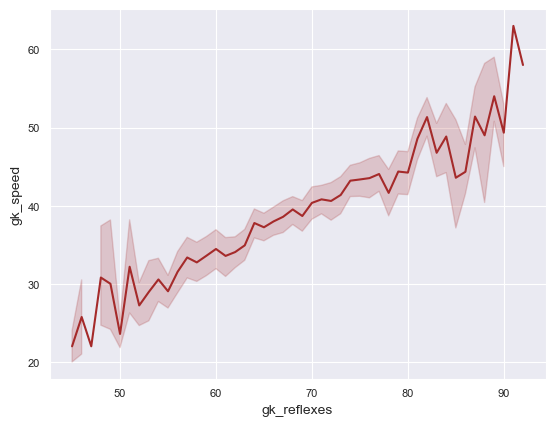

In [24]:
sns.lineplot(x='gk_reflexes',y='gk_speed',data=data,color='brown')
plt.show()

##### OBSERVATION:
* Less gk reflexes then the gk speed also less.
* More gk reflexes then the gk speed also more.

##### IMPACT OF GK POSITIONING TO GK KICKING

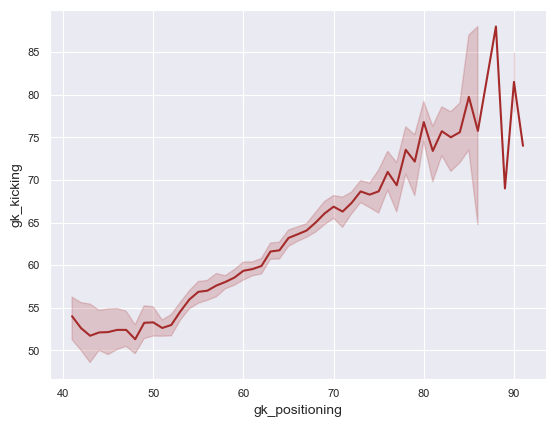

In [25]:
sns.lineplot(x='gk_positioning',y='gk_kicking',data=data,color='brown')
plt.show()

##### OBSERVATION:
* If the gk positioning score is less then the gk kicking score also less.
* If the gk positioning score is increases then the gk kicking score also increases.

##### IMPACT OF ATTACKING CROSSING TO ATTACKING FINISHING

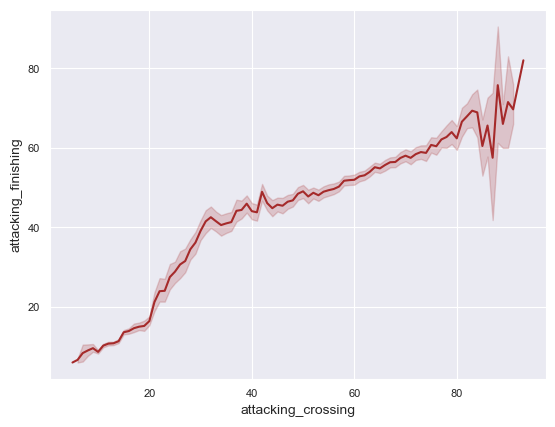

In [26]:
sns.lineplot(x='attacking_crossing',y='attacking_finishing',data=data,color='brown')
plt.show()

##### OBSERVATION:
* Attcking score between 20 to 40 then attacking finishing score around 40 to 50.
* Either attacking crossing is more then attacking finishing also more.

##### IMPACT OF ATTACKING SHORT PASSING TO ATTACKING VOLLEYS

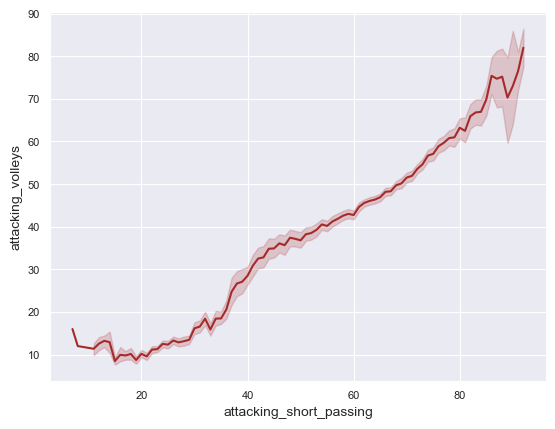

In [27]:
sns.lineplot(x='attacking_short_passing',y='attacking_volleys',data=data,color='brown')
plt.show()

##### OBSERVATION:
* More attacking short passing then the more attacking volleys.
* Less attacking short passing then the less attacking volleys.

##### IMPACT OF SKILL DRIBBLING TO SKILL BALL CONTROL

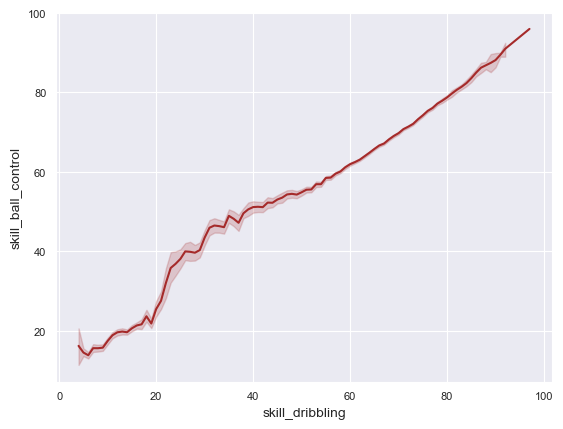

In [28]:
sns.lineplot(x='skill_dribbling',y='skill_ball_control',data=data,color='brown')
plt.show()

##### OBSERVATION:
* If the dribbling skill is more then ball control skill also more.

##### RELATION BETWEEN SKILL CURVE AND SKILL FK ACCURACY WITH RESPECT TO PREFERRED FOOT

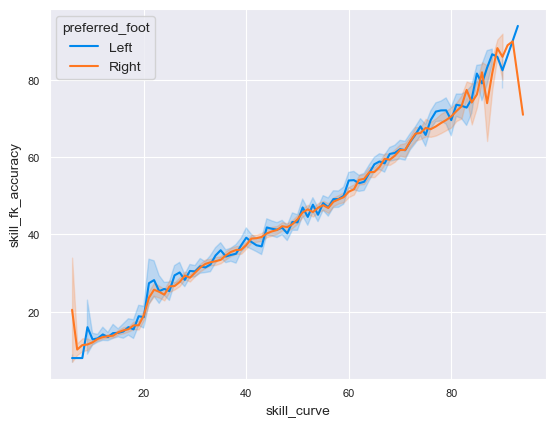

In [29]:
sns.lineplot(x='skill_curve',y='skill_fk_accuracy',data=data,color='brown',hue='preferred_foot')
plt.show()

##### OBSERVATION:
* If skill curve is increases then the skill fk accuracy is also increases with both foot.

##### IMPACT OF SKILL LONG PASSING TO POWER LONG SHOTS

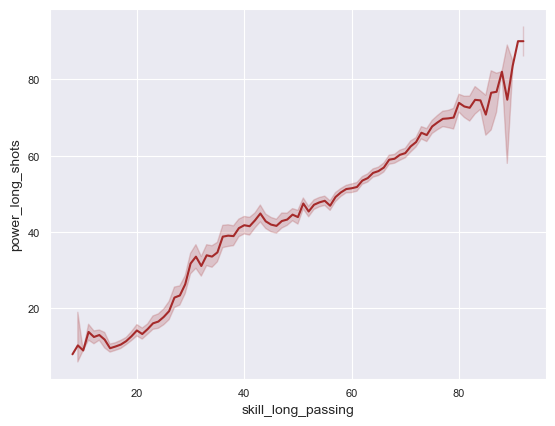

In [30]:
sns.lineplot(x='skill_long_passing',y='power_long_shots',data=data,color='brown')
plt.show()

##### OBSERVATION:
* More skills of long passing then the increase of power long shots.

##### IMPACT OF MOVEMENT SPRINT SPEED TO MOVEMENT REACTION

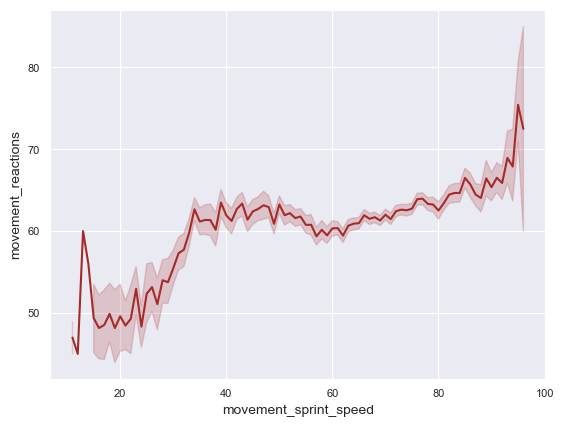

In [31]:
sns.lineplot(x='movement_sprint_speed',y='movement_reactions',data=data,color='brown')
plt.show()

##### OBSERVATION:
* Movement sprint range around 40 to 100 then the movement reaction is constant otherwise fall in both

##### IMPACT OF POWER SHOT TO POWER STAMINA

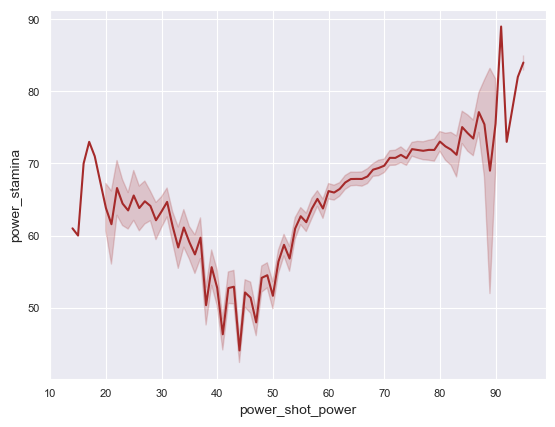

In [32]:
sns.lineplot(x='power_shot_power',y='power_stamina',data=data,color='brown')
plt.show()

##### OBSERVATION:
* If the power shot range around 30 to 60 then the power stamina is decreases
* If the player has more shot power then the stamina is more.

##### IMPACT OF POWER JUMPING TO POWER STRENGTH

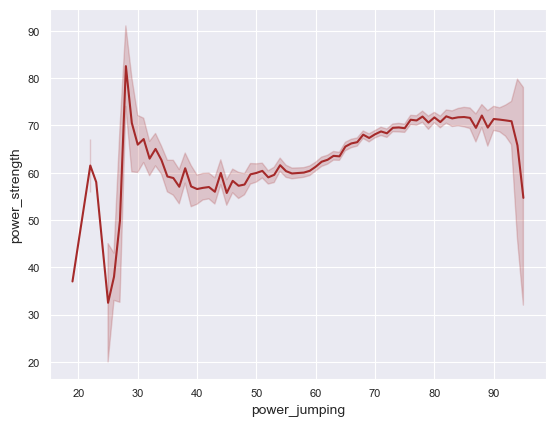

In [33]:
sns.lineplot(x='power_jumping',y='power_strength',data=data,color='brown')
plt.show()

##### OBSERVATION:
* If the power jumping is 30 then the power strength is more and below 30 power jumping less power strength.
* Power jumping above 30 then the power strength is constant

##### IMPACT TO MENTALITY AGGRESSION TO MENTALITY POSITIONING

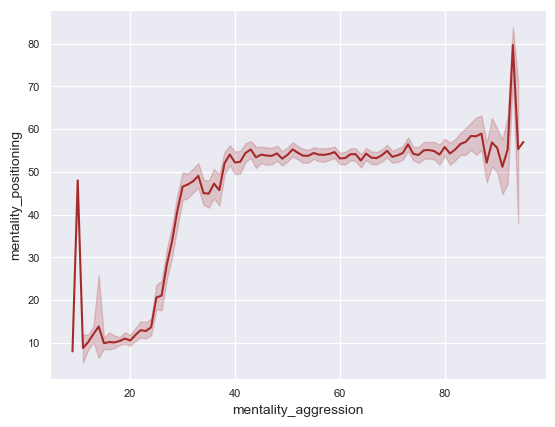

In [34]:
sns.lineplot(x='mentality_aggression',y='mentality_positioning',data=data,color='brown')
plt.show()

##### OBSERVATION:
* If the mentality aggression around 10 to 30 then the mentality positioning is low
* Below 10 mentality aggression the score of mentality positioning is slightly high. otherwise both metality positioning score is constant.

##### IMPACT OF MENTALITY PENALTIES TO MENTALITY VISION

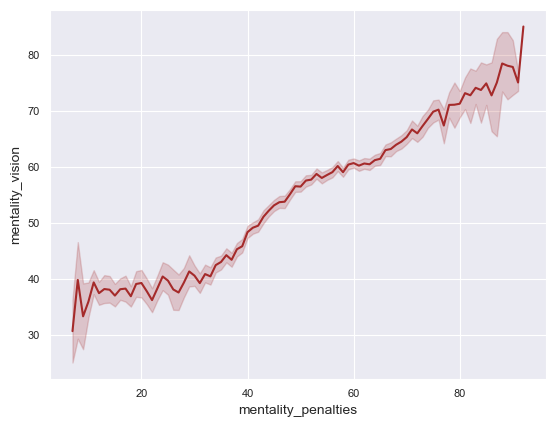

In [35]:
sns.lineplot(x='mentality_penalties',y='mentality_vision',data=data,color='brown')
plt.show()

##### OBSERVATION:
* If the penalties is increases then the mentality vision also increases.

##### RELATION BETWEEN DEFENDING STANDING TACKLE & DEFENDING SLIDING TACKLE WITH RESPECT TO PREFERRED FOOT

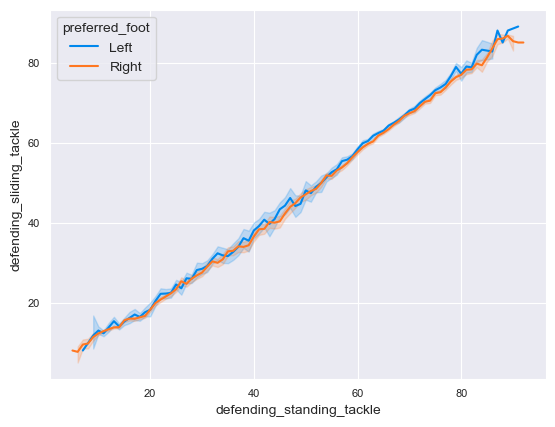

In [36]:
sns.lineplot(x='defending_standing_tackle',y='defending_sliding_tackle',data=data,color='brown',hue='preferred_foot')
plt.show()

##### OBSERVATION:
* If defending standing tackle is increases then the defending sliding tackle also increases with both foot.

### CATEGORICAL VARIABLE

##### IMPACT OF INTERNATIONAL REPUTATION TO WEAK FOOT

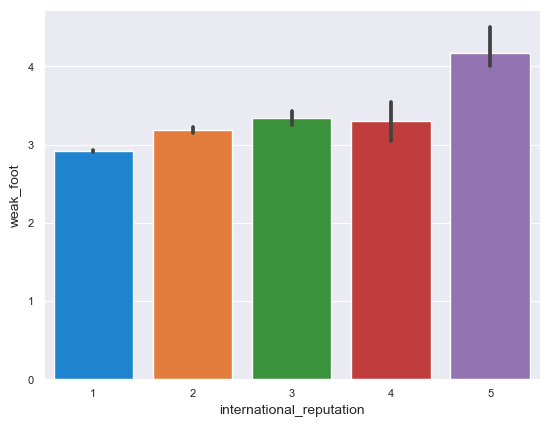

In [37]:
sns.barplot(x='international_reputation',y='weak_foot',data=data)
plt.show()

##### OBSERVATION:
* 5 Intrenational reputation rating of player has more than 4 week foot
* 1 international reputation rating player has less than 3 weak foot
* 2, 3, 4 international reputation player has constant weak foot

##### IMPACT OF WORK RATE TO SKILL MOVES

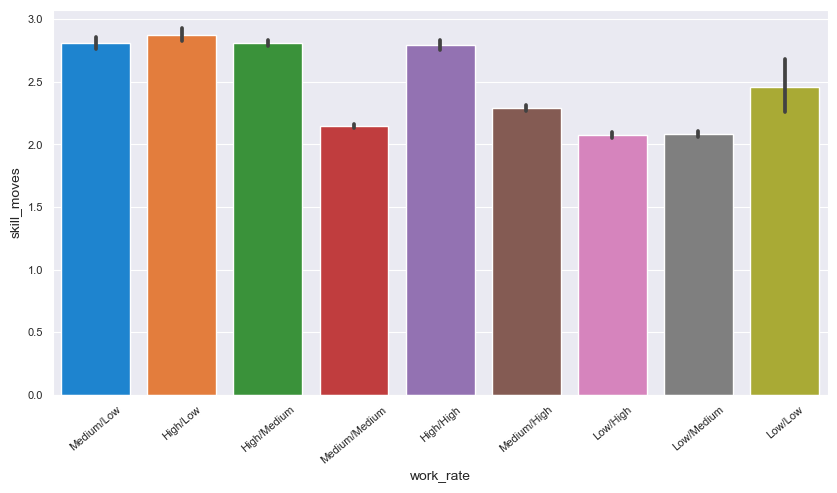

In [38]:
plt.figure(figsize=(10,5))
sns.barplot(x='work_rate',y='skill_moves',data=data)
plt.xticks(rotation=40)
plt.show()

##### OBSERVATION:
* In this plot cleary seen that 4 types of work rate[medium/low, high/low, high/medium, high/high] has more than 2.5 skill moves
* Other work rate skill moves is less than 2.5

#### IMPACT OF REAL FACE TO RELEASE CLAUSE EUR

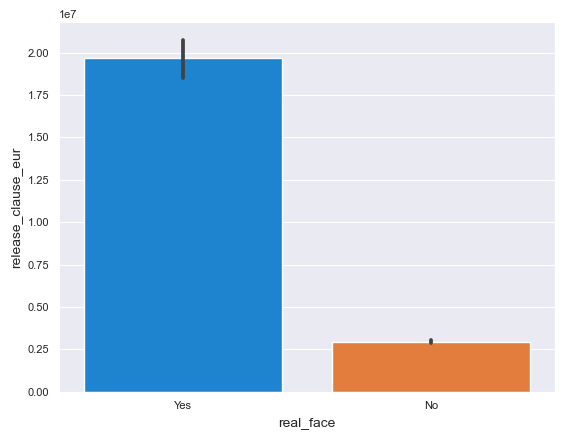

In [39]:
sns.barplot(x='real_face',y='release_clause_eur',data=data)
plt.show()

##### OBSERVATION:
* If the player face is real then the release clause is more.
* If the player face is not real then the release clause is less

##### IMPACT OF PREFERRED FOOT TO PACE

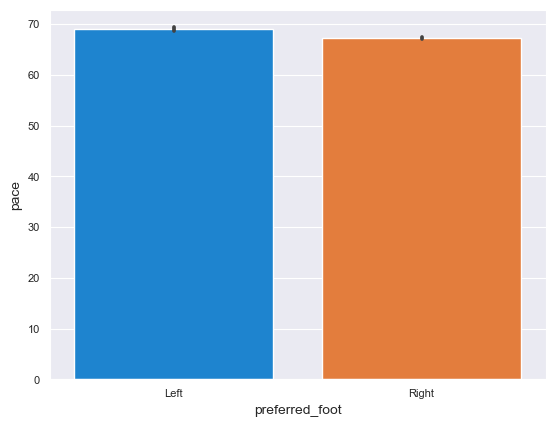

In [40]:
sns.barplot(x='preferred_foot',y='pace',data=data)
plt.show()

##### OBSERVATION:
* both left and right preferred foot player pace is same.

##### IMPACT OF TEAM POSITION TO SHOOTING

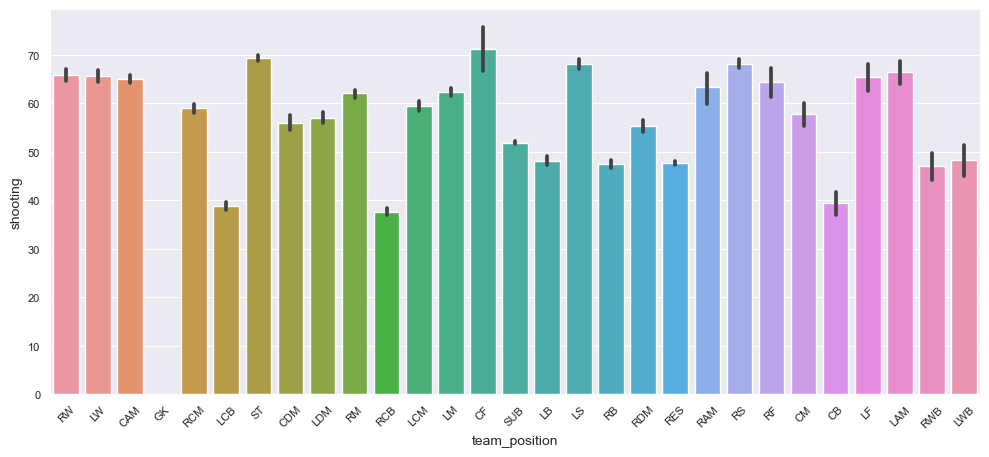

In [41]:
plt.figure(figsize=(12,5))
sns.barplot(x='team_position',y='shooting',data=data)
plt.xticks(rotation=45)
plt.show()

##### OBSERVATION:
* In this plot we clearly seent that GK team position has no shooting score.
* CF team position has maximum shooting score.


###  Here are some conditions for plotting

### Task 3 - A
A rank ordered list of top 10 countries with most players/ countries producing the most footballers that play at this level

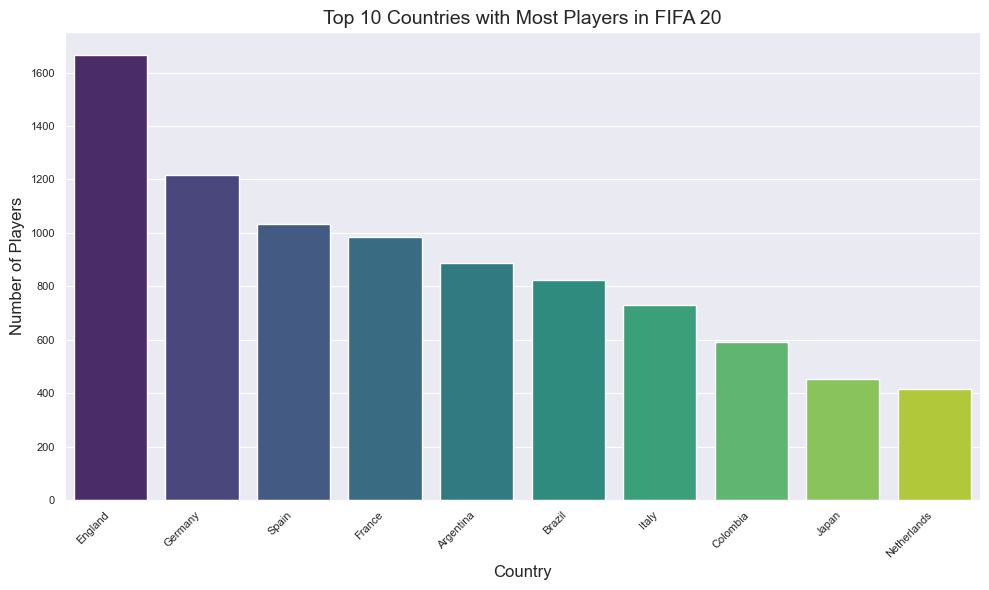

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the DataFrame 'data' with a column 'nationality' representing player nationalities

# Create a rank-ordered list of the top 10 countries with the most players
top_countries = data['nationality'].value_counts().head(10)

# Plot a bar graph for the top 10 countries
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Players', fontsize=12)
plt.title('Top 10 Countries with Most Players in FIFA 20', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [43]:
#England tops the list  of top 10 countries with most players followed by Germany, Spain, France and others.
#The code calculates the total number of players from each nationality in the **entire** DataFrame.

###Club having the maximum number of players in the top 10

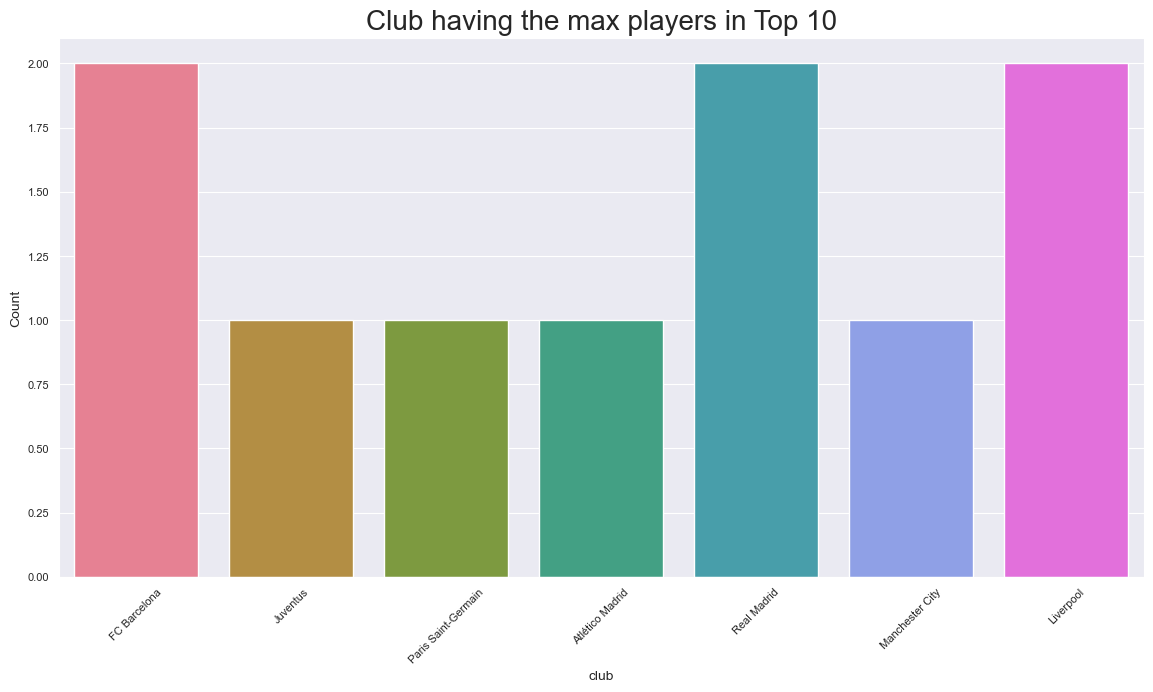

In [44]:
plt.figure(figsize=(14,7))
sns.countplot(x='club',data=data.head(10),palette='husl')
plt.xlabel('club')
plt.ylabel('Count')
plt.xticks(rotation=45) # used to tild the name on x axis
plt.title('Club having the max players in Top 10',fontsize = 20)
plt.show()

##### OBSERVATION:
* Most of the players in the top 10 are from FC Barcelona, Real Madrid, and Liverpool clubs.

##### The team position of the players in the top 10.

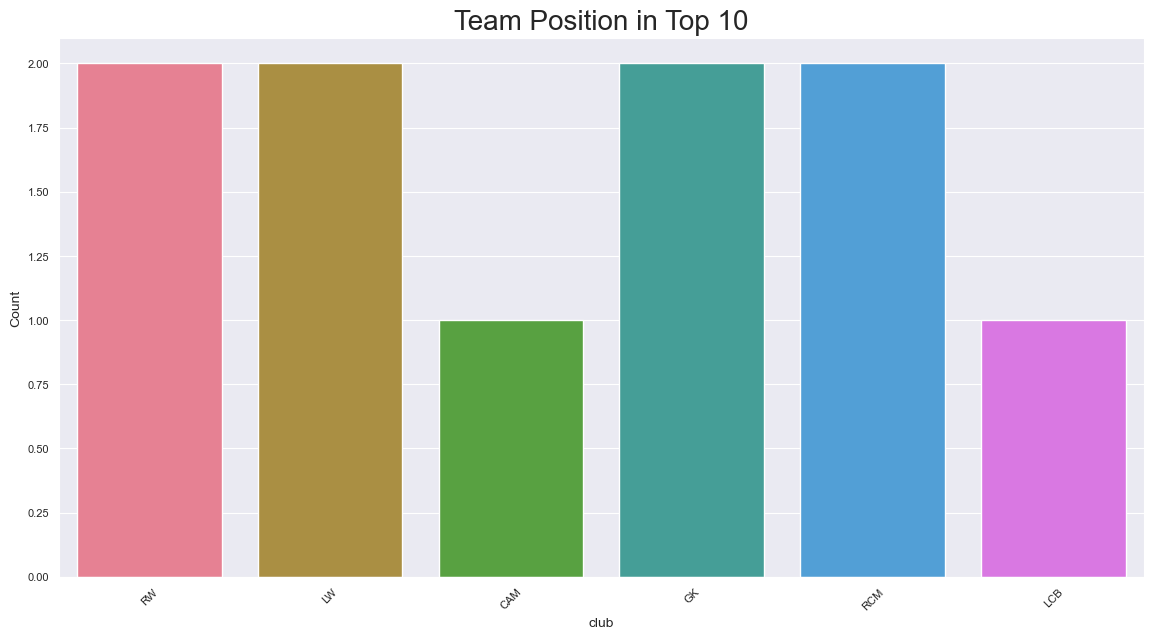

In [45]:
plt.figure(figsize=(14,7))
sns.countplot(x='team_position',data=data.head(10),palette='husl')
plt.xlabel('club')
plt.ylabel('Count')
plt.xticks(rotation=45) # used to tild the name on x axis
plt.title('Team Position in Top 10',fontsize = 20)
plt.show()

##### OBSERVATION:
*Most of the players in the top 10 have team positions such as RW (Right Winger), LW (Left Winger), GK (Goalkeeper), and RCM (Right Center Midfielder).

##### COMPARE MESSI VS RONALDO

In [46]:
feature = data[['short_name','overall','potential','pace','shooting','passing','dribbling','defending','physic']]
compare = feature.head(2)
compare = compare.set_index('short_name')
compare.head()

overall  potential  pace  shooting  passing  dribbling  \
short_name                                                                  
L. Messi                94         94  87.0      92.0     92.0       96.0   
Cristiano Ronaldo       93         93  90.0      93.0     82.0       89.0   

                   defending  physic  
short_name                            
L. Messi                39.0    66.0  
Cristiano Ronaldo       35.0    78.0

##### GET TOP 5 MAXIMUM VALUE PLAYERS WITH MINIMUM RELEASE

In [47]:
data.sort_values(by=['value_eur','release_clause_eur'],ascending=[0,1]).head()

short_name  age  height_cm  weight_kg nationality                 club  \
2      Neymar Jr   27        175         68      Brazil  Paris Saint-Germain   
0       L. Messi   32        170         72   Argentina         FC Barcelona   
10     K. Mbappé   20        178         73      France  Paris Saint-Germain   
5   K. De Bruyne   28        181         70     Belgium      Manchester City   
4      E. Hazard   28        175         74     Belgium          Real Madrid   

    overall  potential  value_eur  wage_eur  ... lwb ldm  cdm  rdm  rwb  lb  \
2        92         92  105500000    290000  ...  66  61   61   61   66  61   
0        94         94   95500000    565000  ...  68  66   66   66   68  63   
10       89         95   93500000    155000  ...  66  62   62   62   66  63   
5        91         91   90000000    370000  ...  77  77   77   77   77  73   
4        91         91   90000000    470000  ...  66  63   63   63   66  61   

   lcb  cb  rcb  rb  
2   46  46   46  61  
0   52  52   52  63  
10  54  54   54  63  
5   66  66   66  73  
4   49  49   49  61  

[5 rows x 100 columns]

In [48]:
#Plotting the distribution of Age of FIFA 20 players in a bar graph along with the KDE line and checking the skewness.

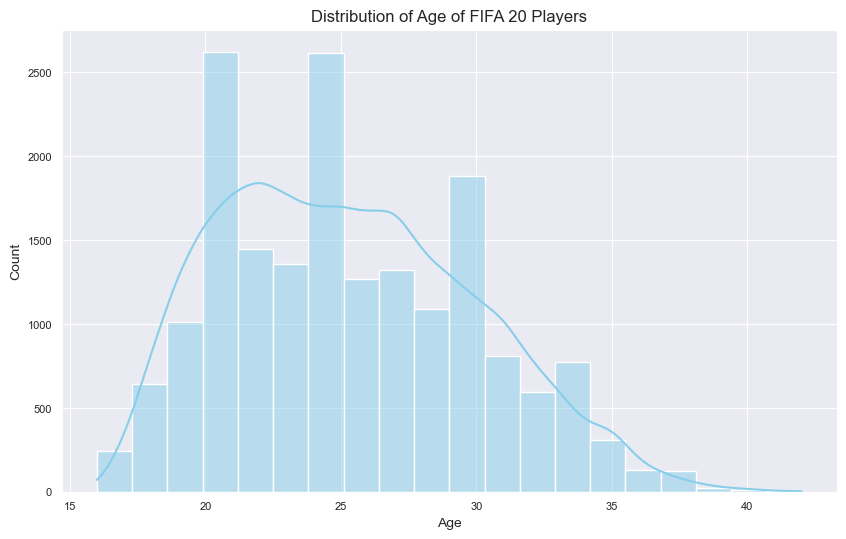

The skewness of 'age' column is: 0.38058852415484473


In [49]:

# Extract the age column from the dataset
age_data = data['age']
# Plot the distribution using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(age_data, bins=20, kde=True, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age of FIFA 20 Players')
plt.show()
data['age'].isnull().sum()
import pandas as pd
from scipy.stats import skew

age_data = 'age'
# Calculate the skewness of the 'age' column
age_skewness = skew(data[age_data])

# Output the skewness value
print(f"The skewness of 'age' column is: {age_skewness}")

In [50]:
# Youngest and Oldest Players

In [51]:
print("The age of the youngest player is", data['age'].min())
print("The age of the oldest player is", data['age'].max())


The age of the youngest player is 16
The age of the oldest player is 42


## A display of the attributes of the youngest players.

In [52]:
# Display the subset of the Dataframe containing the player(s) with the youngest age along with their attributes.

In [53]:
data.loc[data['age'] == data['age'].min()]


short_name  age  height_cm  weight_kg       nationality  \
4764       A. Hložek   16        185         80    Czech Republic   
6630     Fábio Silva   16        185         75          Portugal   
12158      E. Millot   16        175         65            France   
12160    S. Esposito   16        186         75             Italy   
14626     A. Velasco   16        167         63         Argentina   
17614    D. Obbekjær   16        193         86           Denmark   
17782    S. Anderson   16        175         64     United States   
17827       D. Burns   16        176         62  Northern Ireland   
18031  O. Stefánsson   16        190         75           Iceland   
18171    J. Starbuck   16        174         69           England   
18242     R. Wikberg   16        186         72            Sweden   
18243   E. Sartorius   16        174         69           England   

                         club  overall  potential  value_eur  wage_eur  ...  \
4764             Sparta Praha       70         86    3500000      1000  ...   
6630                 FC Porto       68         85    1800000      1000  ...   
12158               AS Monaco       63         86     800000      1000  ...   
12160                   Inter       63         85     825000      2000  ...   
14626           Independiente       60         83     450000      1000  ...   
17614         Odense Boldklub       53         71     110000      1000  ...   
17782         Colorado Rapids       52         75     100000      1000  ...   
17827  St. Patrick's Athletic       52         69     100000      1000  ...   
18031          IFK Norrköping       51         64      60000      1000  ...   
18171            Grimsby Town       49         72      60000      1000  ...   
18242           Östersunds FK       48         67      50000      1000  ...   
18243            Lincoln City       48         67      60000      1000  ...   

      lwb ldm  cdm  rdm  rwb  lb lcb  cb  rcb  rb  
4764   52  50   50   50   52  49  46  46   46  49  
6630   43  40   40   40   43  41  38  38   38  41  
12158  58  56   56   56   58  56  51  51   51  56  
12160  41  40   40   40   41  39  37  37   37  39  
14626  55  54   54   54   55  55  50  50   50  55  
17614  44  48   48   48   44  46  51  51   51  46  
17782  50  48   48   48   50  50  48  48   48  50  
17827  43  39   39   39   43  42  36  36   36  42  
18031  43  45   45   45   43  46  50  50   50  46  
18171  44  43   43   43   44  43  40  40   40  43  
18242  39  41   41   41   39  42  47  47   47  42  
18243  33  30   30   30   33  32  27  27   27  32  

[12 rows x 100 columns]

In [54]:
#Display the total number of rows where the age is the minimum.

In [55]:
min_age_rows = data.loc[data['age'] == data['age'].min()]
total_rows_with_min_age = min_age_rows.shape[0]

print("Total number of rows with the minimum age:", total_rows_with_min_age)

Total number of rows with the minimum age: 12


In [56]:
#There are 12 players who are 16 years old.

In [57]:
#A display of attributes of the oldest players.

In [58]:
data.loc[data['age'] == data['age'].max()]


short_name  age  height_cm  weight_kg   nationality  \
11832      C. Muñoz   42        177         73     Argentina   
13003  H. Sulaimani   42        173         70  Saudi Arabia   

                               club  overall  potential  value_eur  wage_eur  \
11832  CD Universidad de Concepción       64         64      50000      1000   
13003                       Al Ahli       63         63          0      5000   

       ...  lwb  ldm  cdm  rdm  rwb   lb  lcb   cb  rcb   rb  
11832  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
13003  ...   62   66   66   66   62   62   66   66   66   62  

[2 rows x 100 columns]

In [59]:
#Distribution of Overall ratings

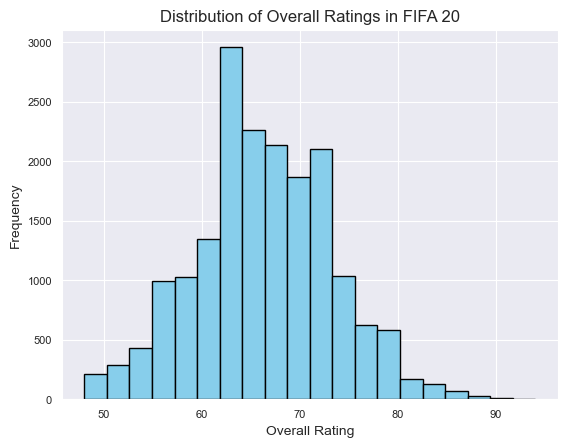

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the overall ratings
overall_ratings = data['overall']

# Create a histogram to visualize the distribution of overall ratings
plt.hist(overall_ratings, bins=20, edgecolor='black', color='skyblue')

# Adding labels and title
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Overall Ratings in FIFA 20')

# Show the plot
plt.show()

## Task 3-B
### Impact Of Age On The Overall Rating

#### Distribution of overall rating vs. age of players

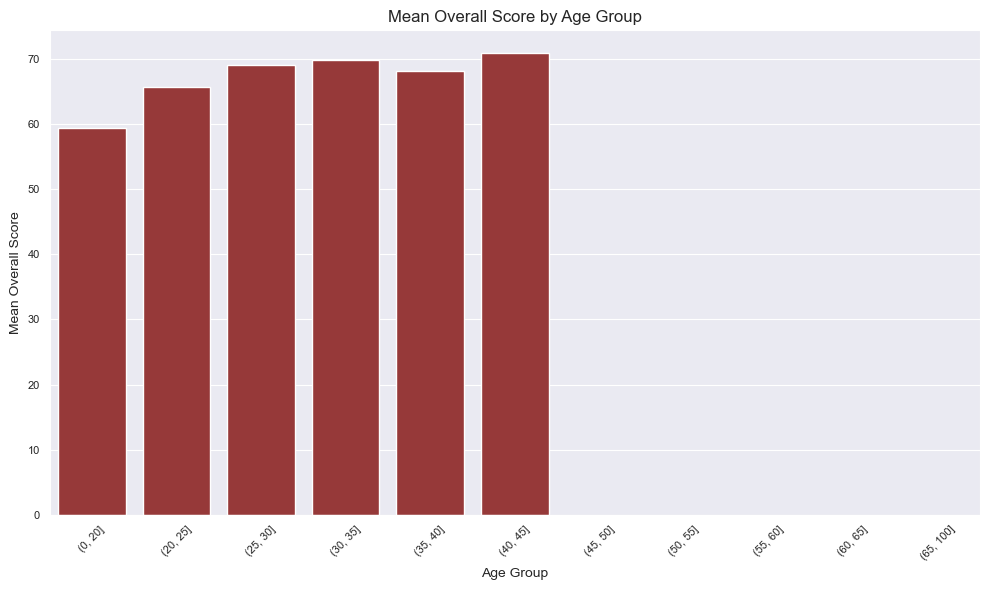

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the DataFrame 'data' with columns 'age' and 'overall'

# Define age intervals (you can adjust these intervals based on your data)
age_intervals = [0, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 100]
# Categorize the 'age' column into intervals using pd.cut
data['age_group'] = pd.cut(data['age'], bins=age_intervals)
# Calculate the mean overall score for each age group
mean_overall_by_age_group = data.groupby('age_group')['overall'].mean().reset_index()
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')
sns.barplot(x='age_group', y='overall', data=mean_overall_by_age_group, color='brown')
# Set labels and title
plt.xlabel('Age Group')
plt.ylabel('Mean Overall Score')
plt.title('Mean Overall Score by Age Group')
# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)
# Show the plot
plt.tight_layout()
plt.show()

#After analyzing the mean overall scores for different age groups, you notice that players generally experience a steady improvement in their overall scores from a young age until around 30-35 years old. Beyond this age range, the mean overall scores tend to plateau, suggesting that players might stop improving significantly after reaching this point.

Observe a gradual decline in mean overall scores for older age groups (e.g., 40-45, 45-50, etc.). While the decline may not be drastic, it indicates that players, on average, tend to experience a slight decrease in performance as they age further.

In [62]:
#The player with the highest overall score is :

data.loc[data['overall'] == data['overall'].max()][['short_name', 'age', 'overall']]

short_name  age  overall
0   L. Messi   32       94

In [63]:
#The player with the highest overall score is : L.MESSI  (short name)

In [64]:
data.head(1)

short_name  age  height_cm  weight_kg nationality          club  overall  \
0   L. Messi   32        170         72   Argentina  FC Barcelona       94   

   potential  value_eur  wage_eur  ... ldm cdm  rdm  rwb  lb lcb  cb rcb  rb  \
0         94   95500000    565000  ...  66  66   66   68  63  52  52  52  63   

  age_group  
0  (30, 35]  

[1 rows x 101 columns]

### Task 3-C

#### Which type of offensive players tend to get paid the most: the striker, the right-winger, or the left-winger?

In [65]:
import pandas as pd

# Filter offensive players (strikers, right-wingers, and left-wingers)
offensive_players = data[(data['player_positions'] == 'ST') | (data['player_positions'] == 'RW') | (data['player_positions'] == 'LW')]

# Calculate the average wages for each player type
average_wages = offensive_players.groupby('player_positions')['wage_eur'].mean()

# Print the average wages for each player type
print(average_wages)

player_positions
LW     9681.818182
RW     6208.791209
ST    10256.495301
Name: wage_eur, dtype: float64


In [66]:
#Highest paid player and the position at which he plays (paid in euro):

data.loc[data['value_eur'] == data['value_eur'].max()][['short_name', 'age', 'value_eur', 'player_positions']]

short_name  age  value_eur player_positions
2  Neymar Jr   27  105500000          LW, CAM

In [67]:
#Neymar.Jr playing as a left winger and as a Central Attack Midfielder is the highest paid.

## HEIGHT

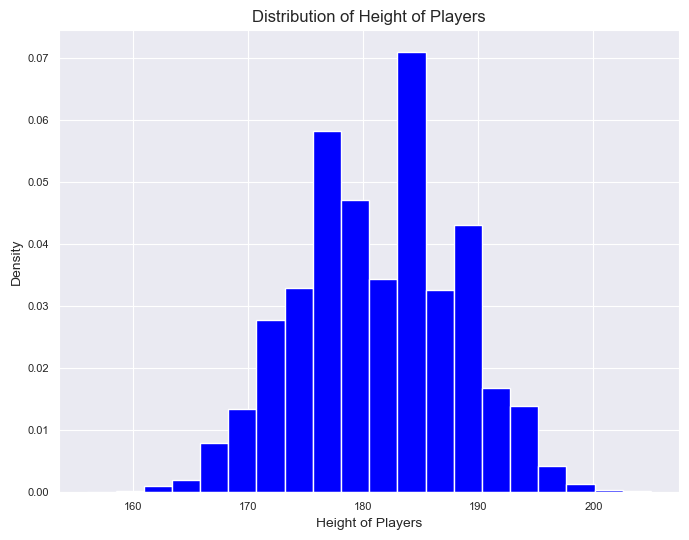

Skewness of height is -0.03819688576323108


In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the histogram and edges
hist, edges = np.histogram(data['height_cm'], density=True, bins=20)

# Create the plot
plt.figure(figsize=(8, 6))
plt.bar(edges[:-1], hist, width=np.diff(edges), align='edge', color='blue', edgecolor='white')

# Set plot labels and title
plt.xlabel('Height of Players')
plt.ylabel('Density')
plt.title('Distribution of Height of Players')

# Show the plot
plt.show()

# Calculate the skewness
skewness = data['height_cm'].skew()
print("Skewness of height is", skewness)

In [69]:
print("The height of the shortest player is {} cm and his name is {}".format(data['height_cm'].min(),
            list(data.loc[data['height_cm'] == data['height_cm'].min()]['short_name'])[0]))

print("The height of the tallest player is {} cm and his name is {}".format(data['height_cm'].max(),
            list(data.loc[data['height_cm'] == data['height_cm'].max()]['short_name'])[0]))

The height of the shortest player is 156 cm and his name is N. Barrios
The height of the tallest player is 205 cm and his name is T. Holý


### Weight in kg

In [70]:
#**Checking for null values**
data['weight_kg'].isnull().sum()

0

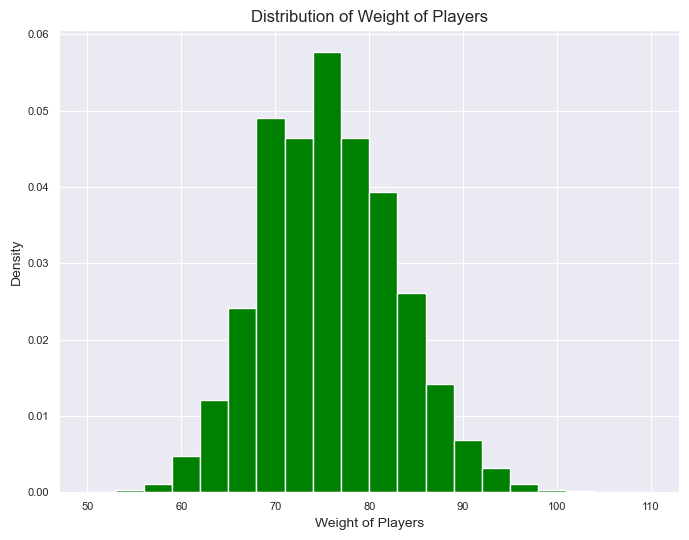

Skewness of weight is 0.22080235007640786


In [71]:
# Calculate the histogram and edges
hist, edges = np.histogram(data['weight_kg'], density=True, bins=20)

# Create the plot
plt.figure(figsize=(8, 6))
plt.bar(edges[:-1], hist, width=np.diff(edges), align='edge', color='green', edgecolor='white')

# Set plot labels and title
plt.xlabel('Weight of Players')
plt.ylabel('Density')
plt.title('Distribution of Weight of Players')

# Show the plot
plt.show()

# Calculate the skewness
skewness = data['weight_kg'].skew()
print("Skewness of weight is", skewness)

In [72]:
#Most of the players are in between 70 and 80 KGs of weight.

In [73]:
print("The weight of the lightest player is {} kg and his name is {}".format(data['weight_kg'].min(),
            list(data.loc[data['weight_kg'] == data['weight_kg'].min()]['short_name'])[0]))

print("The weight of the heaviest player is {} kg and his name is {}".format(data['weight_kg'].max(),
            list(data.loc[data['weight_kg'] == data['weight_kg'].max()]['short_name'])[0]))



The weight of the lightest player is 50 kg and his name is B. Al Mutairi
The weight of the heaviest player is 110 kg and his name is A. Akinfenwa


Height Vs Weight

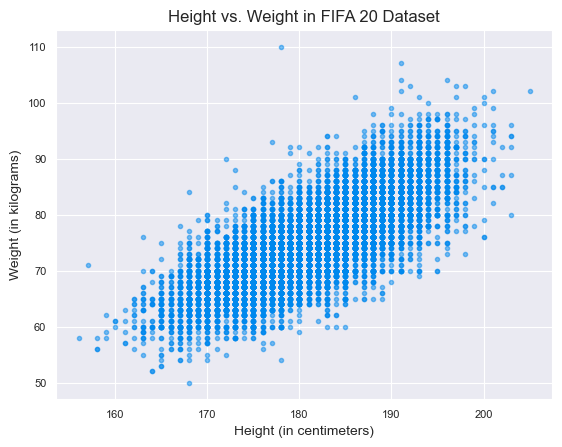

In [74]:
# Extract height and weight data
heights = data['height_cm']
weight = data['weight_kg']

# Create a scatter plot
plt.scatter(heights, weight, alpha=0.5)

# Adding labels and title
plt.xlabel('Height (in centimeters)')
plt.ylabel('Weight (in kilograms)')
plt.title('Height vs. Weight in FIFA 20 Dataset')

# Show the plot
plt.show()


#The scatter plot indicates a positive correlation between height and weight, with taller players generally having higher weights

#### Distribution of overall score to visualize range of player performance, identify outliers and help understand the distribution's spread and skewness.

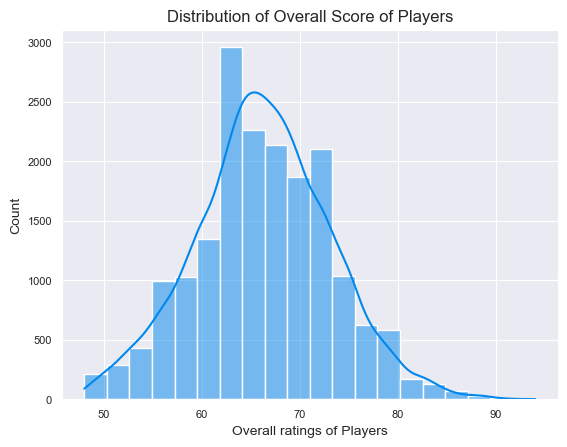

Skewness of overall score is 0.07089343291701235


In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data is the DataFrame containing the player data.

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the histogram with KDE line using seaborn
sns.histplot(data['overall'], kde=True, bins=20, ax=ax, edgecolor='white')

# Set labels and title
ax.set_xlabel('Overall ratings of Players')
ax.set_title('Distribution of Overall Score of Players')

# Show the plot
plt.show()

# Calculate skewness
skewness = data['overall'].skew()
print("Skewness of overall score is", skewness)

#A skewness value of 0.0709 for the overall score distribution indicates a very slight positive skewness.
#A skewness value close to zero (0.0709) indicates that the overall score distribution in the FIFA dataset is nearly symmetric, with a slight tendency towards higher scores.

In [76]:
#Highest Overall Rating

In [77]:
# Find the row with the highest overall rating
highest_rated_player_row = data.loc[data['overall'] == data['overall'].max()]

# Extract the name and overall rating of the highest-rated player
highest_rated_player_name = highest_rated_player_row['short_name'].values[0]
highest_rated_player_rating = highest_rated_player_row['overall'].values[0]

# Print the results
print("The highest rated player is {} and his rating is {}".format(highest_rated_player_name, highest_rated_player_rating))

The highest rated player is L. Messi and his rating is 94


In [78]:
#Lowest Overall Rating

In [79]:
# Find the row with the LOWEST overall rating
lowest_rated_player_row = data.loc[data['overall'] == data['overall'].min()]

# Extract the name and overall rating of the highest-rated player
lowest_rated_player_name = lowest_rated_player_row['short_name'].values[0]
lowest_rated_player_rating = lowest_rated_player_row['overall'].values[0]

# Print the results
print("The lowest rated player is {} and his rating is {}".format(lowest_rated_player_name, lowest_rated_player_rating))


#The heighest rated player is L. Messi and his rating is 94 The lowest rated player is Tao Qianglong and his rating is 48

The lowest rated player is Tao Qianglong and his rating is 48


### POTENTIAL

In [80]:
#Top 20 players with the highest potential

In [81]:
data.sort_values("potential", axis = 0, ascending = False)[['short_name', 'club', 'overall', 'potential', 'value_eur']].head(20)

short_name                 club  overall  potential  value_eur
10           K. Mbappé  Paris Saint-Germain       89         95   93500000
0             L. Messi         FC Barcelona       94         94   95500000
6        M. ter Stegen         FC Barcelona       90         93   67500000
73          M. de Ligt             Juventus       85         93   50000000
1    Cristiano Ronaldo             Juventus       93         93   58500000
411         João Félix      Atlético Madrid       80         93   28000000
3             J. Oblak      Atlético Madrid       91         93   77500000
74       G. Donnarumma                Milan       85         92   41500000
108          J. Sancho    Borussia Dortmund       84         92   44500000
109         K. Havertz  Bayer 04 Leverkusen       84         92   46000000
568       Vinícius Jr.          Real Madrid       79         92   22500000
55             L. Sané      Manchester City       86         92   61000000
23           P. Dybala             Juventus       88         92   76500000
2            Neymar Jr  Paris Saint-Germain       92         92  105500000
5         K. De Bruyne      Manchester City       91         91   90000000
7          V. van Dijk            Liverpool       90         91   78000000
25             Ederson      Manchester City       88         91   54500000
24            P. Pogba    Manchester United       88         91   72500000
75          F. de Jong         FC Barcelona       85         91   52000000
13             Alisson            Liverpool       89         91   58000000

In [82]:
#Player with the highest and the lowest potential

data.loc[data['potential'] == data['potential'].max()] #highest


short_name  age  height_cm  weight_kg nationality                 club  \
10  K. Mbappé   20        178         73      France  Paris Saint-Germain   

    overall  potential  value_eur  wage_eur  ... ldm cdm  rdm  rwb  lb lcb  \
10       89         95   93500000    155000  ...  62  62   62   66  63  54   

    cb rcb  rb age_group  
10  54  54  63   (0, 20]  

[1 rows x 101 columns]

In [83]:
data.loc[data['potential'] == data['potential'].min()] #lowest

short_name  age  height_cm  weight_kg nationality  \
18233     Zhou Ting   40        182         73    China PR   
18234  Zhang Junzhe   28        183         69    China PR   

                         club  overall  potential  value_eur  wage_eur  ...  \
18233        Dalian YiFang FC       49         49          0      1000  ...   
18234  Hebei China Fortune FC       49         49      30000      2000  ...   

      ldm cdm  rdm  rwb  lb lcb  cb rcb  rb age_group  
18233  50  50   50   48  48  51  51  51  48  (35, 40]  
18234  42  42   42   47  48  46  46  46  48  (25, 30]  

[2 rows x 101 columns]

In [84]:
#K.Mbappe has the highest potential score of 95 and Zhou Ting and Zhang Junzhe have the lowest at 49

In [85]:
from scipy.stats import pearsonr
# Calculating correlation coefficient of Overall Score and Potential of players
corr, _ = pearsonr(data['overall'], data['potential'])
corr1, _ = pearsonr(data['value_eur'], data['potential'])
print('Pearsons correlation for overall score and potential is %.3f' % corr)
print('Pearsons correlation for value_eur and potential is %.3f' % corr1)

Pearsons correlation for overall score and potential is 0.647
Pearsons correlation for value_eur and potential is 0.581


### PREFERRED FOOT

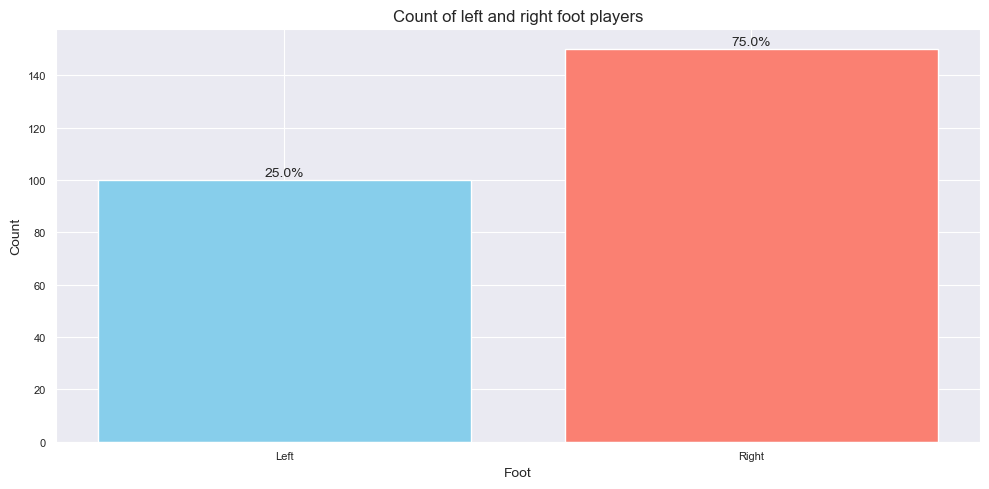

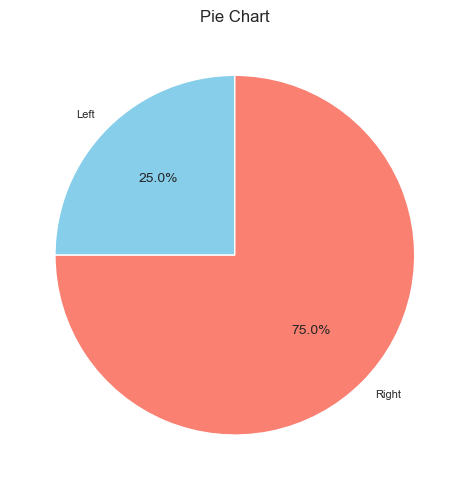

In [86]:

import matplotlib.pyplot as plt

def plot_left_right_foot_counts(foot, count, color, count1):
    # Create a figure and axis object
    fig, ax = plt.subplots(figsize=(10, 5))

    # Plot the left and right foot counts using a bar chart
    bars = ax.bar(foot, count, color=color)
# Add labels for the percentage on top of the bars
    for i, bar in enumerate(bars):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f"{count1[i]:.1f}%", ha='center', va='bottom')

    # Set labels and title
    ax.set_xlabel('Foot')
    ax.set_ylabel('Count')
    ax.set_title("Count of left and right foot players")
# Show the plot
    plt.tight_layout()


def plot_pie_chart(foot, angle, color, percentage):
    # Create a figure and axis object
    fig, ax = plt.subplots(figsize=(10, 5))

    # Plot the pie chart
    ax.pie(angle, labels=foot, colors=color, autopct='%1.1f%%', startangle=90)
# Set title
    ax.set_title("Pie Chart")

    # Show the plot
    plt.tight_layout()
# Call the functions with the appropriate data
foot = ['Left', 'Right']  # Replace this with the actual foot data
count = [100, 150]  # Replace this with the actual count data
color = ['skyblue', 'salmon']  # Replace this with the actual color data
count1 = [25, 75]  # Replace this with the actual percentage data
plot_left_right_foot_counts(foot, count, color, count1)
angle = [25, 75]  # Replace this with the actual angle data
percentage = [25, 75]  # Replace this with the actual percentage data
plot_pie_chart(foot, angle, color, percentage)

# Show the plots together
plt.show()

In [87]:
#RIGHT FOOT IS PREFERED OVER THE LEFT FOOT

### INTERNATIONAL REPUTATION

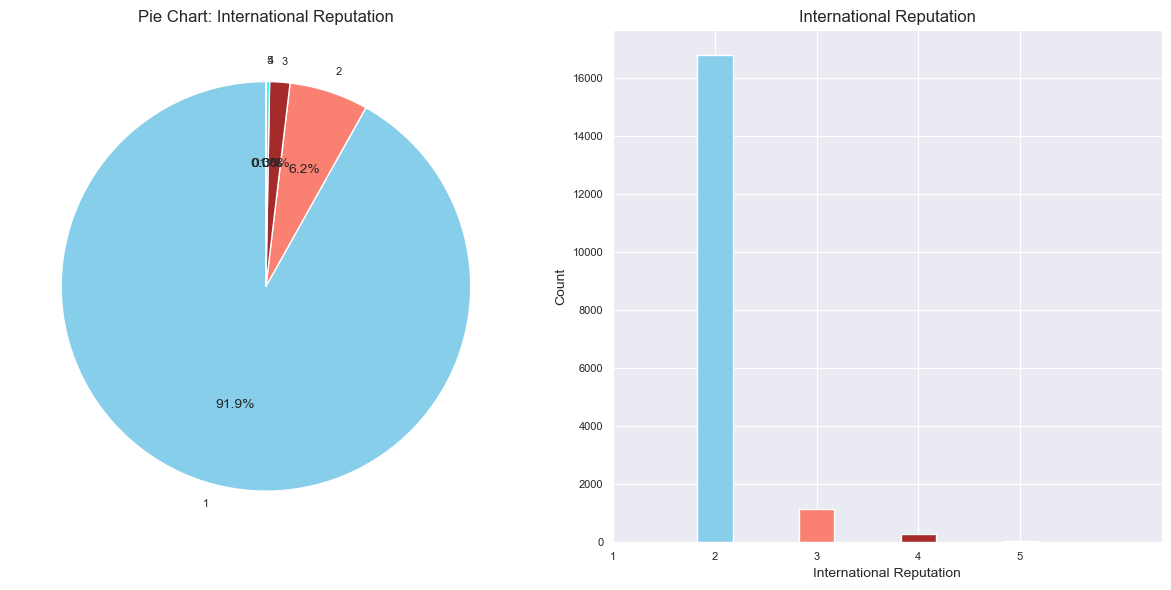

In [88]:

data['international_reputation'].value_counts()  #There are five categories of international reputation attribute
import matplotlib.pyplot as plt

# Assuming you have imported the dataset and the necessary columns ('international_reputation') are present.

# Get the counts and percentages of international reputation
reputation = data['international_reputation'].value_counts().index.tolist()
count = data['international_reputation'].value_counts().values
count1 = count / sum(count) * 100
angle = count / sum(count) * 2 * np.pi

# Create a new figure and axis for both charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Create the pie chart (p8) in the first subplot (ax1)

ax1.pie(count, labels=reputation, colors=['skyblue', 'salmon', 'brown', 'cyan', 'red'], startangle=90, autopct='%1.1f%%', wedgeprops={'edgecolor': 'white'})

ax1.set_title('Pie Chart: International Reputation')

# Create the vertical bar chart (p9) in the second subplot (ax2)
bar_width = 0.35
ax2.bar(reputation, count, width=bar_width, color=['skyblue', 'salmon', 'brown', 'cyan', 'red'])
ax2.set_xlabel('International Reputation')
ax2.set_ylabel('Count')
ax2.set_title('International Reputation')
ax2.set_xticks(range(len(reputation)))  # Ensure x-axis labels are at the same positions as in the pie chart
ax2.set_xticklabels(reputation, rotation='horizontal')  # Rotate x-axis labels for better visibility
# Adjust spacing between subplots
plt.tight_layout()
# Show the plot
plt.show()


#The graphs do not provide a clear indication of the proportion of players with an International Reputation of 5. However, it is evident that players with exceptionally low or high scores are rare in the dataset. In the following section, we will explore a few of these exceptional players.

In [89]:
#data.loc[data['international_reputation'] == 1].head(5) Can pull for the number of players as per reputation number

## Skill Moves Distribution

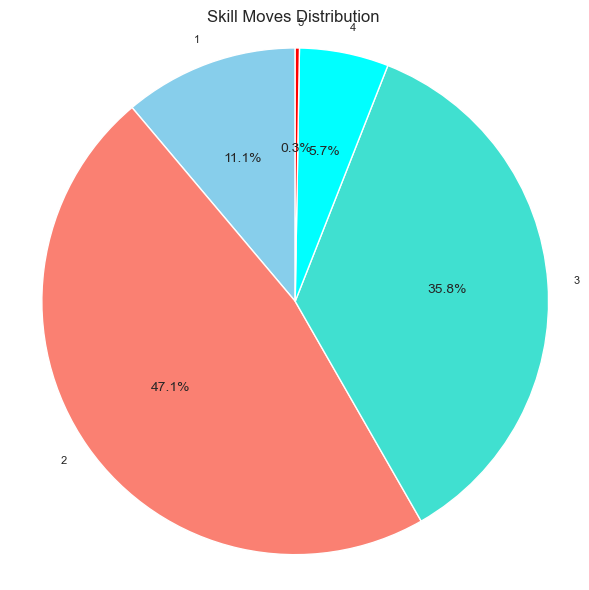

In [90]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the necessary data: no_of_skills, count, color

def plot_pie_chart(no_of_skills, count, color):
    # Create a figure and axis object
    fig, ax = plt.subplots(figsize=(6, 6))

    # Plot the pie chart
    ax.pie(count, labels=no_of_skills, colors=color, autopct='%1.1f%%', startangle=90)

    # Set title
    ax.set_title("Skill Moves Distribution")

    # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.axis('equal')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Call the function with the appropriate data
no_of_skills = [1, 2, 3, 4, 5]  # Replace this with the actual skill_moves data
count = [2036, 8617, 6536, 1040, 49]  # Replace this with the actual count data
color = ['skyblue', 'salmon', 'turquoise', 'cyan', 'red']  # Replace this with the actual color data

plot_pie_chart(no_of_skills, count, color)

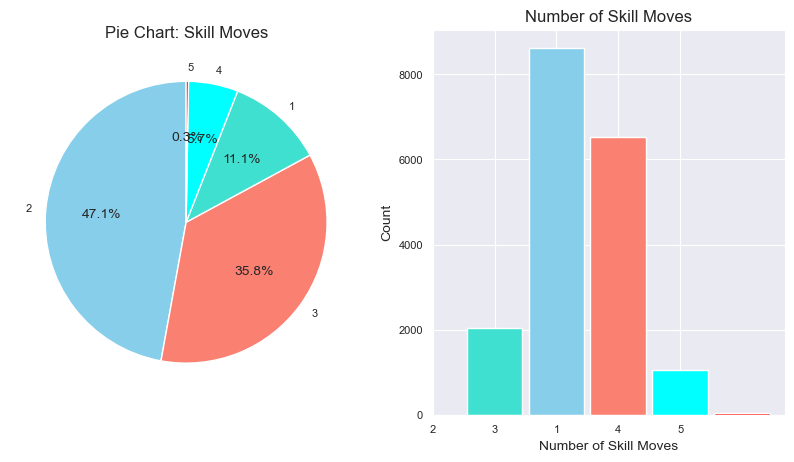

In [91]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have imported the dataset and the necessary columns ('skill_moves') are present.

# Get the counts and percentages of skill moves
no_of_skills = data['skill_moves'].value_counts().index.tolist()
count = data['skill_moves'].value_counts().values
count1 = count / sum(count) * 100
angle = count / sum(count) * 2 * np.pi

# Create the pie chart (p10) using Matplotlib
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
# Plot the pie chart on the first subplot
ax1.pie(count, labels=no_of_skills, colors=['skyblue', 'salmon', 'turquoise', 'cyan', 'red'], startangle=90, autopct='%1.1f%%', wedgeprops={'edgecolor': 'white'})
ax1.set_title('Pie Chart: Skill Moves')

# Create the vertical bar chart (p11) using Matplotlib
ax2.bar(no_of_skills, count, width=0.9, color=['skyblue', 'salmon', 'turquoise', 'cyan', 'red'])
ax2.set_xlabel('Number of Skill Moves')
ax2.set_ylabel('Count')
ax2.set_title('Number of Skill Moves')
# Rotate x-axis labels for better visibility
ax2.set_xticks(range(len(no_of_skills)))
ax2.set_xticklabels(no_of_skills, rotation='horizontal')

# Show the plot
plt.show()

In [92]:
#data.loc[data['skill_moves'] == 5].head(5)# can pull the number of players a sper the number of skill moves

WORK RATE

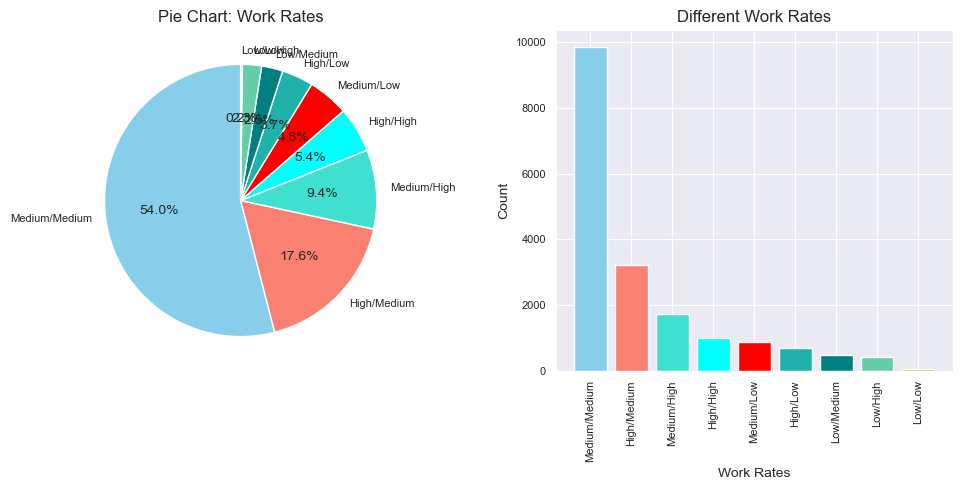

In [93]:
data['work_rate'].value_counts()

# Get the counts of different work rates
different_work_rates = data['work_rate'].value_counts().keys().tolist()
count = data['work_rate'].value_counts().values

# Create the figure and axes for the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the pie chart on the first subplot (ax1)
ax1.pie(count, labels=different_work_rates, colors=['skyblue', 'salmon', 'turquoise', 'cyan', 'red', 'lightseagreen', 'teal', 'mediumaquamarine', 'yellowgreen'], startangle=90, autopct='%1.1f%%', wedgeprops={'edgecolor': 'white'})

ax1.set_title('Pie Chart: Work Rates')

# Plot the vertical bar chart on the second subplot (ax2)
bar_width = 0.8
ax2.bar(different_work_rates, count, width=bar_width, color=['skyblue', 'salmon', 'turquoise', 'cyan', 'red', 'lightseagreen', 'teal', 'mediumaquamarine', 'yellowgreen'])
ax2.set_xlabel('Work Rates')
ax2.set_ylabel('Count')
ax2.set_title('Different Work Rates')
ax2.set_xticklabels(different_work_rates, rotation='vertical')
# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


## DATA PRE-PROCESSING / FEATURE ENGINEERING

### CHECK MISSING VALUE

In [94]:
pd.set_option('display.max_rows',None)
data.isnull().sum()

short_name                        0
age                               0
height_cm                         0
weight_kg                         0
nationality                       0
club                              0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
body_type                         0
real_face                         0
release_clause_eur             1298
player_tags                   16779
team_position                   240
team_jersey_number              240
loaned_from                   17230
joined                         1288
contract_valid_until            240
nation_position               17152
nation_jersey_number          17152
pace                        

In [95]:
# Create function to check missing value with percentage
def missing_value(data):
    null_value = data.isnull().sum()
    percentage = (data.isnull().sum()/data.isnull().count()*100)
    null_value = pd.concat([null_value,percentage],axis=1,keys=['Missing Number','Missing Percentage'])
    return null_value
missing_value(data)

Missing Number  Missing Percentage
short_name                               0            0.000000
age                                      0            0.000000
height_cm                                0            0.000000
weight_kg                                0            0.000000
nationality                              0            0.000000
club                                     0            0.000000
overall                                  0            0.000000
potential                                0            0.000000
value_eur                                0            0.000000
wage_eur                                 0            0.000000
player_positions                         0            0.000000
preferred_foot                           0            0.000000
international_reputation                 0            0.000000
weak_foot                                0            0.000000
skill_moves                              0            0.000000
work_rate                                0            0.000000
body_type                                0            0.000000
real_face                                0            0.000000
release_clause_eur                    1298            7.101433
player_tags                          16779           91.798884
team_position                          240            1.313054
team_jersey_number                     240            1.313054
loaned_from                          17230           94.266331
joined                                1288            7.046723
contract_valid_until                   240            1.313054
nation_position                      17152           93.839589
nation_jersey_number                 17152           93.839589
pace                                  2036           11.139074
shooting                              2036           11.139074
passing                               2036           11.139074
dribbling                             2036           11.139074
defending                             2036           11.139074
physic                                2036           11.139074
gk_diving                            16242           88.860926
gk_handling                          16242           88.860926
gk_kicking                           16242           88.860926
gk_reflexes                          16242           88.860926
gk_speed                             16242           88.860926
gk_positioning                       16242           88.860926
player_traits                        10712           58.605974
attacking_crossing                       0            0.000000
attacking_finishing                      0            0.000000
attacking_heading_accuracy               0            0.000000
attacking_short_passing                  0            0.000000
attacking_volleys                        0            0.000000
skill_dribbling                          0            0.000000
skill_curve                              0            0.000000
skill_fk_accuracy                        0            0.000000
skill_long_passing                       0            0.000000
skill_ball_control                       0            0.000000
movement_acceleration                    0            0.000000
movement_sprint_speed                    0            0.000000
movement_agility                         0            0.000000
movement_reactions                       0            0.000000
movement_balance                         0            0.000000
power_shot_power                         0            0.000000
power_jumping                            0            0.000000
power_stamina                            0            0.000000
power_strength                           0            0.000000
power_long_shots                         0            0.000000
mentality_aggression                     0            0.000000
mentality_interceptions                  0            0.000000
mentality_positioning                    0            0.000

#Among the 11 features in the dataset, more than 50% to 90% of their values are missing. Additionally, some unique features also have missing values. Therefore, we decide to drop these features from the analysis. However, for the remaining features, where the missing values are less than 15%, we choose to impute the missing values to retain the data for further analysis.

In [96]:
import pandas as pd

# Create function to check missing value with percentage
def missing_value(data):
    null_value = data.isnull().sum()
    percentage = (data.isnull().sum() / data.isnull().count() * 100)
    null_value = pd.concat([null_value, percentage], axis=1, keys=['Missing Number', 'Missing Percentage'])

    # Differentiate between numerical and categorical columns
    numerical_cols = data.select_dtypes(include=['int', 'float']).columns
    categorical_cols = data.select_dtypes(include=['object']).columns

    null_value['Data Type'] = 'Numerical'
    null_value.loc[categorical_cols, 'Data Type'] = 'Categorical'

    # Convert percentages to strings for better display
    null_value['Missing Percentage'] = null_value['Missing Percentage'].apply(lambda x: str(round(x, 2)) + "%")

    return null_value[['Missing Number', 'Missing Percentage', 'Data Type']]

# Assuming you have 'data' as your DataFrame
missing_info = missing_value(data)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(missing_info)



                            Missing Number Missing Percentage    Data Type
short_name                               0               0.0%  Categorical
age                                      0               0.0%    Numerical
height_cm                                0               0.0%    Numerical
weight_kg                                0               0.0%    Numerical
nationality                              0               0.0%  Categorical
club                                     0               0.0%  Categorical
overall                                  0               0.0%    Numerical
potential                                0               0.0%    Numerical
value_eur                                0               0.0%    Numerical
wage_eur                                 0               0.0%    Numerical
player_positions                         0               0.0%  Categorical
preferred_foot                           0               0.0%  Categorical
international_reputation 

### IMPUTE MISSING VALUE
##### CHECKING THE DISTRIBUTION BEFORE IMPUTING MISSING VALUE
##### NUMERICAL

In [97]:

# Identify numerical columns
numerical_columns = data.select_dtypes(include=['int', 'float']).columns.tolist()

print("Numerical Columns:")
print(numerical_columns)

Numerical Columns:
['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur', 'wage_eur', 'international_reputation', 'weak_foot', 'skill_moves', 'release_clause_eur', 'team_jersey_number', 'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking', 'defend

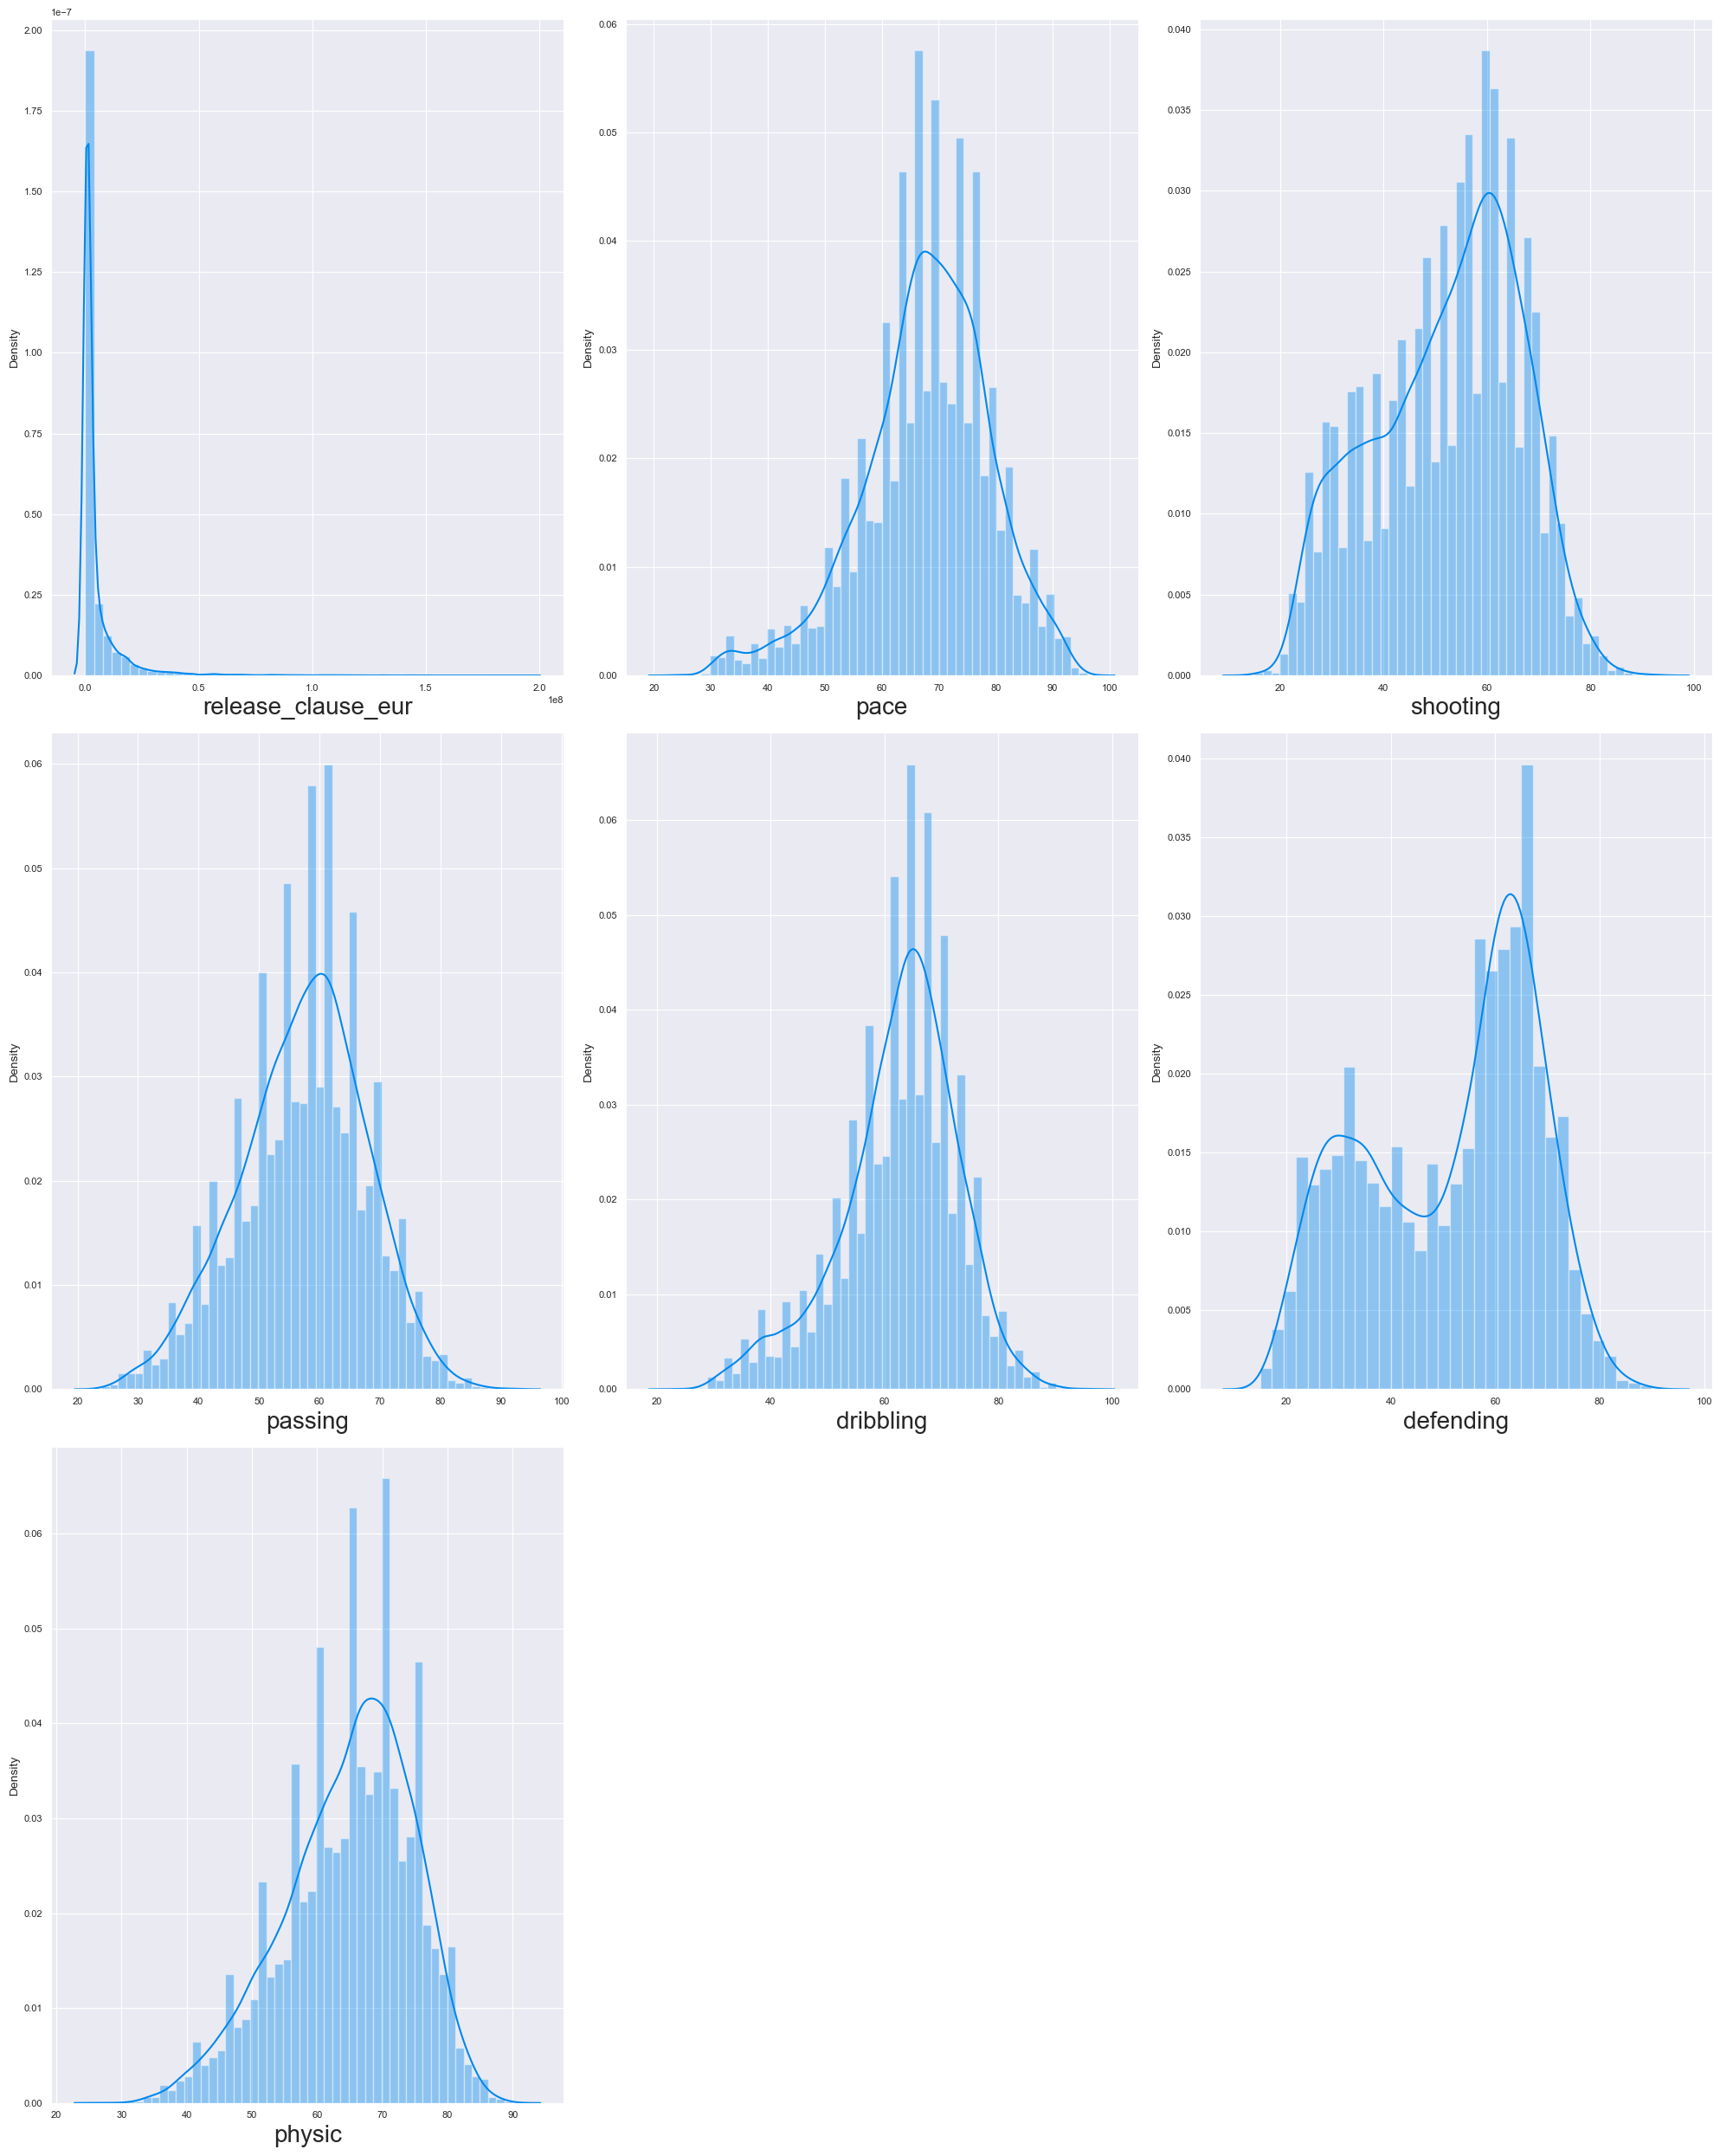

In [98]:


dist = data[['release_clause_eur','pace','shooting','passing','dribbling','defending','physic']]

plt.figure(figsize=(20,25)) # defining canvas size
plotno = 1 # counter

for column in dist: # iteration of columns / acessing the columns from  dataset
    if plotno<=8:    # set the limit
        plt.subplot(3,3,plotno) # # plotting 36 graphs (9-rows,4-columns) ,plotnumber is for count
        sns.distplot(x=dist[column]) # Plotting dist plots
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction


In [99]:
# Impute missing value using median because distribution is not normal
data.loc[data['release_clause_eur'].isnull()==True,'release_clause_eur']=data['release_clause_eur'].median()
data.loc[data['pace'].isnull()==True,'pace']=data['pace'].median()
data.loc[data['shooting'].isnull()==True,'shooting']=data['shooting'].median()
data.loc[data['passing'].isnull()==True,'passing']=data['passing'].median()
data.loc[data['dribbling'].isnull()==True,'dribbling']=data['dribbling'].median()
data.loc[data['defending'].isnull()==True,'defending']=data['defending'].median()
data.loc[data['physic'].isnull()==True,'physic']=data['physic'].median()


In [100]:
# Check missing value after imputation
print('release_clause_eur:',data['release_clause_eur'].isnull().sum())
print('pace:',data['pace'].isnull().sum())
print('shooting:',data['shooting'].isnull().sum())
print('passing:',data['passing'].isnull().sum())
print('dribbling:',data['dribbling'].isnull().sum())
print('defending:',data['defending'].isnull().sum())
print('physic:',data['physic'].isnull().sum())

release_clause_eur: 0
pace: 0
shooting: 0
passing: 0
dribbling: 0
defending: 0
physic: 0


##### CATEGORICAL

In [101]:
import pandas as pd

# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
['short_name', 'nationality', 'club', 'player_positions', 'preferred_foot', 'work_rate', 'body_type', 'real_face', 'player_tags', 'team_position', 'loaned_from', 'joined', 'nation_position', 'player_traits', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']


In [102]:
# Get the value counts
data.team_position.value_counts().head()

SUB    7820
RES    2958
GK      662
RCB     660
LCB     660
Name: team_position, dtype: int64

In [103]:
# Impute categorical data using mode(most freqent)
data['team_position'] = data['team_position'].replace(np.nan,'SUB')

In [104]:
# Check missing value after imputation
data['team_position'].isnull().sum()

0

### HANDLING CATEGORICAL DATA

*# In this data only preferred foot and team position features are important while all other features are unique and do not provide substantial information for analysis.

##### PREFERRED FOOT

In [105]:
# Gettimg value counts of preferred foot
data.preferred_foot.value_counts()

Right    13960
Left      4318
Name: preferred_foot, dtype: int64

In [106]:
# right is assign with 1 because of majority and most freqent
# left is assign with 0 because of less no
data.preferred_foot = data.preferred_foot.map({'Right':1,'Left':0})

##### TEAM POSITION

In [107]:
# Getting the value counts of team position
data.team_position.value_counts()

SUB    8060
RES    2958
GK      662
RCB     660
LCB     660
RB      560
LB      560
ST      458
RCM     411
LCM     411
RM      399
LM      398
CAM     311
RDM     244
LDM     242
RS      195
LS      195
CDM     181
LW      162
RW      161
CB      100
CM       76
RWB      58
LWB      58
RAM      23
LAM      23
RF       19
LF       19
CF       14
Name: team_position, dtype: int64

In [108]:
# Use manual encoding because lots of labels availble
data.team_position = data.team_position.map({'SUB':28,'RES':27,'GK':26,'RCB':25,'LCB':24,'RB':23,'LB':22,'ST':21,
                                            'RCM':20,'LCM':19,'RM':18,'LM':17,'CAM':16,'RDM':15,'LDM':14,'RS':13,
                                            'LS':12,'CDM':11,'LW':10,'RW':9,'CB':8,'CM':7,'RWB':6,'LWB':5,'RAM':4,
                                            'LAM':3,'RF':2,'LF':1,'CF':0})

In [109]:
data.team_position.unique()

array([ 9, 10, 16, 26, 20, 24, 21, 11, 14, 18, 25, 19, 17,  0, 28, 22, 12,
       23, 15, 27,  4, 13,  2,  7,  8,  1,  3,  6,  5], dtype=int64)

### OUTLIER HANDLING

* In this data we are handle only important feature outlier, because the remaining feature is unique or some feature is not required to handle outlier.

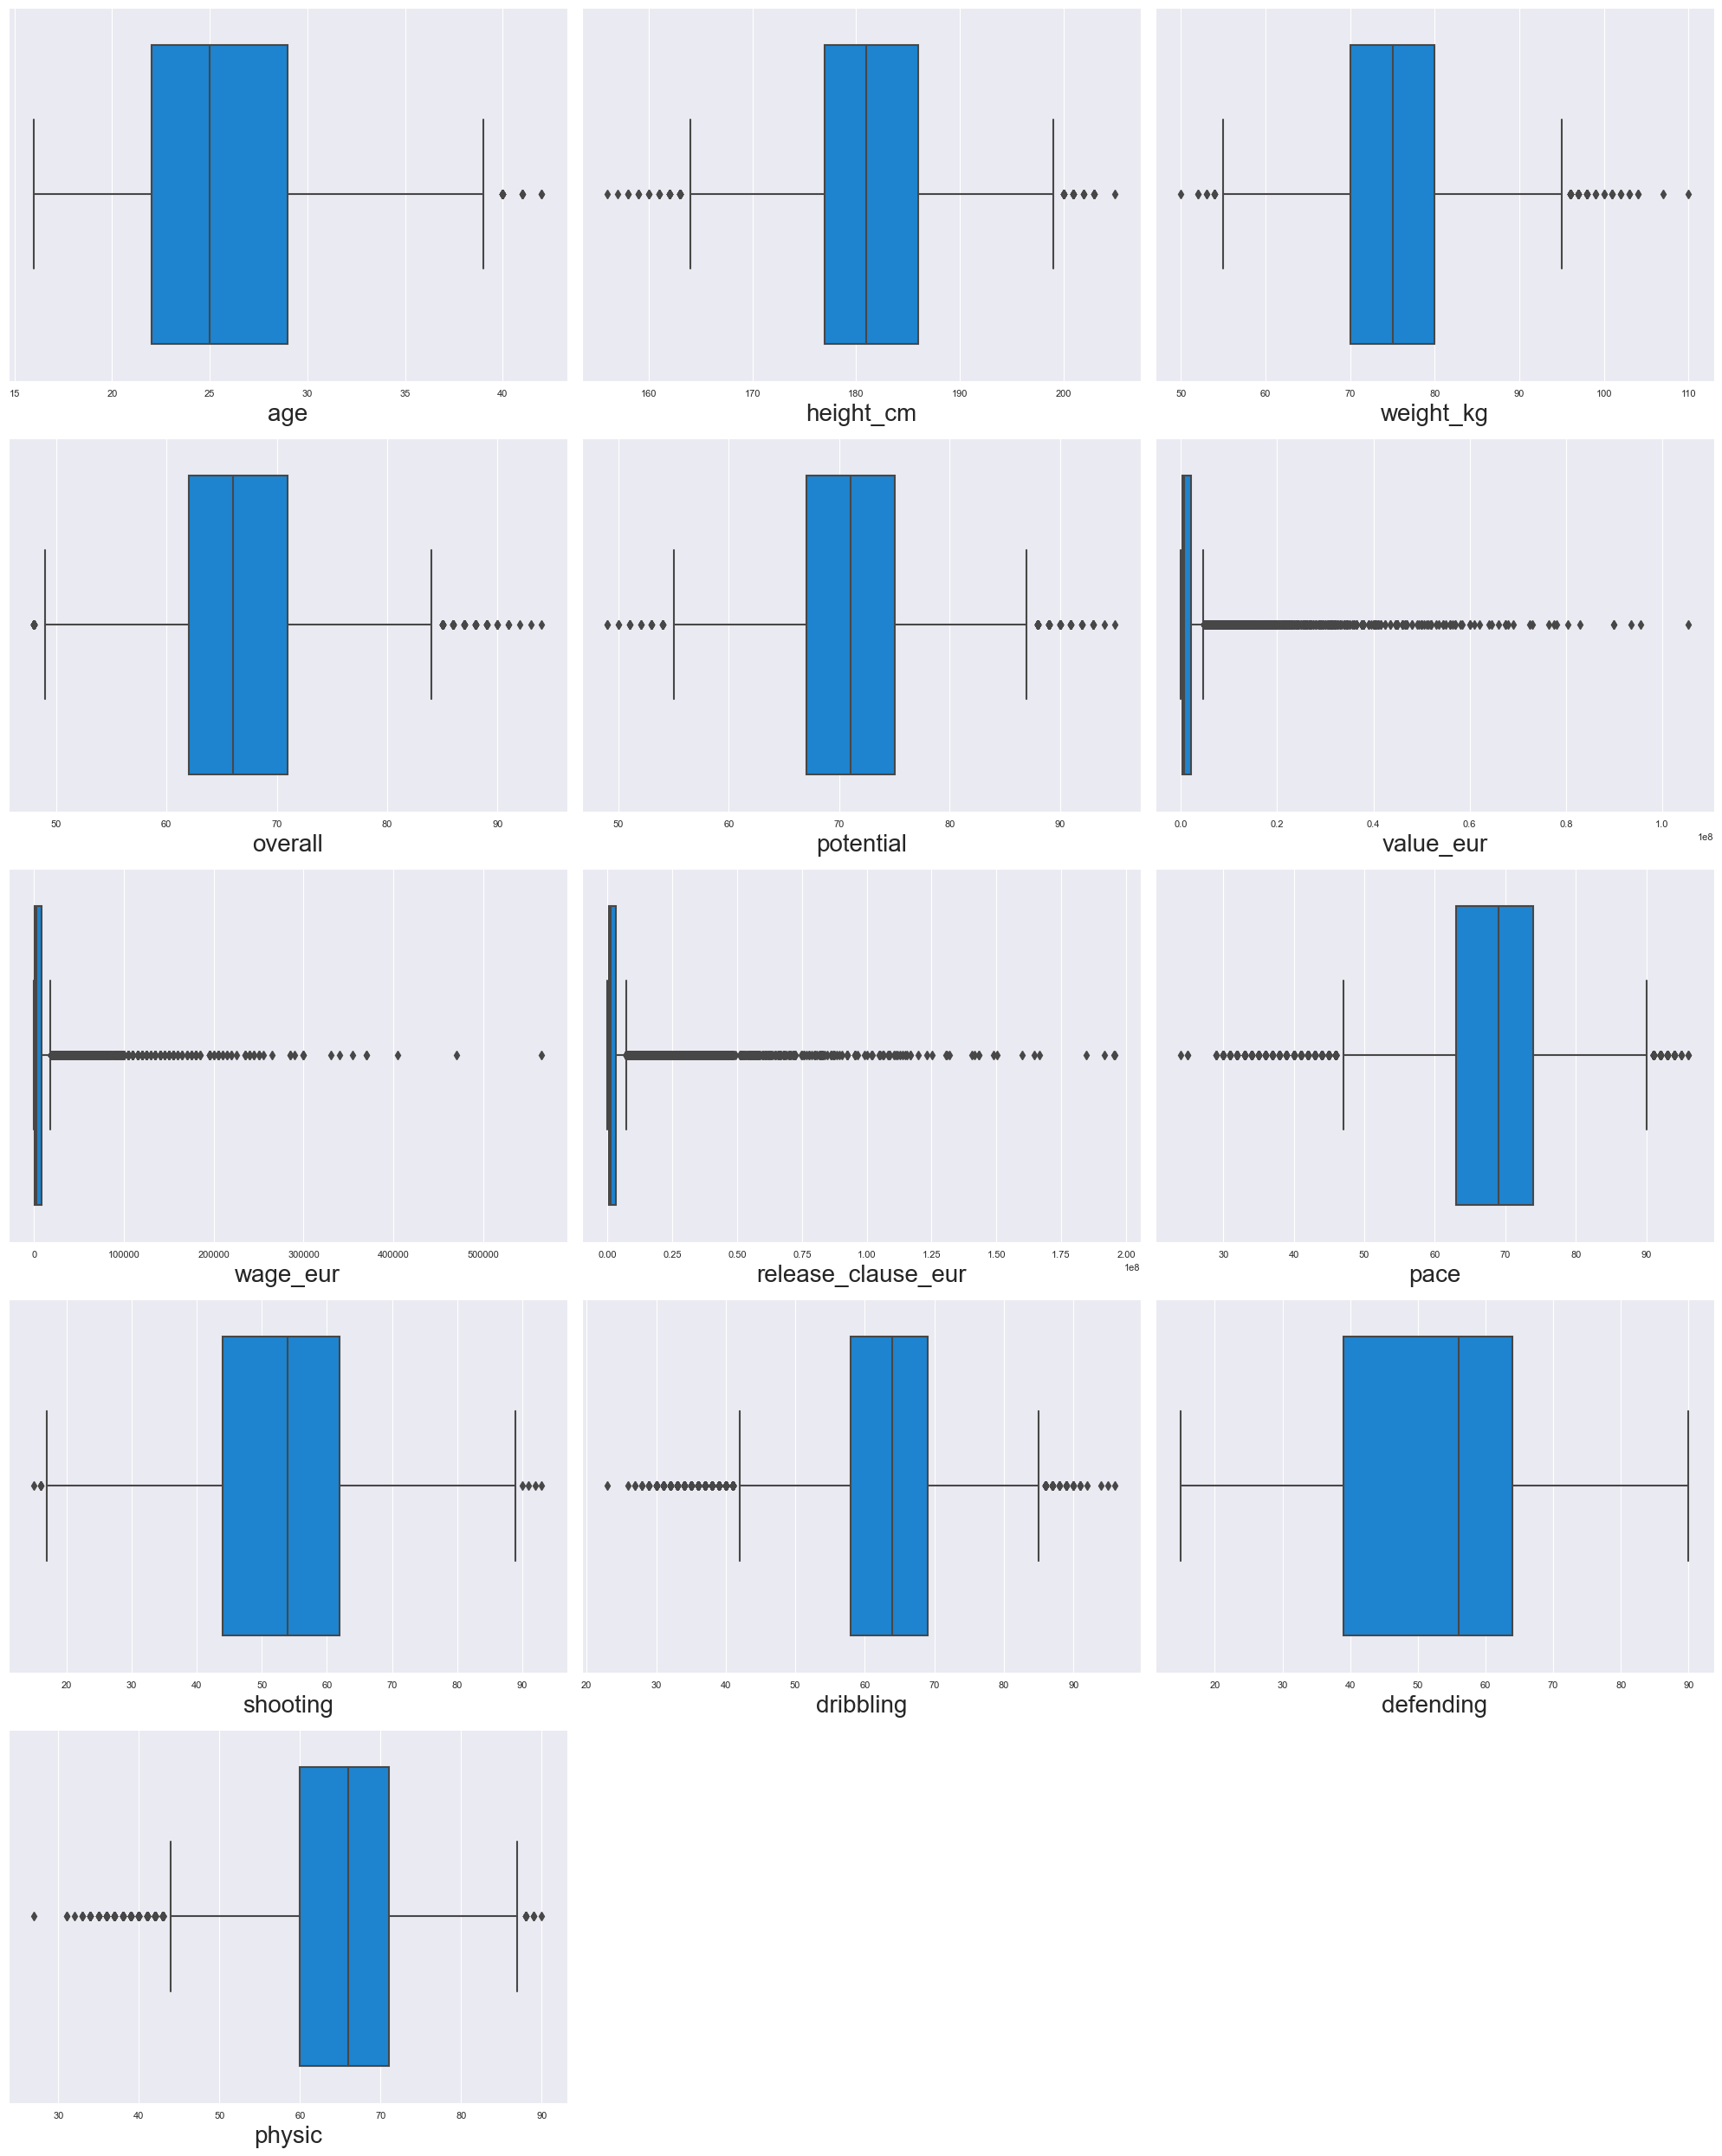

In [110]:
out = data[['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','release_clause_eur','pace',
           'shooting','dribbling','defending','physic']]

plt.figure(figsize=(20,25)) # defining canvas size
plotno = 1 # counter

for column in out: # iteration of columns / acessing the columns from  dataset
    if plotno<=16:    # set the limit
        plt.subplot(5,3,plotno) # # plotting 12 graphs (4-rows,3-columns) ,plotnumber is for count
        sns.boxplot(x=out[column]) # Plotting box plots
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage location


##### CHECKING THE DISTRIBUTION BEFORE HANDLE THE OUTLIER

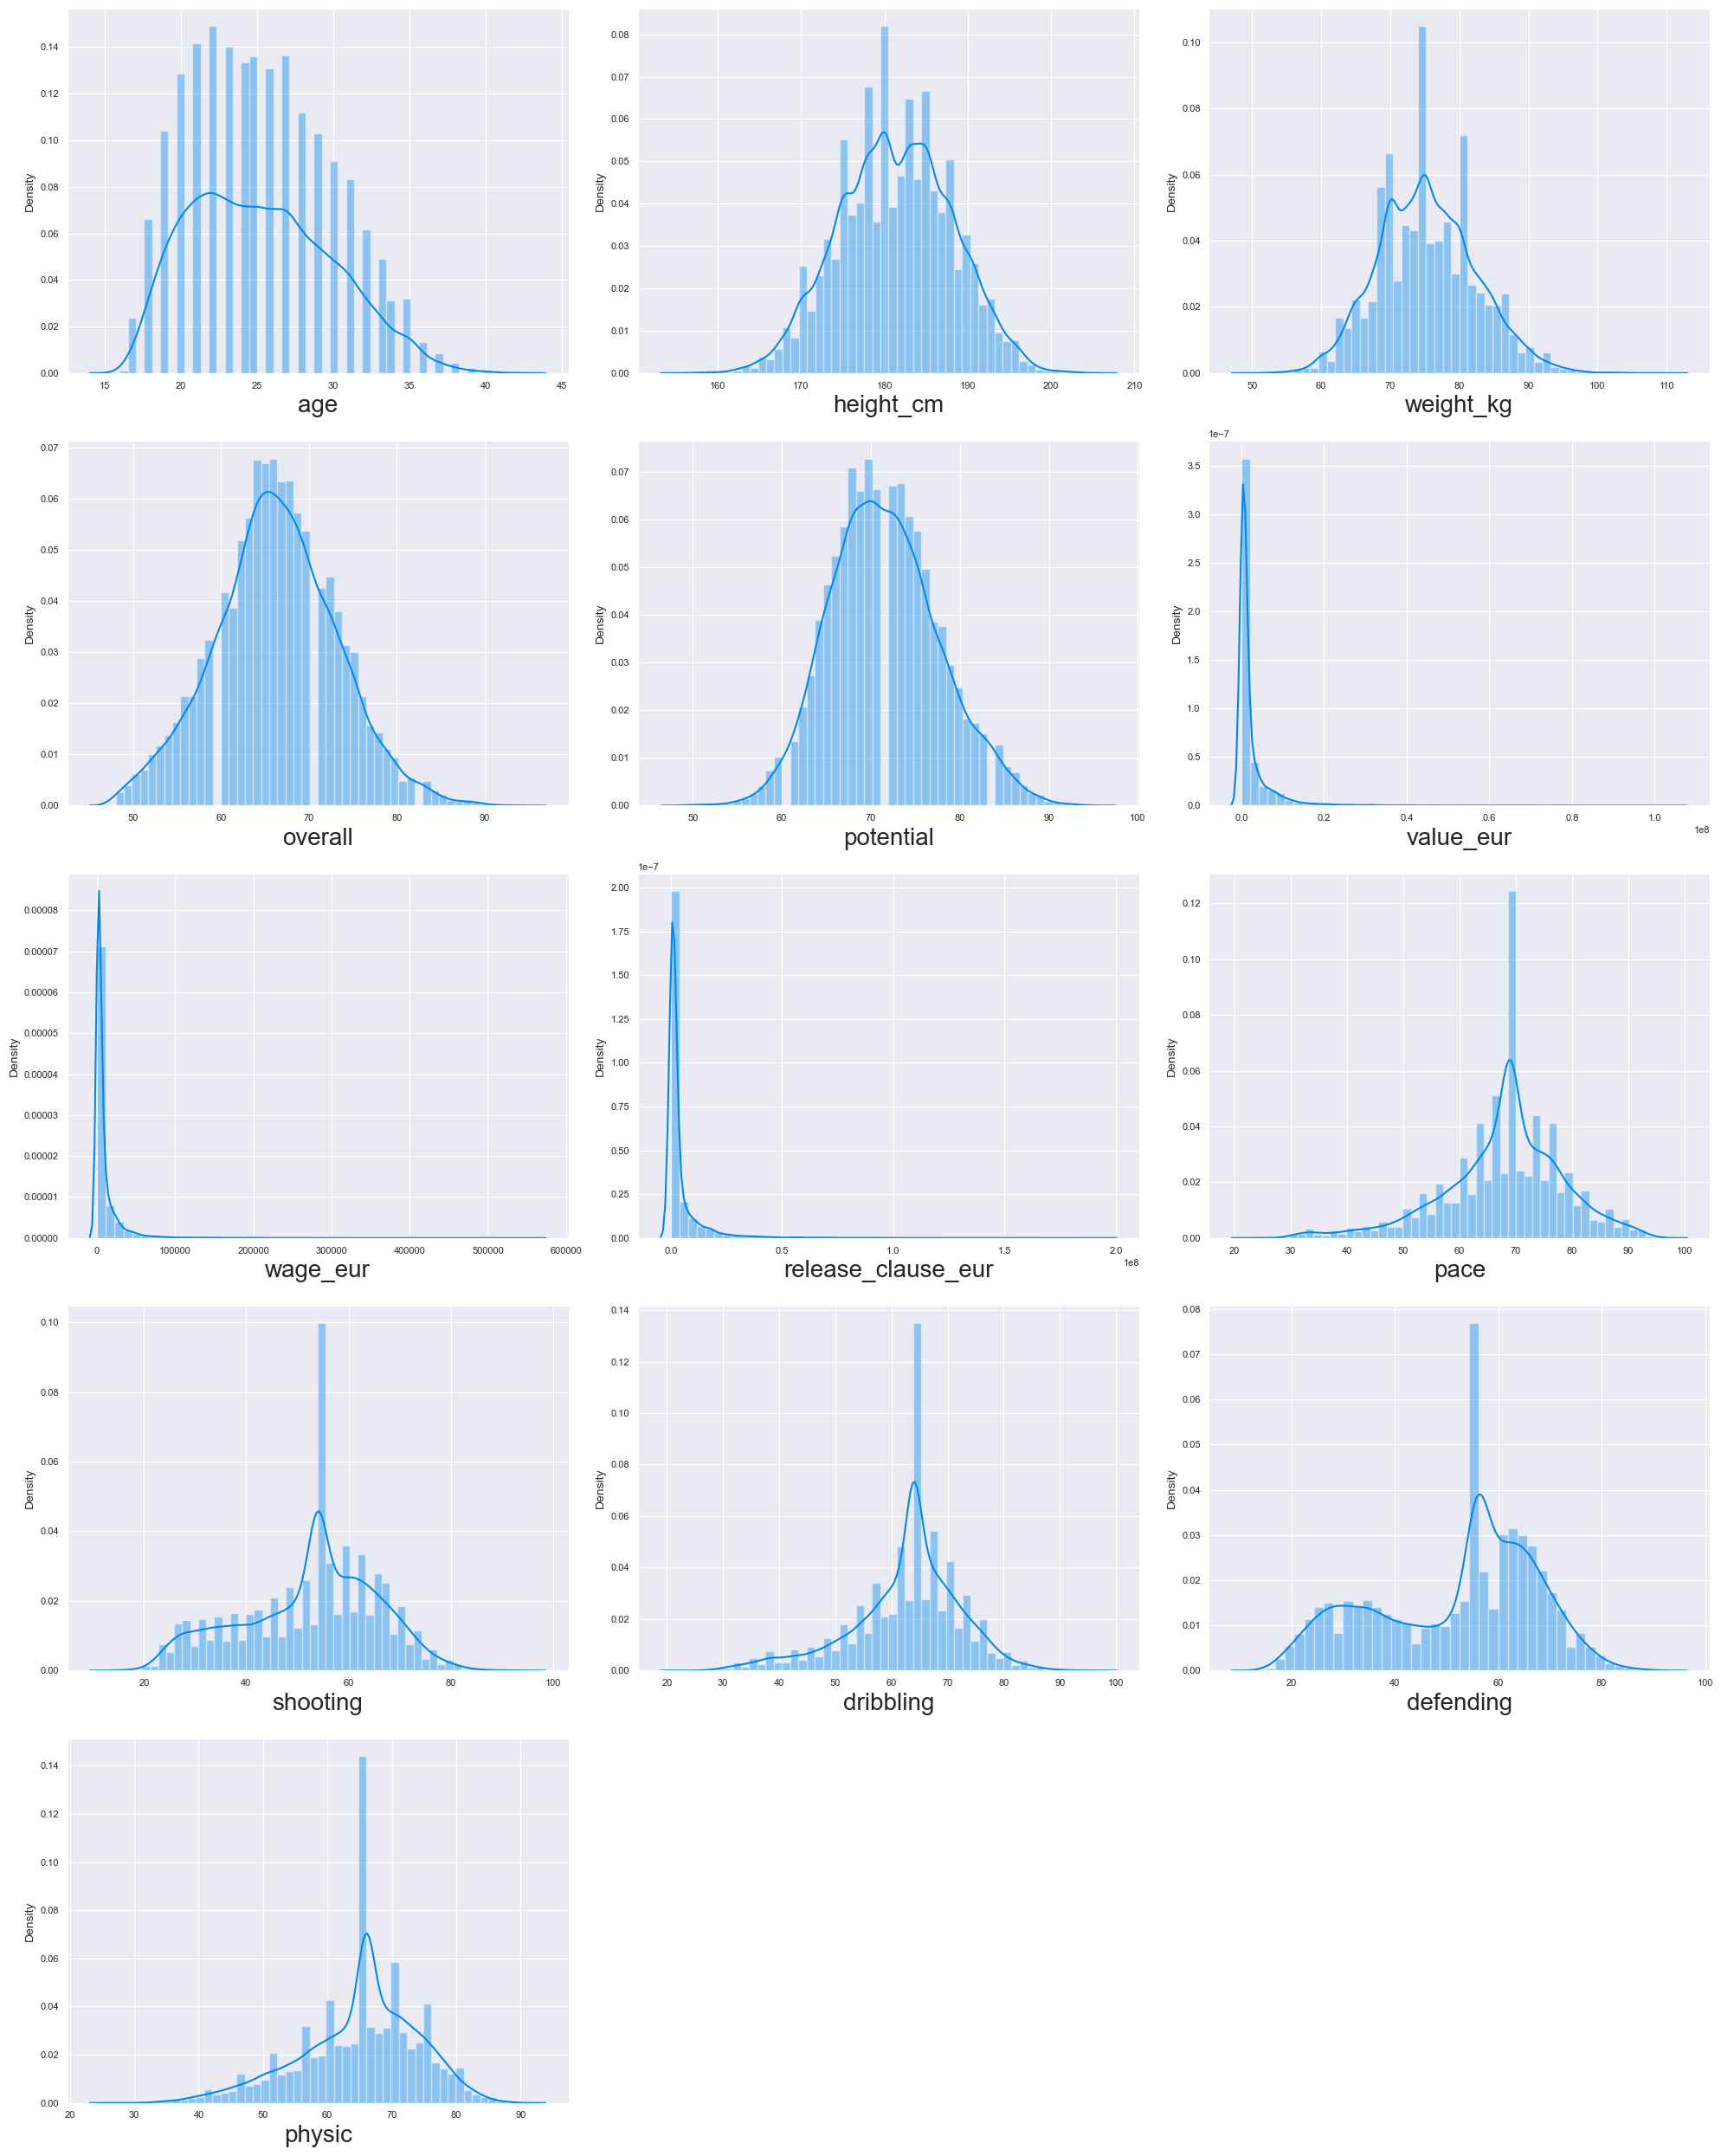

In [111]:
dist1 = data[['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','release_clause_eur','pace',
           'shooting','dribbling','defending','physic']]

plt.figure(figsize=(20,25)) # defining canvas size
plotno = 1 # counter

for column in dist1: # iteration of columns / acessing the columns from  dataset
    if plotno<=15:    # set the limit
        plt.subplot(5,3,plotno) # # plotting 36 graphs (9-rows,4-columns) ,plotnumber is for count
        sns.distplot(x=out[column]) # Plotting box plots
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage location

* Here age,height_cm,weight_kg,overall,potential is follow a normal distribution so we are emperical rule and remaining feature we use iqr.

##### EMPERICAL RULE OR 3 STANDARD DEVIATION RULE TO DETECT THE OUTLIER

##### AGE

In [112]:
upper_limit = data.age.mean() + 3*data.age.std()
print("Upper limit:",upper_limit)
lower_limit = data.age.mean() - 3*data.age.std()
print("Lower limit:",lower_limit)

Upper limit: 39.25418488202056
Lower limit: 11.312397895088532


In [113]:
# Getting the percentage of outlier
len(data.loc[data['age'] > upper_limit])/18278*100
# In age feature less than 5% outlier we are impute the outlier

0.10395010395010396

In [114]:
# impute outlier with mean because feature follow a normal distribution and continous data
data.loc[data['age'] > upper_limit,'age']=data['age'].mean()

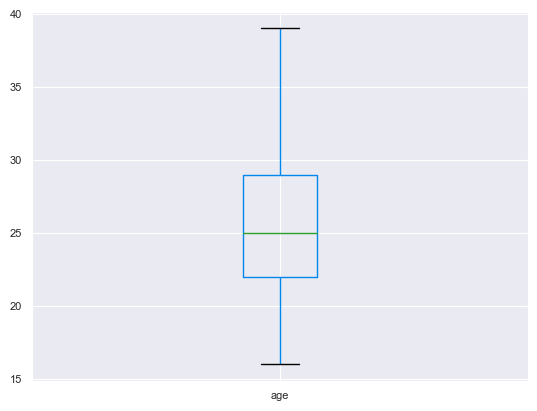

In [115]:
data.boxplot('age')
plt.show()

* Outlier impute successfully

##### HEIGHT CM

In [116]:
upper_limit = data.height_cm.mean() + 3*data.height_cm.std()
print("Upper limit:",upper_limit)
lower_limit = data.height_cm.mean() - 3*data.height_cm.std()
print("Lower limit:",lower_limit)

Upper limit: 201.6330681374958
Lower limit: 161.09129995529332


In [117]:
# Checking the percentage of outlier
len(data.loc[data['height_cm'] > upper_limit])/18278*100

0.06018163912900754

In [118]:
# impute outlier both lower and upper side
data.loc[data['height_cm'] <  lower_limit,'height_cm'] = data['height_cm'].mean()
data.loc[data['height_cm'] > upper_limit,'height_cm'] = data['height_cm'].mean()

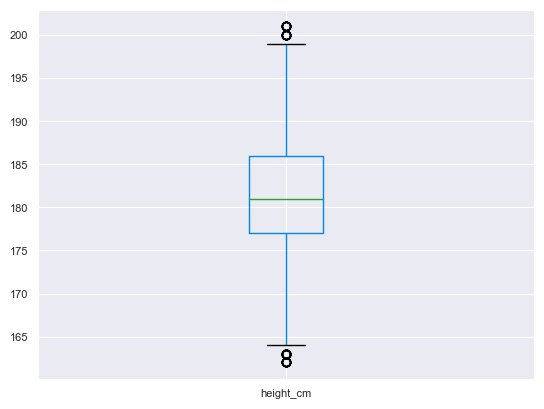

In [119]:
data.boxplot('height_cm')
plt.show()

* Outlier is impute but box plot are show outlier

##### WEIGHT KG

In [120]:
upper_limit = data.weight_kg.mean() + 3*data.weight_kg.std()
print("Upper limit:",upper_limit)
lower_limit = data.weight_kg.mean() - 3*data.weight_kg.std()
print("Lower limit:",lower_limit)

Upper limit: 96.41957385582987
Lower limit: 54.13311243369853


In [121]:
# Lower limit percentage
len(data.loc[data['weight_kg'] < lower_limit])/18278*100

0.06018163912900754

In [122]:
# upper limit percentage
len(data.loc[data['weight_kg'] > upper_limit])/18278*100

0.22431338220811906

In [123]:
# impute outlier
data.loc[data['weight_kg'] < lower_limit,'weight_kg']=data['weight_kg'].mean()
data.loc[data['weight_kg'] > upper_limit,'weight_kg']=data['weight_kg'].mean()

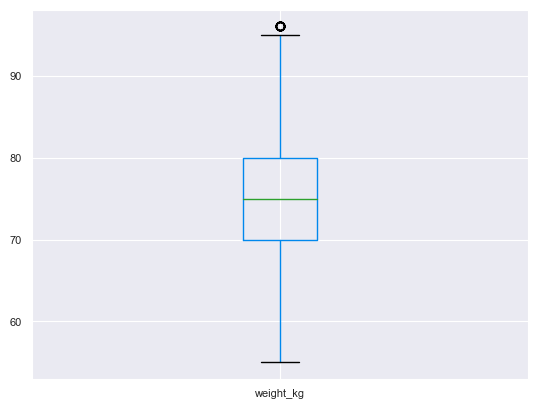

In [124]:
data.boxplot('weight_kg')
plt.show()

##### OVERALL

In [125]:
upper_limit = data.overall.mean() + 3*data.overall.std()
print("Upper limit:",upper_limit)
lower_limit = data.overall.mean() - 3*data.overall.std()
print("Lower limit:",lower_limit)


Upper limit: 87.09485374672605
Lower limit: 45.395134216946126


In [126]:
data.loc[data['overall'] < lower_limit]

Empty DataFrame
Columns: [short_name, age, height_cm, weight_kg, nationality, club, overall, potential, value_eur, wage_eur, player_positions, preferred_foot, international_reputation, weak_foot, skill_moves, work_rate, body_type, real_face, release_clause_eur, player_tags, team_position, team_jersey_number, loaned_from, joined, contract_valid_until, nation_position, nation_jersey_number, pace, shooting, passing, dribbling, defending, physic, gk_diving, gk_handling, gk_kicking, gk_reflexes, gk_speed, gk_positioning, player_traits, attacking_crossing, attacking_finishing, attacking_heading_accuracy, attacking_short_passing, attacking_volleys, skill_dribbling, skill_curve, skill_fk_accuracy, skill_long_passing, skill_ball_control, movement_acceleration, movement_sprint_speed, movement_agility, movement_reactions, movement_balance, power_shot_power, power_jumping, power_stamina, power_strength, power_long_shots, mentality_aggression, mentality_interceptions, mentality_positioning, mentality_vision, mentality_penalties, mentality_composure, defending_marking, defending_standing_tackle, defending_sliding_tackle, goalkeeping_diving, goalkeeping_handling, goalkeeping_kicking, goalkeeping_positioning, goalkeeping_reflexes, ls, st, rs, lw, lf, cf, rf, rw, lam, cam, ram, lm, lcm, cm, rcm, rm, lwb, ldm, cdm, rdm, rwb, lb, lcb, cb, rcb, rb, ...]
Index: []

[0 rows x 101 columns]

In [127]:
# no outlier in lower limit

In [128]:
# Get the percentage of outlier
len(data.loc[data['overall'] > upper_limit])/18278*100

0.218842324105482

In [129]:
data.loc[data['overall'] > upper_limit, 'overall'] = data['overall'].mean()

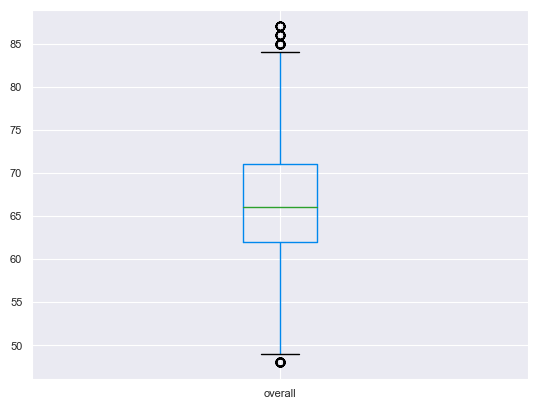

In [130]:
data.boxplot('overall')
plt.show()

##### POTENTIAL

In [131]:
upper_limit = data.potential.mean() + 3*data.potential.std()
print("Upper limit:",upper_limit)
lower_limit = data.potential.mean() - 3*data.potential.std()
print("Lower limit:",lower_limit)

Upper limit: 89.96589419280835
Lower limit: 53.12787974307086


In [132]:
# Lower limit
len(data.loc[data['potential'] < lower_limit])/18278*100

0.09300798774482985

In [133]:
# upperlimit
len(data.loc[data['potential'] > upper_limit])/18278*100

0.21337126600284498

In [134]:
# impute outlier
data.loc[data['potential'] < lower_limit,'potential']=data['potential'].mean()
data.loc[data['potential'] > upper_limit,'potential']=data['potential'].mean()

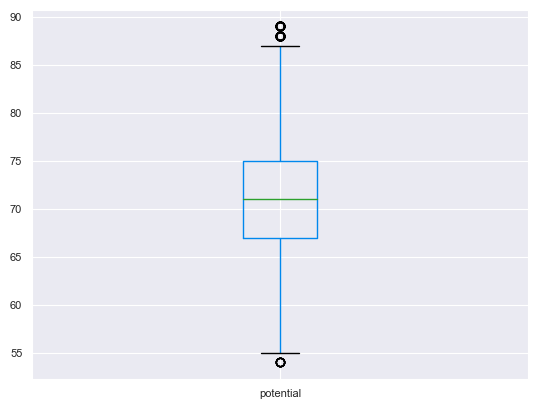

In [135]:
data.boxplot('potential')
plt.show()

##### INTER QUARTILE  RANGE (IQR)

##### VALUE EUR

In [136]:
# Use iqr because of some right skewed in data

# Step:1
from scipy import stats
iqr = stats.iqr(data['value_eur'],interpolation='midpoint')
print("IQR",iqr)

# step:2
Q1 = data['value_eur'].quantile(0.25)  # first quantile
Q3 = data['value_eur'].quantile(0.75)  #third quantile
# getting max & min limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)

IQR 1775000.0
minimum limit -2337500.0
maximum limit 4762500.0


In [137]:
# get the percentage
len(data.loc[data['value_eur'] > max_limit])/18278*100

13.737826895721634

* Here outlier is more than 5% so we not impute the outlier

##### WAGE EUR

In [138]:
# Use iqr because of some right skewed in data

# Step:1
from scipy import stats
iqr = stats.iqr(data['wage_eur'],interpolation='midpoint')
print("IQR",iqr)

# step:2
Q1 = data['wage_eur'].quantile(0.25)  # first quantile
Q3 = data['wage_eur'].quantile(0.75)  #third quantile
# getting max & min limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)

max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)

IQR 7000.0
minimum limit -9500.0
maximum limit 18500.0


In [139]:
len(data.loc[data['wage_eur'] > max_limit])/18278*100

12.911697122223437

* Here also outlier is more than 5% so we dont impute the outlier

##### RELEASE CLAUSE EUR

In [140]:
# Use iqr because of some right skewed in data

# Step:1
from scipy import stats
iqr = stats.iqr(data['release_clause_eur'],interpolation='midpoint')
print("IQR",iqr)

# step:2
Q1 = data['release_clause_eur'].quantile(0.25)  # first quantile
Q3 = data['release_clause_eur'].quantile(0.75)  #third quantile
# getting max & min limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)

IQR 2604000.0
minimum limit -3310000.0
maximum limit 7106000.0


In [141]:
len(data.loc[data['release_clause_eur'] > max_limit])/18278*100

15.368202210307475

* Here also outlier is more than 5% so we dont impute the outlier

##### PACE

In [142]:
# Use iqr because of some left skewed in data

# Step:1
from scipy import stats
iqr = stats.iqr(data['pace'],interpolation='midpoint')
print("IQR",iqr)

# step:2
Q1 = data['pace'].quantile(0.25)  # first quantile
Q3 = data['pace'].quantile(0.75)  #third quantile
# getting max & min limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)


IQR 11.0
minimum limit 46.5
maximum limit 90.5


In [143]:
# min limit
len(data.loc[data['pace'] < min_limit])/18278*100

4.19083050661998

In [144]:
# max limit
len(data.loc[data['pace'] > max_limit])/18278*100

1.0285589232957655

In [145]:
# impute outlier both side
data.loc[data['pace'] < min_limit,'pace'] = data['pace'].median()
data.loc[data['pace'] > max_limit,'pace'] = data['pace'].median()

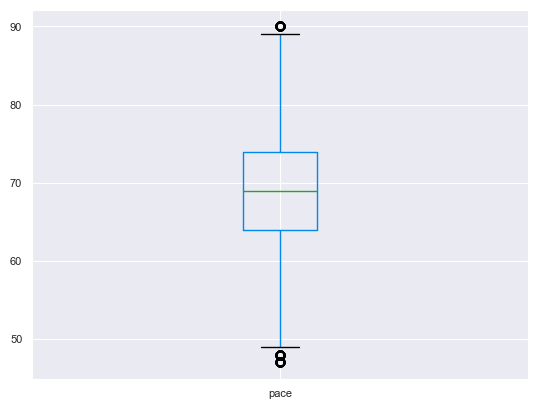

In [146]:
# box plot after impute the outlier
data.boxplot('pace')
plt.show()

* Outlier is impute successfully, but box plot is show outlier

##### SHOOTING

In [147]:
# Use iqr because of some left skewed in data

# Step:1
from scipy import stats
iqr = stats.iqr(data['shooting'],interpolation='midpoint')
print("IQR",iqr)

# step:2
Q1 = data['shooting'].quantile(0.25)  # first quantile
Q3 = data['shooting'].quantile(0.75)  #third quantile
# getting max & min limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)


IQR 18.0
minimum limit 17.0
maximum limit 89.0


In [148]:
# min limit percentage
len(data.loc[data['shooting'] < min_limit])/18278*100

0.02735529051318525

In [149]:
# max limit percentage
len(data.loc[data['shooting'] > max_limit])/18278*100

0.0218842324105482

In [150]:
# impute the outlier
data.loc[data['shooting'] < min_limit,'shooting'] = data['shooting'].median()
data.loc[data['shooting'] > max_limit,'shooting'] = data['shooting'].median()

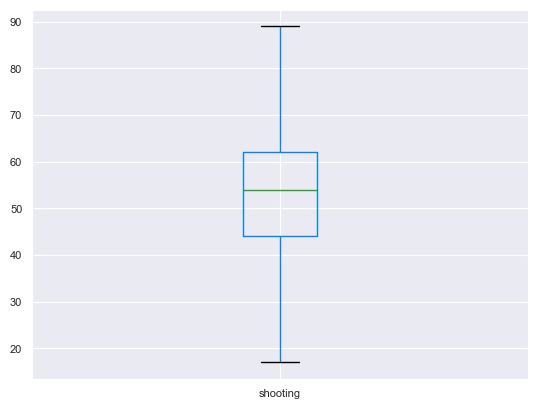

In [151]:
# boxplot
data.boxplot('shooting')
plt.show()

##### DRIBBLING

In [152]:
# Use iqr because of some left skewed in data

# Step:1
from scipy import stats
iqr = stats.iqr(data['dribbling'],interpolation='midpoint')
print("IQR",iqr)

# step:2
Q1 = data['dribbling'].quantile(0.25)  # first quantile
Q3 = data['dribbling'].quantile(0.75)  #third quantile
# getting max & min limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)


IQR 11.0
minimum limit 41.5
maximum limit 85.5


In [153]:
# min limit percentage
len(data.loc[data['shooting'] < min_limit])/18278*100

21.80763759711128

* Here the minimum limit percentage is 21 percent so we dont impute the outlier

In [154]:
# max limit percentage
len(data.loc[data['shooting'] > max_limit])/18278*100

0.0656526972316446

* Here the percentage is less than 5% so we impute the outlier in max limit

In [155]:
# impute outlier
data.loc[data['dribbling'] > max_limit,'dribbling']=data['dribbling'].median()

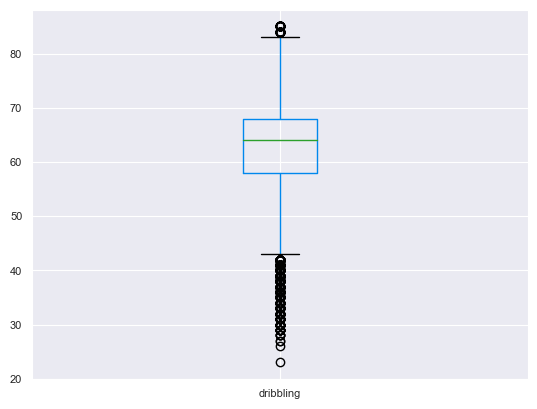

In [156]:
# box plot
data.boxplot('dribbling')
plt.show()

* Outlier is impute sucessfully.

##### PHYSIC

In [157]:
# Use iqr because of some left skewed in data

# Step:1
from scipy import stats
iqr = stats.iqr(data['physic'],interpolation='midpoint')
print("IQR",iqr)

# step:2
Q1 = data['physic'].quantile(0.25)  # first quantile
Q3 = data['physic'].quantile(0.75)  #third quantile
# getting max & min limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)


IQR 11.0
minimum limit 43.5
maximum limit 87.5


In [158]:
# min limit percentage
len(data.loc[data['physic'] < min_limit])/18278*100

2.303315461210198

In [159]:
# max limit percentage
len(data.loc[data['physic'] > max_limit])/18278*100

0.0656526972316446

In [160]:
# impute outlier
data.loc[data['physic'] < min_limit,'physic']=data['physic'].median()
data.loc[data['physic'] > max_limit,'physic']=data['physic'].median()

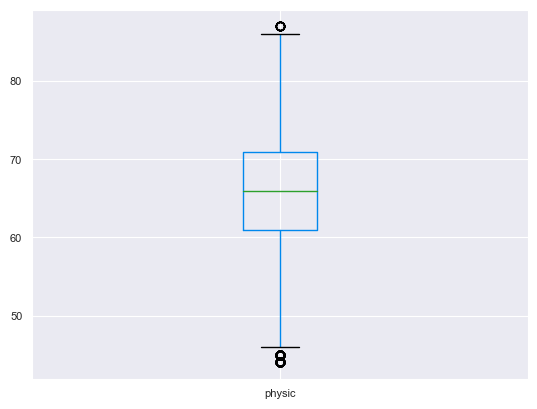

In [161]:
# boxplot
data.boxplot('physic')
plt.show()

* Outlier is impute successfull, this outlier is shown after impute the outlier.

##### CHECKING DISTRIBUTION AFTER IMPUTE OUTLIER

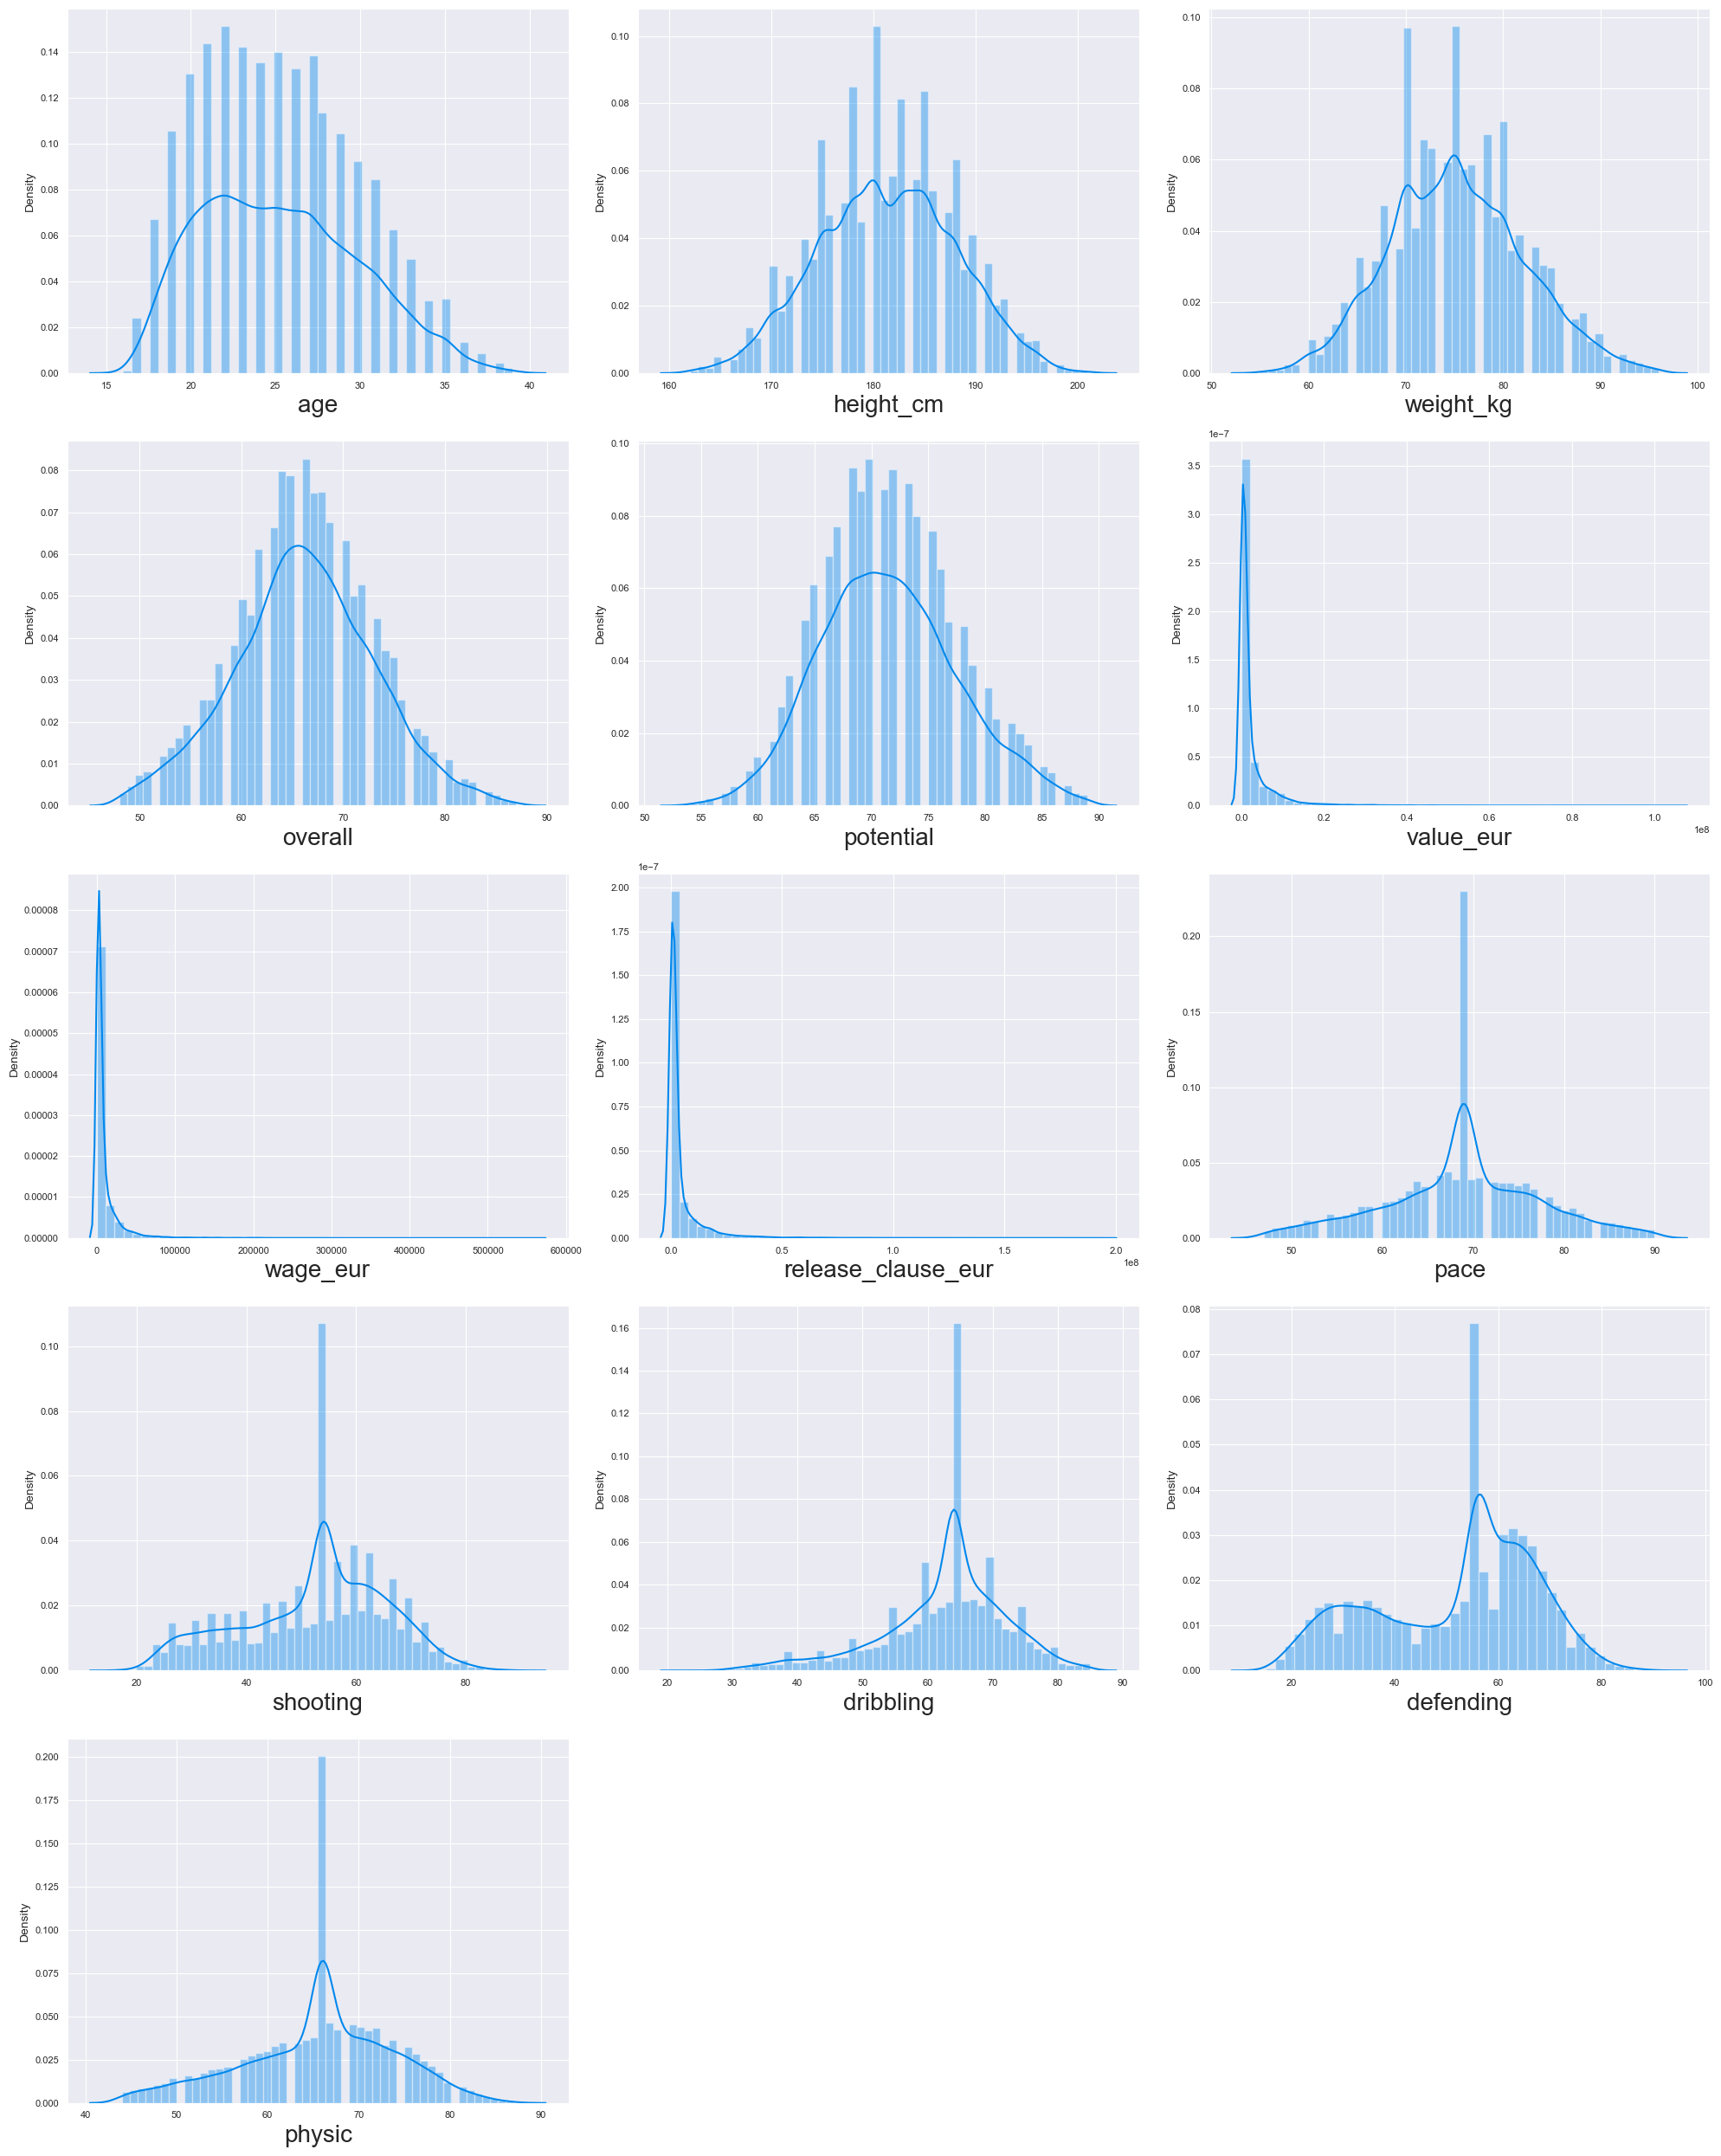

In [162]:
dist2 = data[['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','release_clause_eur','pace',
           'shooting','dribbling','defending','physic']]

plt.figure(figsize=(20,25)) # defining canvas size
plotno = 1 # counter

for column in dist2: # iteration of columns / acessing the columns from  dataset
    if plotno<=15:    # set the limit
        plt.subplot(5,3,plotno) # # plotting 13 graphs (5-rows,3-columns) ,plotnumber is for count
        sns.distplot(x=dist2[column]) # Plotting box plots
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction


### FEATURE SCALING


#### MIN-MAX SCALING
* Scale the feature between 0 to 1
* Only scale the continous feature
* Use min max scaling because of dataset contain large amount of outlier so outlier is going to be biased.

In [163]:
# Scale only continous feature in nature
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # Object Creation
data[['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','release_clause_eur',
    'pace','shooting','passing','dribbling','defending','physic','attacking_crossing','attacking_crossing',
    'attacking_finishing','attacking_heading_accuracy','attacking_short_passing','attacking_volleys',
    'skill_dribbling','skill_curve','skill_fk_accuracy','skill_fk_accuracy','skill_long_passing',
    'skill_ball_control','skill_ball_control','movement_acceleration','movement_sprint_speed',
    'movement_agility','movement_reactions','movement_balance','power_shot_power','power_jumping',
    'power_stamina','power_strength','power_long_shots','mentality_aggression','mentality_interceptions',
    'mentality_positioning','mentality_vision','mentality_penalties','mentality_composure','defending_marking',
    'defending_standing_tackle','defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling',
    'goalkeeping_kicking','goalkeeping_positioning',
    'goalkeeping_reflexes']]=scaler.fit_transform(data[['age','height_cm','weight_kg','overall','potential',
                'value_eur','wage_eur','release_clause_eur','pace','shooting','passing','dribbling','defending',
                'physic','attacking_crossing','attacking_crossing','attacking_finishing','attacking_heading_accuracy',
                'attacking_short_passing','attacking_volleys','skill_dribbling','skill_curve','skill_fk_accuracy',
                'skill_fk_accuracy','skill_long_passing','skill_ball_control','skill_ball_control','movement_acceleration',
                'movement_sprint_speed','movement_agility','movement_reactions','movement_balance',
                'power_shot_power','power_jumping','power_stamina','power_strength','power_long_shots','mentality_aggression',
                'mentality_interceptions','mentality_positioning','mentality_vision','mentality_penalties',
                'mentality_composure','defending_marking','defending_standing_tackle','defending_sliding_tackle',
                'goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes']])

In [164]:
# Set the display option to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
data.head(1)

short_name       age  height_cm  weight_kg nationality          club  \
0   L. Messi  0.695652   0.205128   0.414634   Argentina  FC Barcelona   

   overall  potential  value_eur  wage_eur player_positions  preferred_foot  \
0  0.46782   0.501872   0.905213       1.0       RW, CF, ST               0   

   international_reputation  weak_foot  skill_moves   work_rate body_type  \
0                         5          4            4  Medium/Low     Messi   

  real_face  release_clause_eur  \
0       Yes                 1.0   

                                         player_tags  team_position  \
0  Dribbler, Distance Shooter, Crosser, FK Specia...              9   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   

  nation_position  nation_jersey_number      pace  shooting  passing  \
0             NaN                   NaN  0.930233  0.513889      1.0   

   dribbling  defending    physic  gk_diving  gk_handling  gk_kicking  \
0    0.66129       0.32  0.511628        NaN          NaN         NaN   

   gk_reflexes  gk_speed  gk_positioning  \
0          NaN       NaN             NaN   

                                       player_traits  attacking_crossing  \
0  Beat Offside Trap, Argues with Officials, Earl...            0.943182   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                  1.0                    0.738636                      1.0   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0           0.977011              1.0     0.988636                1.0   

   skill_long_passing  skill_ball_control  movement_acceleration  \
0                 1.0                 1.0               0.929412   

   movement_sprint_speed  movement_agility  movement_reactions  \
0               0.858824          0.964706            0.986667   

   movement_balance  power_shot_power  power_jumping  power_stamina  \
0          0.976471          0.888889       0.644737       0.741176   

   power_strength  power_long_shots  mentality_aggression  \
0        0.623377               1.0              0.453488   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                  0.41573               0.989247               1.0   

   mentality_penalties  mentality_composure  defending_marking  \
0                  0.8                  1.0           0.344086   

   defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
0                   0.367816                  0.264368             0.05618   

   goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
0               0.10989             0.152174                 0.144444   

   goalkeeping_reflexes  ls  st  rs  lw  lf  cf  rf  rw lam cam ram  lm lcm  \
0              0.076923  89  89  89  93  93  93  93  93  93  93  93  92  87   

   cm rcm  rm lwb ldm cdm rdm rwb  lb lcb  cb rcb  rb age_group  
0  87  87  92  68  66  66  66  68  63  52  52  52  63  (30, 35]

# FEATURE SELECTION

1.DROP UNIQUE AND CONSTANT FEATURE

* Here we are going to drop unique column as well as lots of missing value column.
* The column ls,st,rs,lw,cf etc.. are playing position in the game and the data in this columns is basically the potential of the player if were to play in that position, so we assume the player only playes with the team position and we will drop this column

In [165]:
# Drop column
data.drop(['short_name','nationality','club','player_positions','body_type',
          'real_face','player_tags','team_jersey_number','loaned_from','joined','contract_valid_until','nation_position',
          'nation_jersey_number','gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning',
          'player_traits','ls','st','rs','lw','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm',
          'cdm','rdm','rwb','lb','lcb','cb','rcb','rb','lf','work_rate'],axis=1,inplace=True)

In [166]:
data.head()

age  height_cm  weight_kg  overall  potential  value_eur  wage_eur  \
0  0.695652   0.205128   0.414634  0.46782   0.501872   0.905213  1.000000   
1  0.782609   0.641026   0.682927  0.46782   0.501872   0.554502  0.716814   
2  0.478261   0.333333   0.317073  0.46782   0.501872   1.000000  0.513274   
3  0.434783   0.666667   0.780488  0.46782   0.501872   0.734597  0.221239   
4  0.521739   0.333333   0.463415  0.46782   0.501872   0.853081  0.831858   

   preferred_foot  international_reputation  weak_foot  skill_moves  \
0               0                         5          4            4   
1               1                         5          4            5   
2               1                         5          5            5   
3               1                         3          3            1   
4               1                         4          4            4   

   release_clause_eur  team_position      pace  shooting   passing  dribbling  \
0            1.000000              9  0.930233  0.513889  1.000000    0.66129   
1            0.492816             10  1.000000  0.513889  0.852941    0.66129   
2            0.996935             16  0.511628  0.944444  0.926471    0.66129   
3            0.841154             26  0.511628  0.513889  0.500000    0.66129   
4            0.942284             10  0.511628  0.916667  0.911765    0.66129   

   defending    physic  attacking_crossing  attacking_finishing  \
0   0.320000  0.511628            0.943182             1.000000   
1   0.266667  0.790698            0.897727             0.989247   
2   0.226667  0.325581            0.931818             0.913978   
3   0.546667  0.511628            0.090909             0.096774   
4   0.266667  0.511628            0.863636             0.881720   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                    0.738636                 1.000000           0.977011   
1                    0.954545                 0.894118           0.965517   
2                    0.647727                 0.941176           0.965517   
3                    0.113636                 0.423529           0.114943   
4                    0.636364                 0.964706           0.919540   

   skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0         1.000000     0.988636           1.000000            1.000000   
1         0.913978     0.852273           0.800000            0.821429   
2         0.989247     0.931818           0.922222            0.869048   
3         0.086022     0.079545           0.111111            0.380952   
4         0.978495     0.875000           0.833333            0.892857   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0            1.000000               0.929412               0.858824   
1            0.956044               0.905882               0.941176   
2            0.989011               0.964706               0.917647   
3            0.274725               0.364706               0.576471   
4            0.978022               0.964706               0.905882   

   movement_agility  movement_reactions  movement_balance  power_shot_power  \
0          0.964706            0.986667          0.976471          0.888889   
1          0.894118            1.000000          0.694118          1.000000   
2          1.000000            0.946667          0.847059          0.814815   
3          0.658824            0.893333          0.435294          0.555556   
4          0.988235            0.920000          0.964706          0.839506   

   power_jumping  power_stamina  power_strength  power_long_shots  \
0       0.644737       0.741176        0.623377          1.000000   
1       1.000000       0.858824        0.753247          0.988889   
2       0.552632       0.811765        0.376623          0.888889   
3       0.776316       0.341176        0.753247          0.088889   
4       0.486842       0.847059        0.558442          0.844444  

### CHECKING CORRELATION

In [167]:
data.corr()

age  height_cm  weight_kg   overall  \
age                         1.000000   0.081825   0.235507  0.465942   
height_cm                   0.081825   1.000000   0.758767  0.040680   
weight_kg                   0.235507   0.758767   1.000000  0.152619   
overall                     0.465942   0.040680   0.152619  1.000000   
potential                  -0.263493  -0.002573  -0.015062  0.627276   
value_eur                   0.083345   0.010298   0.049439  0.568768   
wage_eur                    0.152189   0.019599   0.063460  0.496974   
preferred_foot              0.006318   0.083465   0.076584 -0.035088   
international_reputation    0.256318   0.038448   0.089659  0.431482   
weak_foot                   0.073591  -0.173893  -0.126302  0.227064   
skill_moves                 0.048315  -0.427502  -0.347747  0.400131   
release_clause_eur          0.068669   0.011371   0.045490  0.539411   
team_position              -0.162284   0.115193   0.065831 -0.272091   
pace                       -0.066880  -0.322364  -0.271491  0.185569   
shooting                    0.223736  -0.166607  -0.073823  0.454310   
passing                     0.307117  -0.251701  -0.157103  0.627560   
dribbling                   0.152476  -0.349534  -0.251712  0.536466   
defending                   0.245411   0.226193   0.224703  0.303984   
physic                      0.377200   0.413394   0.488847  0.450878   
attacking_crossing          0.131539  -0.497228  -0.396941  0.389289   
attacking_finishing         0.081372  -0.374449  -0.288350  0.340242   
attacking_heading_accuracy  0.152823   0.011683   0.045239  0.347073   
attacking_short_passing     0.138928  -0.369700  -0.285850  0.500757   
attacking_volleys           0.145669  -0.349417  -0.257122  0.391496   
skill_dribbling             0.020140  -0.498802  -0.410895  0.370315   
skill_curve                 0.144337  -0.446248  -0.345110  0.414414   
skill_fk_accuracy           0.192761  -0.408898  -0.306789  0.387645   
skill_long_passing          0.186275  -0.333394  -0.256859  0.484578   
skill_ball_control          0.091374  -0.423454  -0.335107  0.455734   
movement_acceleration      -0.148783  -0.556172  -0.487739  0.184868   
movement_sprint_speed      -0.139705  -0.473235  -0.416660  0.197523   
movement_agility           -0.019365  -0.630700  -0.538697  0.251562   
movement_reactions          0.464196  -0.016994   0.089638  0.853851   
movement_balance           -0.087483  -0.787144  -0.662585  0.102954   
power_shot_power            0.263674  -0.172917  -0.055172  0.564511   
power_jumping               0.186651  -0.037795   0.036255  0.265549   
power_stamina               0.121348  -0.290376  -0.213391  0.370892   
power_strength              0.341898   0.532801   0.611366  0.361541   
power_long_shots            0.164369  -0.382526  -0.275923  0.424567   
mentality_aggression        0.262180  -0.044891   0.033683  0.402270   
mentality_interceptions     0.198394  -0.053660  -0.024554  0.318321   
mentality_positioning       0.089510  -0.444022  -0.351586  0.354784   
mentality_vision            0.196565  -0.369987  -0.279621  0.503976   
mentality_penalties         0.143095  -0.333836  -0.242053  0.344874   
mentality_composure         0.370790  -0.157882  -0.053074  0.713519   
defending_marking           0.159563  -0.076986  -0.045121  0.305655   
defending_standing_tackle   0.119566  -0.068870  -0.048723  0.253197   
defending_sliding_tackle    0.104168  -0.077490  -0.060501  0.223361   
goalkeeping_diving          0.107007   0.366300   0.334624 -0.017887   
goalkeeping_handling        0.109208   0.366083   0.336503 -0.018431   
goalkeeping_kicking         0.108890   0.363585   0.333002 -0.022055   
goalkeeping_positioning     0.117237   0.365901   0.337143 -0.011307   
goalkeeping_reflexes        0.108485   0.366147   0.335988 -0.017552   

                            potential  value_eur  wage_eur  preferred_foot  \
age                         -0.263493   0.083345  0.152189        

* Since there are too many features it is very difficult to make sense of them on a heat map, hence let us see the co-realtion in python code.

In [168]:
# To get highly corelated feature
pd.set_option('display.max_rows',None)
corrmat = data.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9] # Set threshold 0.9
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

feature1                   feature2      corr
0          release_clause_eur                  value_eur  0.979233
1                   value_eur         release_clause_eur  0.979233
2    defending_sliding_tackle  defending_standing_tackle  0.975808
3   defending_standing_tackle   defending_sliding_tackle  0.975808
4          goalkeeping_diving       goalkeeping_reflexes  0.973922
5        goalkeeping_reflexes         goalkeeping_diving  0.973922
6        goalkeeping_handling         goalkeeping_diving  0.971330
7          goalkeeping_diving       goalkeeping_handling  0.971330
8        goalkeeping_reflexes       goalkeeping_handling  0.971244
9        goalkeeping_handling       goalkeeping_reflexes  0.971244
10         goalkeeping_diving    goalkeeping_positioning  0.971218
11    goalkeeping_positioning         goalkeeping_diving  0.971218
12    goalkeeping_positioning       goalkeeping_reflexes  0.971060
13       goalkeeping_reflexes    goalkeeping_positioning  0.971060
14       goalkeeping_handling    goalkeeping_positioning  0.970517
15    goalkeeping_positioning       goalkeeping_handling  0.970517
16       goalkeeping_reflexes        goalkeeping_kicking  0.967866
17        goalkeeping_kicking       goalkeeping_reflexes  0.967866
18         goalkeeping_diving        goalkeeping_kicking  0.967057
19        goalkeeping_kicking         goalkeeping_diving  0.967057
20       goalkeeping_handling        goalkeeping_kicking  0.966508
21        goalkeeping_kicking       goalkeeping_handling  0.966508
22    goalkeeping_positioning        goalkeeping_kicking  0.966061
23        goalkeeping_kicking    goalkeeping_positioning  0.966061
24  defending_standing_tackle    mentality_interceptions  0.945287
25    mentality_interceptions  defending_standing_tackle  0.945287
26         skill_ball_control            skill_dribbling  0.943461
27            skill_dribbling         skill_ball_control  0.943461
28    mentality_interceptions   defending_sliding_tackle  0.933894
29   defending_sliding_tackle    mentality_interceptions  0.933894
30      movement_sprint_speed      movement_acceleration  0.923721
31      movement_acceleration      movement_sprint_speed  0.923721
32  defending_standing_tackle          defending_marking  0.918593
33          defending_marking  defending_standing_tackle  0.918593
34         skill_ball_control    attacking_short_passing  0.917721
35    attacking_short_passing         skill_ball_control  0.917721
36   defending_sliding_tackle          defending_marking  0.909153
37          defending_marking   defending_sliding_tackle  0.909153
38    mentality_interceptions          defending_marking  0.907401
39          defending_marking    mentality_interceptions  0.907401
40            skill_dribbling      mentality_positioning  0.904501
41      mentality_positioning            skill_dribbling  0.904501

In [169]:
# DROP HIGHLY CORRELATED FEATURES

In [170]:
data.drop(['release_clause_eur','defending_standing_tackle','goalkeeping_diving','goalkeeping_handling',
           'goalkeeping_positioning','goalkeeping_reflexes','mentality_interceptions','skill_ball_control',
           'movement_sprint_speed','defending_marking','mentality_positioning','attacking_short_passing'],axis=1,inplace=True)

In [171]:
#Checking to see if the dropping is effectiveand if there are any other correlated features.
# To get highly corelated feature
pd.set_option('display.max_rows',None)
corrmat = data.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9] # Set threshold 0.9
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

Empty DataFrame
Columns: [feature1, feature2, corr]
Index: []

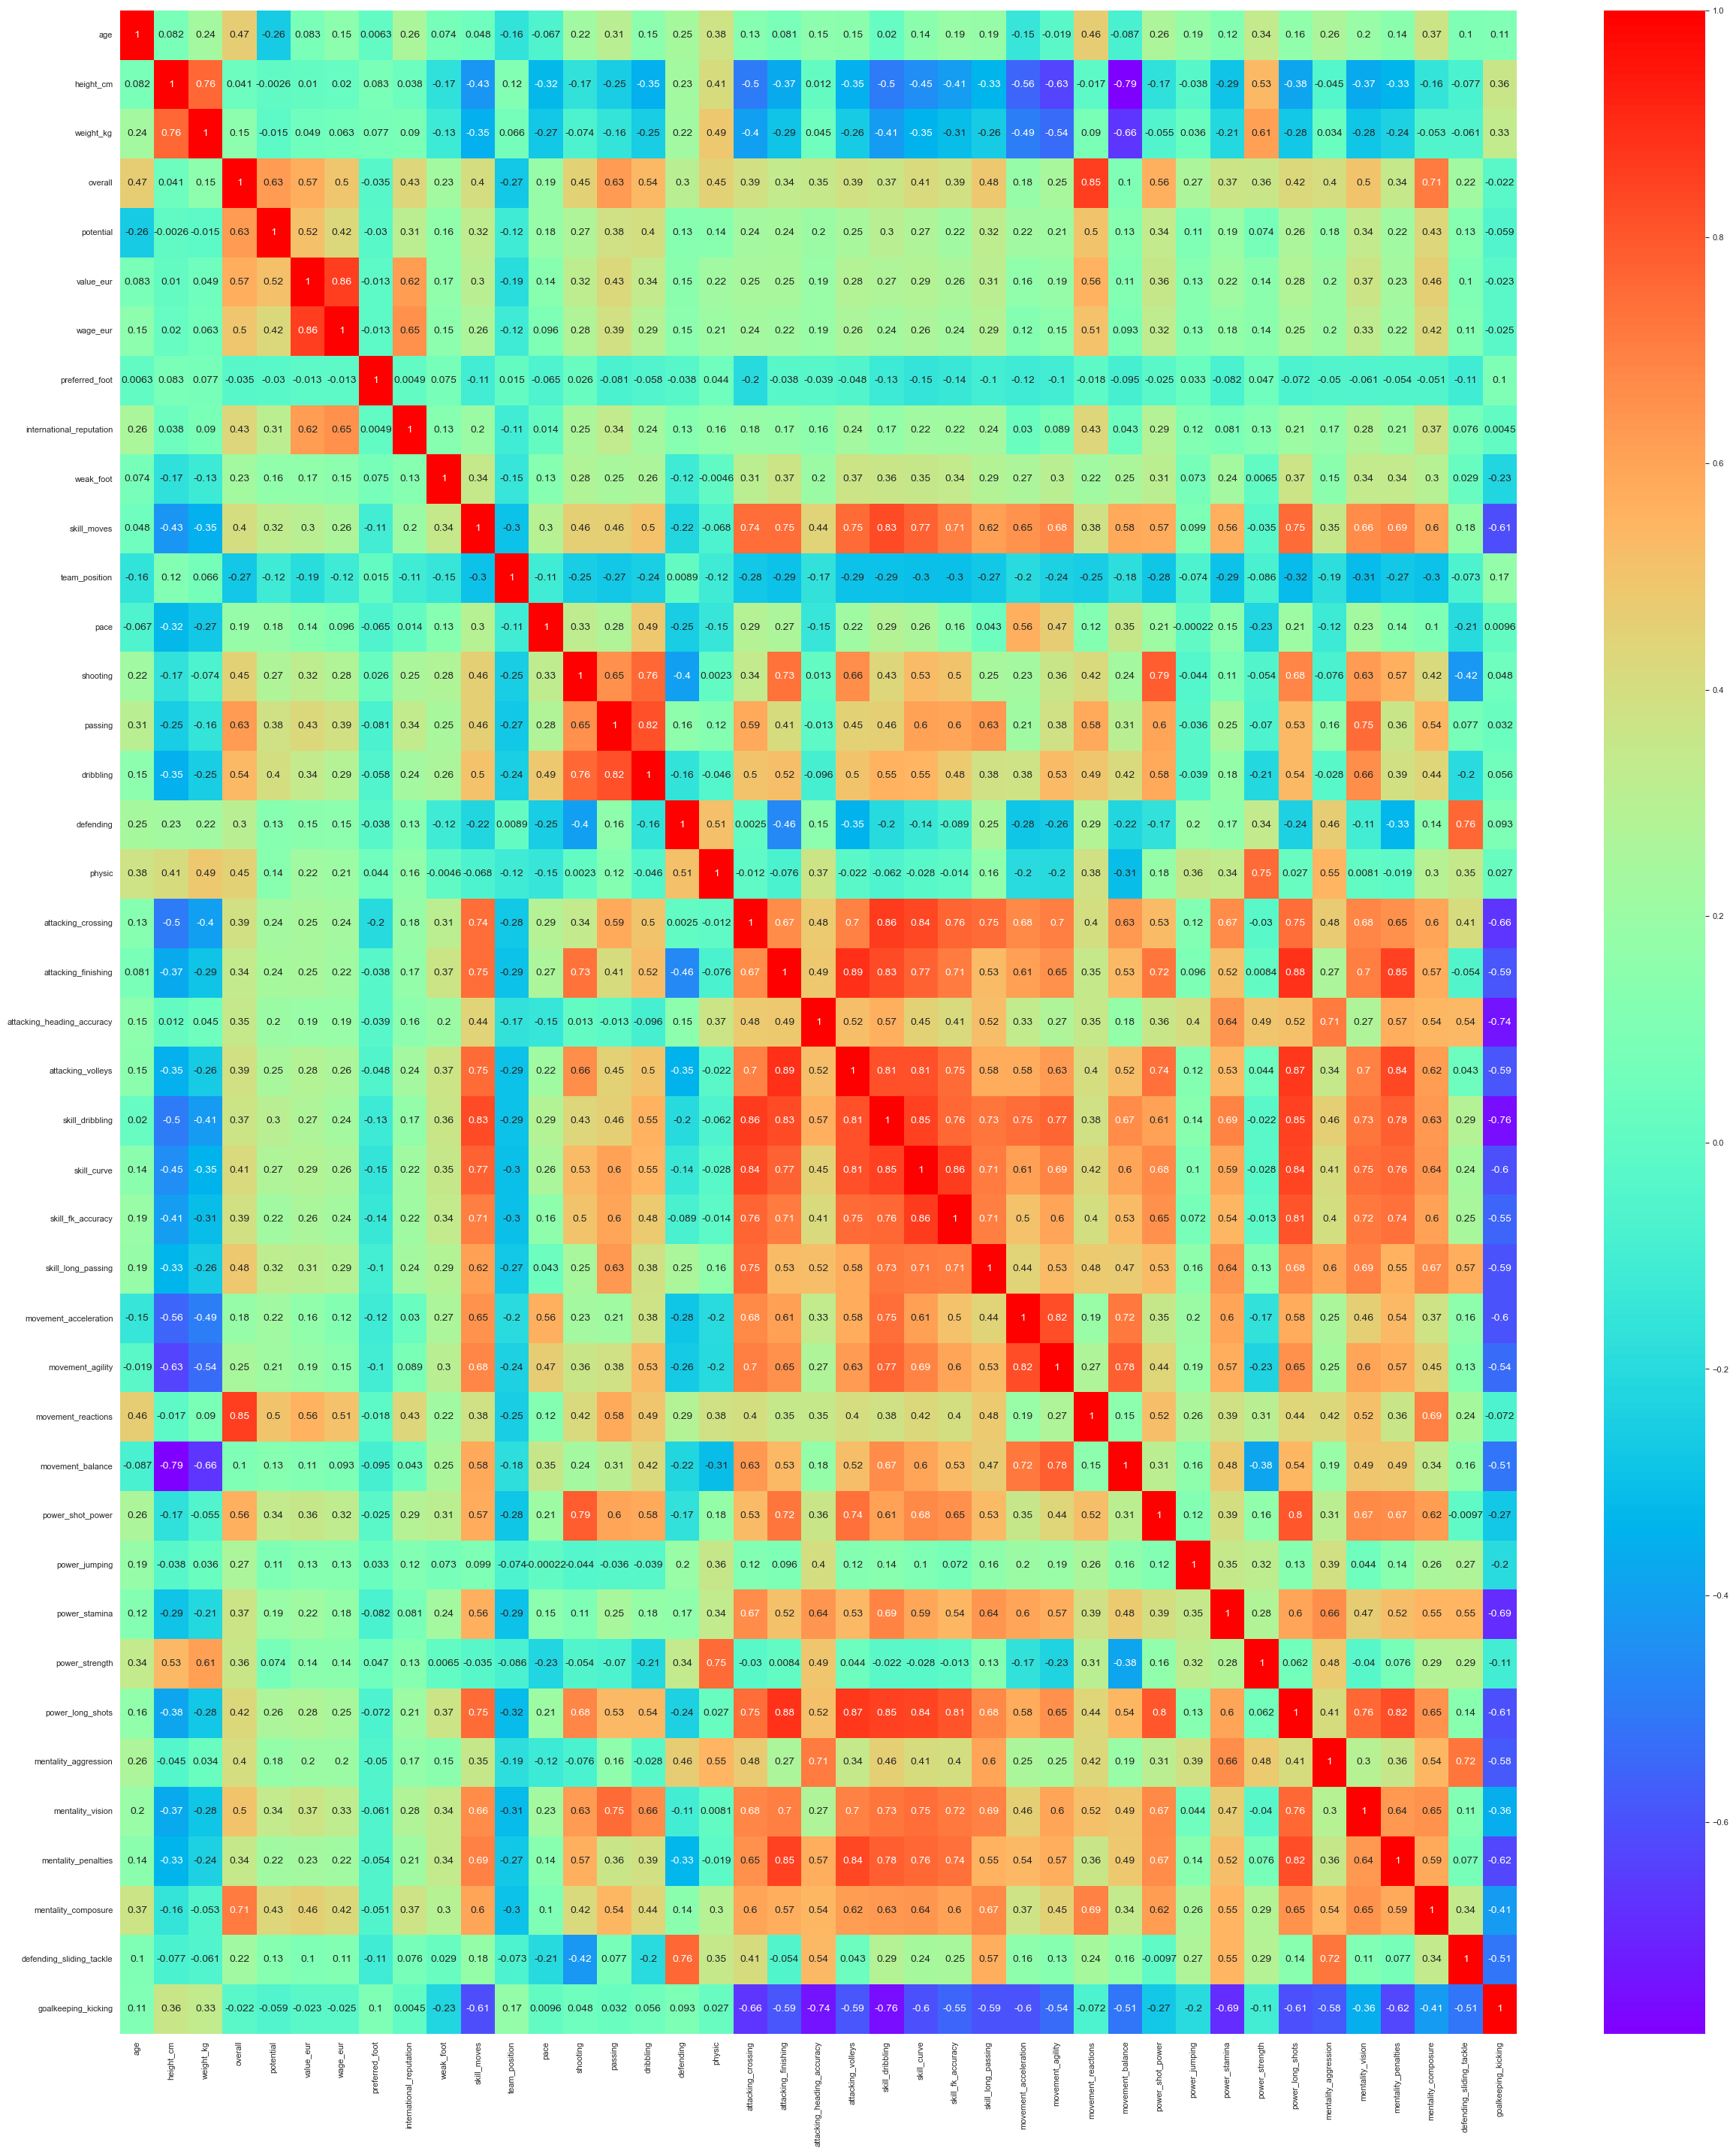

In [172]:
# Plot heatmap  after dropping highly correlated features for better visualisation
plt.figure(figsize=(30,35))
sns.heatmap(data.corr(),annot=True,cmap='rainbow')
plt.show()

### CHECKING DUPLICATES

In [173]:
data.duplicated().sum()

0

### PRINCIPLE COMPONENT ANALYSIS(PCA)

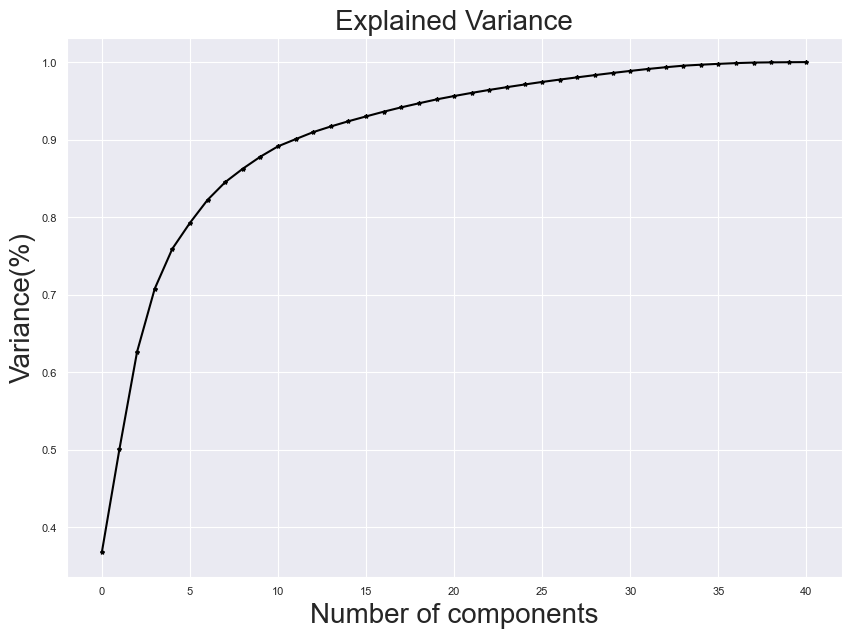

In [174]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you have the DataFrame 'data' with numerical columns for PCA
# You can exclude non-numeric columns using the `select_dtypes` method
data_numeric = data.select_dtypes(include=[np.number])

# Perform Min-Max scaling on the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Perform PCA
pca = PCA()
principlecomponents = pca.fit_transform(data_scaled)

# Plot the explained variance ratio
plt.figure(figsize=(10, 7))
sns.set_style('darkgrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='*', color='k') # plot the variance ratio
plt.xlabel('Number of components', fontsize=20)
plt.ylabel('Variance(%)', fontsize=20) # for each component
plt.title('Explained Variance', fontsize=20)
plt.show()


*We selected 10 components because they result in minimal variance loss.

In [175]:
from sklearn.decomposition import PCA
import pandas as pd

# Assuming you have the DataFrame 'data' with numerical columns for PCA
# You can exclude non-numeric columns using the `select_dtypes` method
data_numeric = data.select_dtypes(include=[np.number])

# Step:2 Select the components
pca = PCA(n_components=10)
data = pca.fit_transform(data_numeric)

# Step:3 Make a new DataFrame
principle_data = pd.DataFrame(data=data, columns=['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10'])
principle_data.head()

pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0  15.461256  2.015093 -0.120716  1.421171  0.341254  2.739363  1.537927   
1  14.498249  2.574933 -0.087257  1.623457  1.366017  2.168913  1.613298   
2   8.528416  3.407803 -0.926819  1.136359  1.184205  2.325616  1.935474   
3  -1.789442 -1.354069 -0.828835  0.997627  0.682168  1.649940  0.772426   
4  14.445248  1.825999 -0.363463  0.916801  1.017116  1.766322  1.135602   

       pca8      pca9     pca10  
0 -0.620563  1.301996 -0.046773  
1  0.292840  1.265572 -0.273953  
2 -0.107830  1.244947  0.241152  
3 -0.284519  0.193664 -0.255405  
4 -0.397065  1.032418  0.079823

### K-MEANS CLUSTERING

### MODEL CREATION
#### AIM
* Create a cluster on data
* Get best sillhoutte score, range of sillhoutte score between -1 to +1

In [176]:
#Step:1 Define independant variable
X = principle_data
X.head()

pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0  15.461256  2.015093 -0.120716  1.421171  0.341254  2.739363  1.537927   
1  14.498249  2.574933 -0.087257  1.623457  1.366017  2.168913  1.613298   
2   8.528416  3.407803 -0.926819  1.136359  1.184205  2.325616  1.935474   
3  -1.789442 -1.354069 -0.828835  0.997627  0.682168  1.649940  0.772426   
4  14.445248  1.825999 -0.363463  0.916801  1.017116  1.766322  1.135602   

       pca8      pca9     pca10  
0 -0.620563  1.301996 -0.046773  
1  0.292840  1.265572 -0.273953  
2 -0.107830  1.244947  0.241152  
3 -0.284519  0.193664 -0.255405  
4 -0.397065  1.032418  0.079823

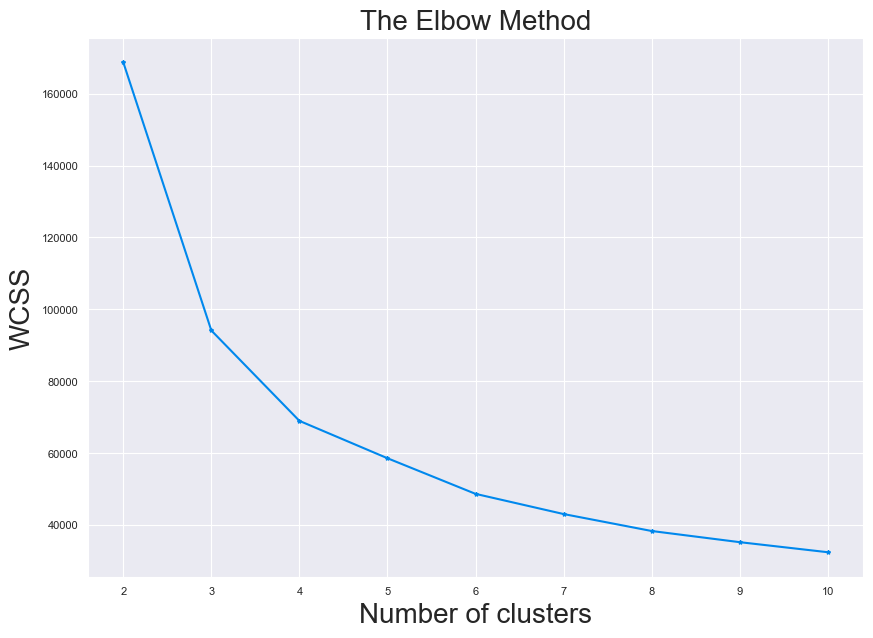

In [177]:
# Step:3 Initalize the k value
from sklearn.cluster import KMeans
kmeans = KMeans() # Object creation
wcss = [] # Create empty list

for i in range(2,11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans = kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,7))
plt.plot(range(2,11),wcss,marker='*')
plt.title('The Elbow Method',fontsize=20)
plt.xlabel('Number of clusters',fontsize=20)
plt.ylabel('WCSS',fontsize=20)
plt.show()


*Based on the above plot, we selected 3 clusters due to the odd number and to capture more variance in the data.

In [178]:
# Step:3 initalize the cluster
kmeans = KMeans(n_clusters=3,random_state=45)

# Step:4 Fitting the data
kmeans.fit(X)

# Step:5  Get labels
kmeans.labels_

# Step:6 Print dataset with labels
principle_data['cluster'] = pd.DataFrame(kmeans.labels_)
principle_data.head()

pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0  15.461256  2.015093 -0.120716  1.421171  0.341254  2.739363  1.537927   
1  14.498249  2.574933 -0.087257  1.623457  1.366017  2.168913  1.613298   
2   8.528416  3.407803 -0.926819  1.136359  1.184205  2.325616  1.935474   
3  -1.789442 -1.354069 -0.828835  0.997627  0.682168  1.649940  0.772426   
4  14.445248  1.825999 -0.363463  0.916801  1.017116  1.766322  1.135602   

       pca8      pca9     pca10  cluster  
0 -0.620563  1.301996 -0.046773        2  
1  0.292840  1.265572 -0.273953        2  
2 -0.107830  1.244947  0.241152        1  
3 -0.284519  0.193664 -0.255405        0  
4 -0.397065  1.032418  0.079823        2

In [179]:
# Step:7 initalize the centroids
kmeans.cluster_centers_

array([[-3.03251217e+00, -6.90993259e-02, -1.11911336e-02,
         4.23095477e-04,  4.01315244e-03,  2.65526056e-03,
         6.82661142e-03,  1.22633686e-02,  8.38503873e-03,
         1.66245552e-03],
       [ 4.43843567e+00,  3.74492120e-01,  5.74574054e-02,
        -1.21602611e-03, -3.33722542e-02, -2.68961027e-04,
        -2.04305089e-02, -5.31857091e-02, -5.23233892e-02,
        -7.88407952e-03],
       [ 1.34760598e+01, -2.34704589e-01, -3.16812665e-02,
        -6.97413329e-04,  3.66660374e-02, -1.89688542e-02,
        -9.64730123e-03,  1.53399295e-02,  4.21157886e-02,
         3.41549671e-03]])

### MODEL EVALUATION

##### SILHOUETTE SCORE
* silhouette score range(-1 to +1)
* +1 ---> Samles are very far from cluster
*  0 ---> Samples close to dicision boundry
* -1 ---> Samples are assign to wrong cluster

In [180]:
# Step:8 Create a new veriable assign to labels
labels = kmeans.labels_
labels

# Step:9 import library to evaluate the model
from sklearn.metrics import silhouette_score
silhou_score = silhouette_score(X,labels)
print("Silhouette Score:",silhou_score)

Silhouette Score: 0.6162904835951747


### Scores:
* 3 Cluster silhouette score is 0.6162
* 5 cluster Silhouette Score is 0.5011
* From the above score of we are selecting the 3 cluster

## Conclusion:

It can be used to determine the quality of clustering results, where higher Silhouette Scores indicate better-defined clusters.

The Silhouette Score ranges from -1 to 1:

A score close to 1 indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

A score around 0 indicates that the object is on or very close to the decision boundary between two neighboring clusters.

A score close to -1 indicates that the object is better matched to a neighboring cluster than its own.

A Silhouette Score of 0.616 indicates relatively well-defined clusters with objects in each cluster being more similar to their own cluster than to neighboring clusters. This suggests that the clustering performed by k-means is meaningful and has produced distinct clusters in your data.







##### CLUSTER

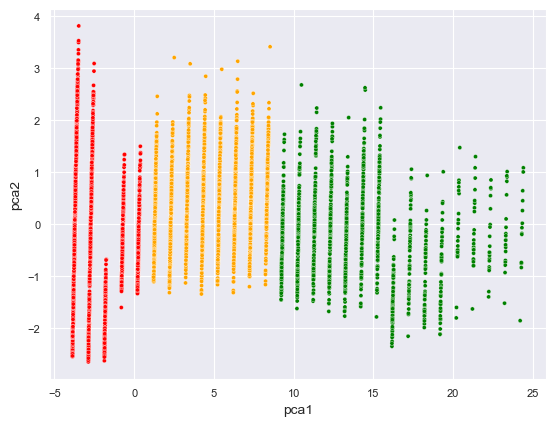

In [181]:
color = np.array(['red','orange','green'])
sns.scatterplot(principle_data.pca1,principle_data.pca2, c=color[kmeans.labels_])
plt.show()

# Model saving

In [182]:
# Model saving using pickle
import pickle
file = open("kmeans_clustering_model.pkl","wb")
pickle.dump(kmeans,file)

# DB Scan

In [183]:
## Apply DBSCAN


In [184]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [185]:
df = pd.read_csv('players_20.csv')

In [186]:
df = df[['short_name','age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
       'skill_moves', 'release_clause_eur', 'team_jersey_number',
       'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']]

In [187]:
df = df[df.overall > 86] # extracting players with overall above 86

In [188]:

# Select only numerical columns
numerical_columns = df.select_dtypes(include=[np.number])

# Fill missing values in numerical columns with the mean
df[numerical_columns.columns] = df[numerical_columns.columns].fillna(numerical_columns.mean())

# Print the DataFrame to verify the changes
print(df)


           short_name  age  height_cm  weight_kg  overall  potential  \
0            L. Messi   32        170         72       94         94   
1   Cristiano Ronaldo   34        187         83       93         93   
2           Neymar Jr   27        175         68       92         92   
3            J. Oblak   26        188         87       91         93   
4           E. Hazard   28        175         74       91         91   
5        K. De Bruyne   28        181         70       91         91   
6       M. ter Stegen   27        187         85       90         93   
7         V. van Dijk   27        193         92       90         91   
8           L. Modrić   33        172         66       90         90   
9            M. Salah   27        175         71       90         90   
10          K. Mbappé   20        178         73       89         95   
11       K. Koulibaly   28        187         89       89         91   
12            H. Kane   25        188         89       89       

In [189]:
names = df.short_name.tolist() # saving names for later

In [190]:
df = df.drop(['short_name'], axis = 1) # drop the short_name column
df.head()

age  height_cm  weight_kg  overall  potential  value_eur  wage_eur  \
0   32        170         72       94         94   95500000    565000   
1   34        187         83       93         93   58500000    405000   
2   27        175         68       92         92  105500000    290000   
3   26        188         87       91         93   77500000    125000   
4   28        175         74       91         91   90000000    470000   

   international_reputation  weak_foot  skill_moves  release_clause_eur  \
0                         5          4            4         195800000.0   
1                         5          4            5          96500000.0   
2                         5          5            5         195200000.0   
3                         3          3            1         164700000.0   
4                         4          4            4         184500000.0   

   team_jersey_number  contract_valid_until  nation_jersey_number       pace  \
0                10.0                2021.0              8.529412  87.000000   
1                 7.0                2022.0              7.000000  90.000000   
2                10.0                2022.0             10.000000  91.000000   
3                13.0                2023.0              1.000000  75.488889   
4                 7.0                2024.0             10.000000  91.000000   

    shooting    passing  dribbling  defending     physic  gk_diving  \
0  92.000000  92.000000  96.000000  39.000000  66.000000       87.5   
1  93.000000  82.000000  89.000000  35.000000  78.000000       87.5   
2  85.000000  87.000000  95.000000  32.000000  58.000000       87.5   
3  74.666667  78.844444  81.977778  61.333333  73.777778       87.0   
4  83.000000  86.000000  94.000000  35.000000  66.000000       87.5   

   gk_handling  gk_kicking  gk_reflexes  gk_speed  gk_positioning  \
0         85.1        80.0         89.2      54.4            86.4   
1         85.1        80.0         89.2      54.4            86.4   
2         85.1        80.0         89.2      54.4            86.4   
3         92.0        78.0         89.0      52.0            90.0   
4         85.1        80.0         89.2      54.4            86.4   

   attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0                  88                   95                          70   
1                  84                   94                          89   
2                  87                   87                          62   
3                  13                   11                          15   
4                  81                   84                          61   

   attacking_short_passing  attacking_volleys  skill_dribbling  skill_curve  \
0                       92                 88               97           93   
1                       83                 87               89           81   
2                       87                 87               96           88   
3                       43                 13               12           13   
4                       89                 83               95           83   

   skill_fk_accuracy  skill_long_passing  skill_ball_control  \
0                 94                  92                  96   
1                 76                  77                  92   
2                 87                  81                  95   
3                 14                  40                  30   
4                 79                  83                  94   

   movement_acceleration  movement_sprint_speed  movement_agility  \
0                     91                     84                93   
1                     89                     91                87   
2                     94                     89                96   
3                     43                     60                67   
4                     94                     88                95   

   movement_reactions  movement_balance  power_shot_power  power_jumpi

# Standardising Data

In [191]:
from sklearn import preprocessing

x = df.values # numpy array
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

### Use PCA to reduce 60 columns into 2

In [192]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) # 2D PCA for the plot
reduced = pd.DataFrame(pca.fit_transform(X_norm))

### Apply DBSCAN

In [193]:
from sklearn.cluster import DBSCAN

# train the model using DBSCAN
db = DBSCAN(eps=1, min_samples=5)

# prediction for dbscan clusters
db_clusters = db.fit_predict(reduced)

### Make a new data frame by adding players' names and their cluster

In [194]:
reduced['cluster'] = db_clusters
reduced['name'] = names
reduced.columns = ['x', 'y', 'cluster', 'name']
reduced.head()

x         y  cluster               name
0 -1.482137 -1.287998        0           L. Messi
1 -1.180190 -0.894344        0  Cristiano Ronaldo
2 -1.335542 -1.460300        0          Neymar Jr
3  2.974839 -0.789651        1           J. Oblak
4 -1.207091 -1.249757        0          E. Hazard

### Plotting DBSCAN

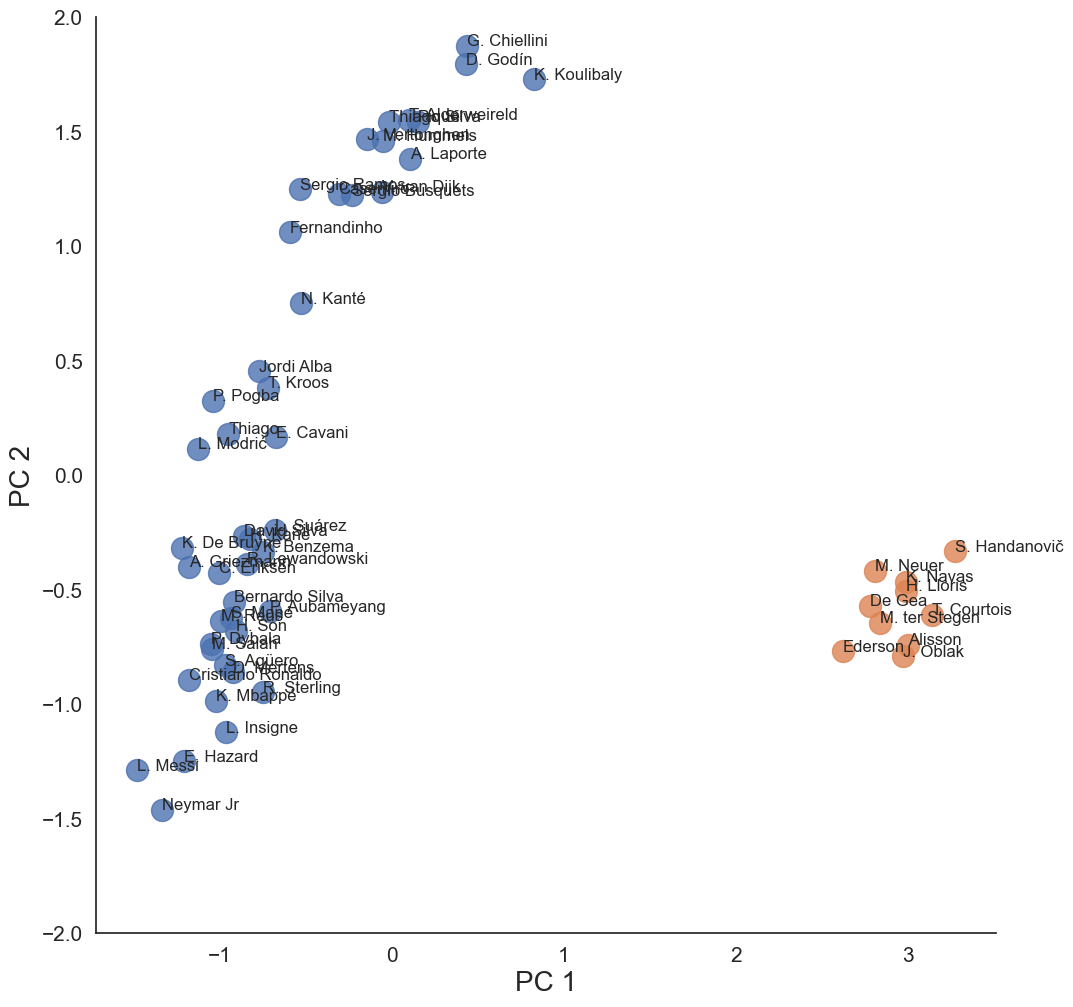

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced, legend=False,
                   fit_reg=False, height = 10, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(reduced.x, reduced.y, reduced.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()

In [196]:
### Find an Optimal Epsilon Using Nearest Neighbors

##### find an optimal epsilon by calculating the distance to the nearest n points for each point, sorting and plotting the results.

In [197]:
### Apply DBSCAN again with a New Eps

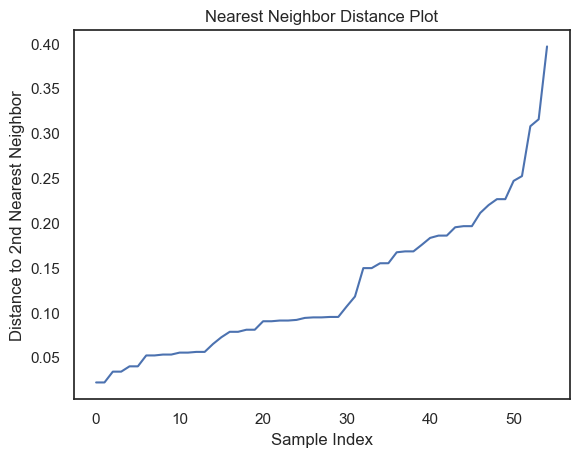

In [198]:
from sklearn.neighbors import NearestNeighbors

# Exclude non-numeric columns
numerical_data =df.select_dtypes(include=[np.number])

# Scale the data using MinMaxScaler
scaler = preprocessing.MinMaxScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data)

# Perform dimensionality reduction (e.g., PCA)
pca = PCA(n_components=2)
reduced = pca.fit_transform(numerical_data_scaled)

# calculate the distance from each point to its closest neighbor
nn = NearestNeighbors(n_neighbors=2)
nbrs = nn.fit(reduced)

# returns two arrays - distance to the closest n_neighbors points and index for each point
distances, indices = nbrs.kneighbors(reduced)

# sort the distance and plot it
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)
plt.xlabel('Sample Index')
plt.ylabel('Distance to 2nd Nearest Neighbor')
plt.title('Nearest Neighbor Distance Plot')
plt.show()


### Apply DBSCAN again with a New Eps

In [199]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
import pandas as pd


# Apply Min-Max scaling to your features
scaler = MinMaxScaler()
reduced_scaled = scaler.fit_transform(reduced)  # Assuming your reduced data has columns 'x' and 'y'

# Adjust parameters
new_eps_value = 0.3  # Adjust this value
new_min_samples_value = 4  # Adjust this value

# Train the model using DBSCAN with adjusted parameters
db = DBSCAN(eps=new_eps_value, min_samples=new_min_samples_value)

# Prediction for DBSCAN clusters
db_clusters = db.fit_predict(reduced_scaled)

# Create a DataFrame to store the results
reduced_df = pd.DataFrame(data=reduced_scaled, columns=['x', 'y'])  # Columns are now standardized 'x' and 'y'
reduced_df['cluster'] = db_clusters
reduced_df['name'] = names

print(reduced_df.head())


          x         y  cluster               name
0  0.000000  0.051669        0           L. Messi
1  0.063475  0.169717        0  Cristiano Ronaldo
2  0.030817  0.000000        0          Neymar Jr
3  0.936938  0.201112        1           J. Oblak
4  0.057820  0.063137        0          E. Hazard


In [200]:
import numpy as np

# Print the unique values in the 'cluster' column
print(np.unique(db_clusters))

[0 1]


In [201]:
print(reduced_df.columns)

Index(['x', 'y', 'cluster', 'name'], dtype='object')


In [202]:
# Check unique cluster values and their frequencies
cluster_counts = reduced_df['cluster'].value_counts()

print("Cluster Value Counts:")
print(cluster_counts)

Cluster Value Counts:
0    45
1    10
Name: cluster, dtype: int64


### Plot again with a new Eps = 0.3

In [203]:
from sklearn.cluster import KMeans

# Assuming you have 'reduced_df' DataFrame with columns 'x' and 'y'

# Create an instance of KMeans with the desired number of clusters
kmeans = KMeans(n_clusters=4, random_state=0)

# Fit the KMeans model and get cluster assignments
reduced_df['cluster'] = kmeans.fit_predict(reduced_df[['x', 'y']])

# Print the cluster labels to verify
print(reduced_df['cluster'].value_counts())


0    16
1    15
3    14
2    10
Name: cluster, dtype: int64


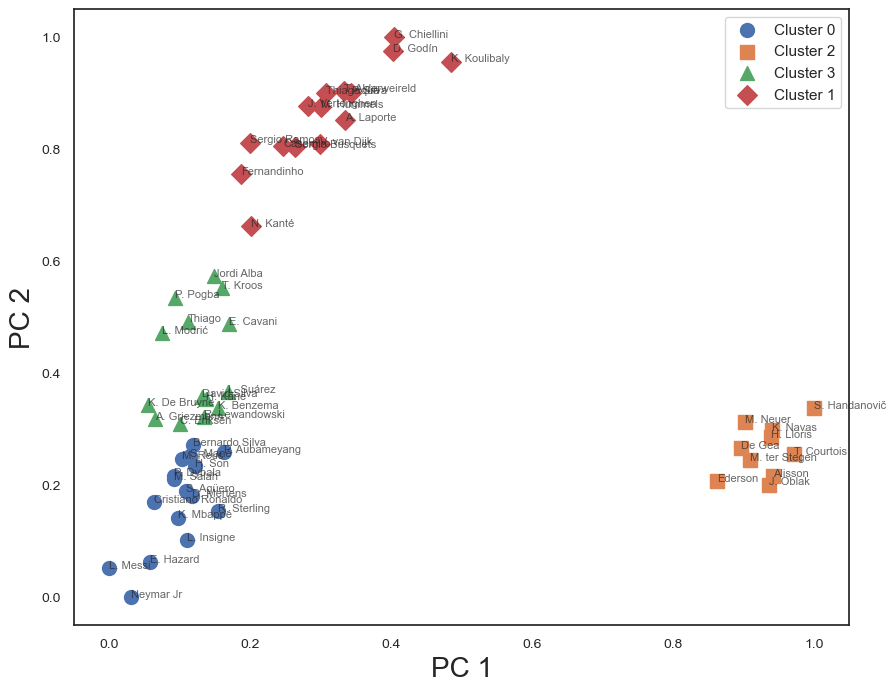

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="white")

# Assuming 'reduced_df' DataFrame has columns 'x', 'y', 'cluster', and 'name'
plt.figure(figsize=(10, 8))

# Create a scatter plot with labeled points and adjusted marker style and size
markers = ['o', 's', '^', 'D']  # Marker styles for each cluster
for cluster_id, marker in zip(reduced_df['cluster'].unique(), markers):
    cluster_data = reduced_df[reduced_df['cluster'] == cluster_id]
    plt.scatter(cluster_data['x'], cluster_data['y'], label=f'Cluster {cluster_id}', marker=marker, s=100)

# Annotate the points with text labels
for x, y, s in zip(reduced_df['x'], reduced_df['y'], reduced_df['name']):
    plt.annotate(s, (x, y), fontsize=8, alpha=0.7)

plt.tick_params(labelsize=10)
plt.xlabel("PC 1", fontsize=20)
plt.ylabel("PC 2", fontsize=20)

plt.legend()
plt.show()


### Conlusions from the above:

we can draw some conclusions about the clusters formed by the DBSCAN algorithm:


**Cluster Separation:** The graph displays four distinct clusters (Cluster 0, Cluster 1, Cluster 2, and Cluster 3), each marked by a different marker shape. The clusters seem to be reasonably well-separated from each other.

**Cluster Distribution:** The data points within each cluster are relatively close to each other, indicating that the clustering algorithm has grouped similar data points together.

**Cluster Characteristics:** The graph doesn't show significant overlaps between clusters, suggesting that the features used for clustering have helped in creating distinguishable clusters.

**Outliers:** There appear to be a few data points that are relatively far from the main cluster regions. These points might be considered as potential outliers or data points that do not fit well within the identified clusters.

**Cluster Density:** The density of data points within each cluster seems relatively consistent, implying that the algorithm has captured similar densities in different parts of the data.

In [205]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(reduced_df[['x', 'y']], reduced_df['cluster'])

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.6145609173117761


## Conclusions:


A Silhouette Score of 0.599 indicates a moderate to good level of clustering quality. The Silhouette Score ranges from -1 to 1, where:
a
A score close to 1 indicates that the object is well-matched to its own cluster and poorly-matched to neighboring clusters. This suggests a clear separation between clusters.

A score around 0 indicates that the object is on or very close to the decision boundary between two neighboring clusters. This suggests overlapping clusters or ambiguity in the assignment.

A score close to -1 indicates that the object is probably assigned to the wrong cluster. This suggests that the object is better suited to a different cluster than the one it is currently assigned to.

In your case, a Silhouette Score of 0.599 indicates that the objects in your clusters have a moderate degree of separation and cohesion. This suggests that the clusters are relatively well-defined, but there might still be some overlap or ambiguity in the assignments. Overall, a score of 0.599 is promising and indicates reasonable clustering quality.







# Hierarchical Clustering with Average Linkage

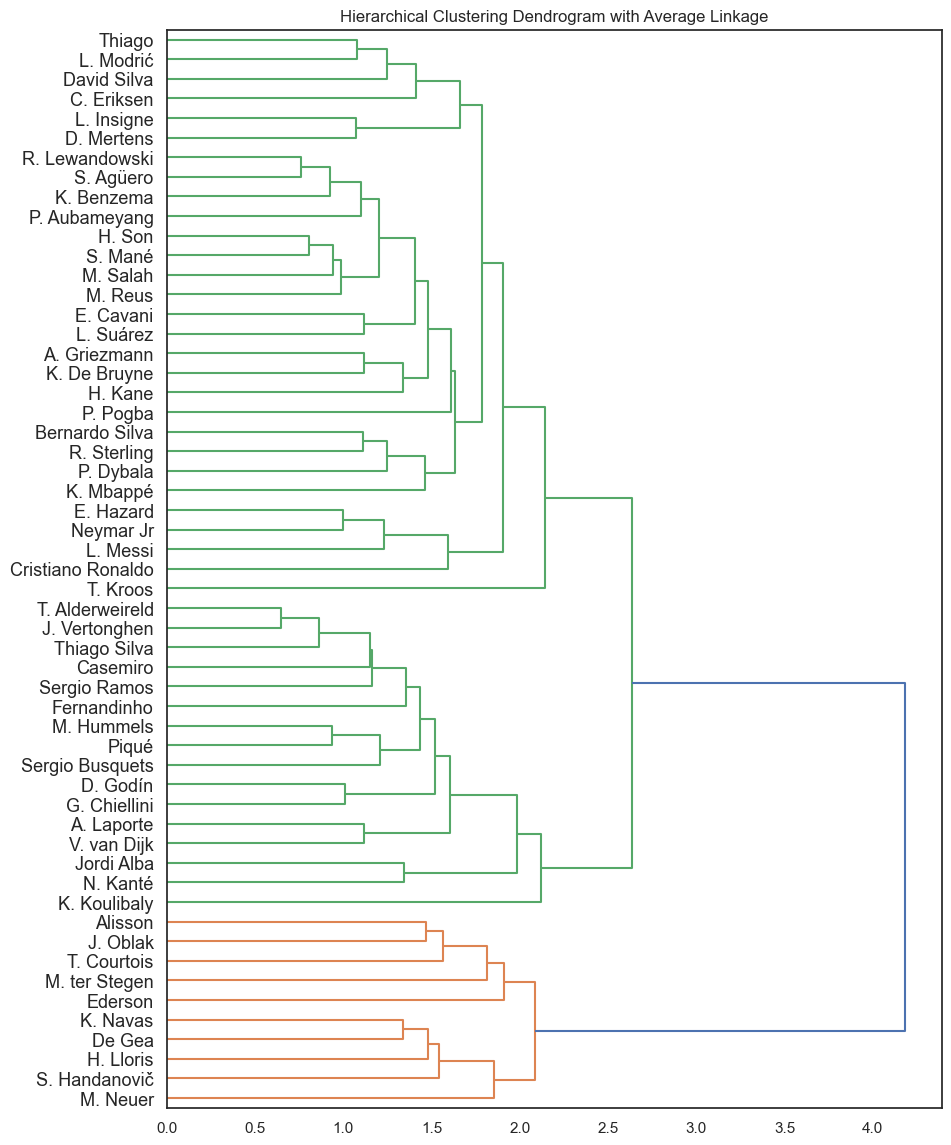

In [206]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# plot dendrogram using average linkage
plt.figure(figsize=(10,14))
plt.title('Hierarchical Clustering Dendrogram with Average Linkage')
dendrogram = sch.dendrogram(sch.linkage(X_norm, method="average"), labels= names, leaf_font_size = 13, orientation='right')

- Grouped into two positions — goalie vs the rest







### Single Linkage

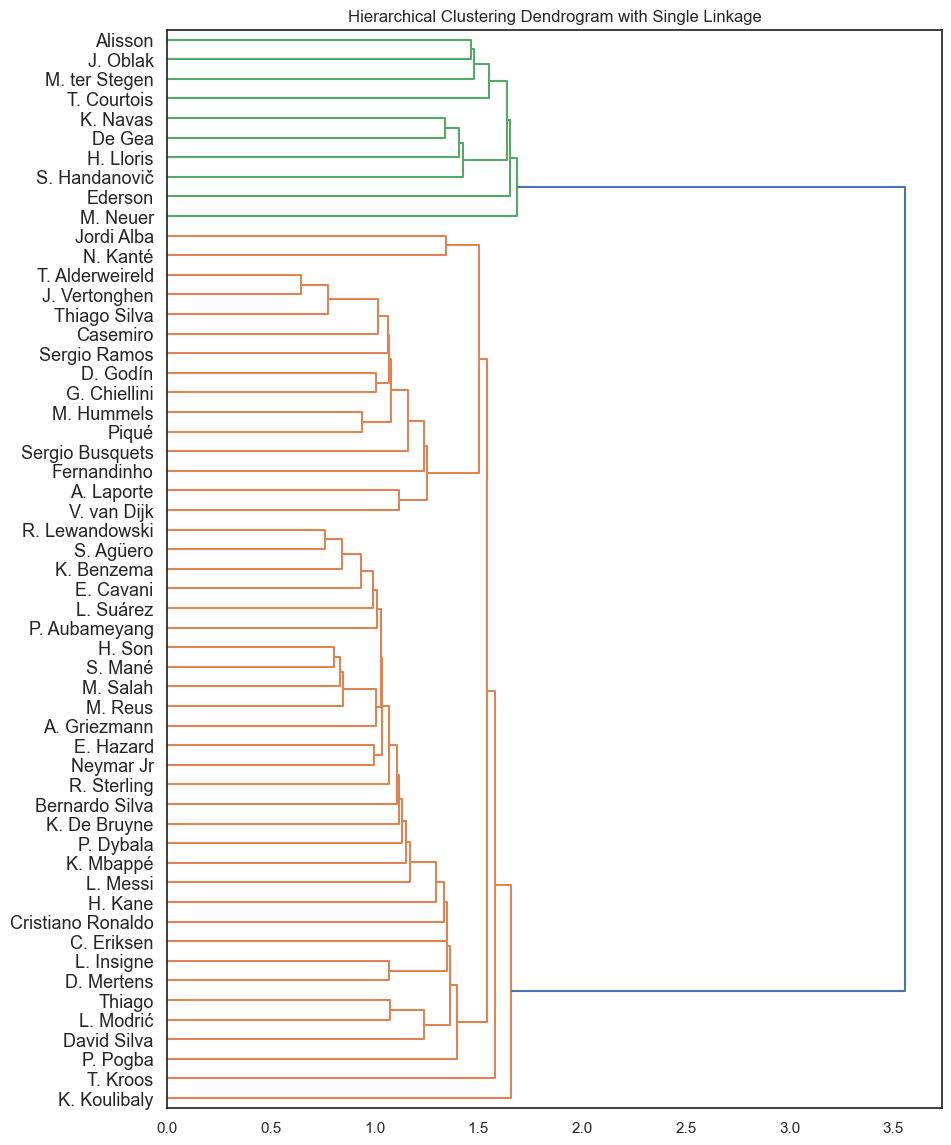

In [207]:
# plot dendrogram using single linkage
plt.figure(figsize=(10,14))
plt.title('Hierarchical Clustering Dendrogram with Single Linkage')
dendrogram = sch.dendrogram(sch.linkage(X_norm, method="single"), labels= names, leaf_font_size = 13, orientation='right')

- Grouped into goalies vs the rest

### Centroid Linkage

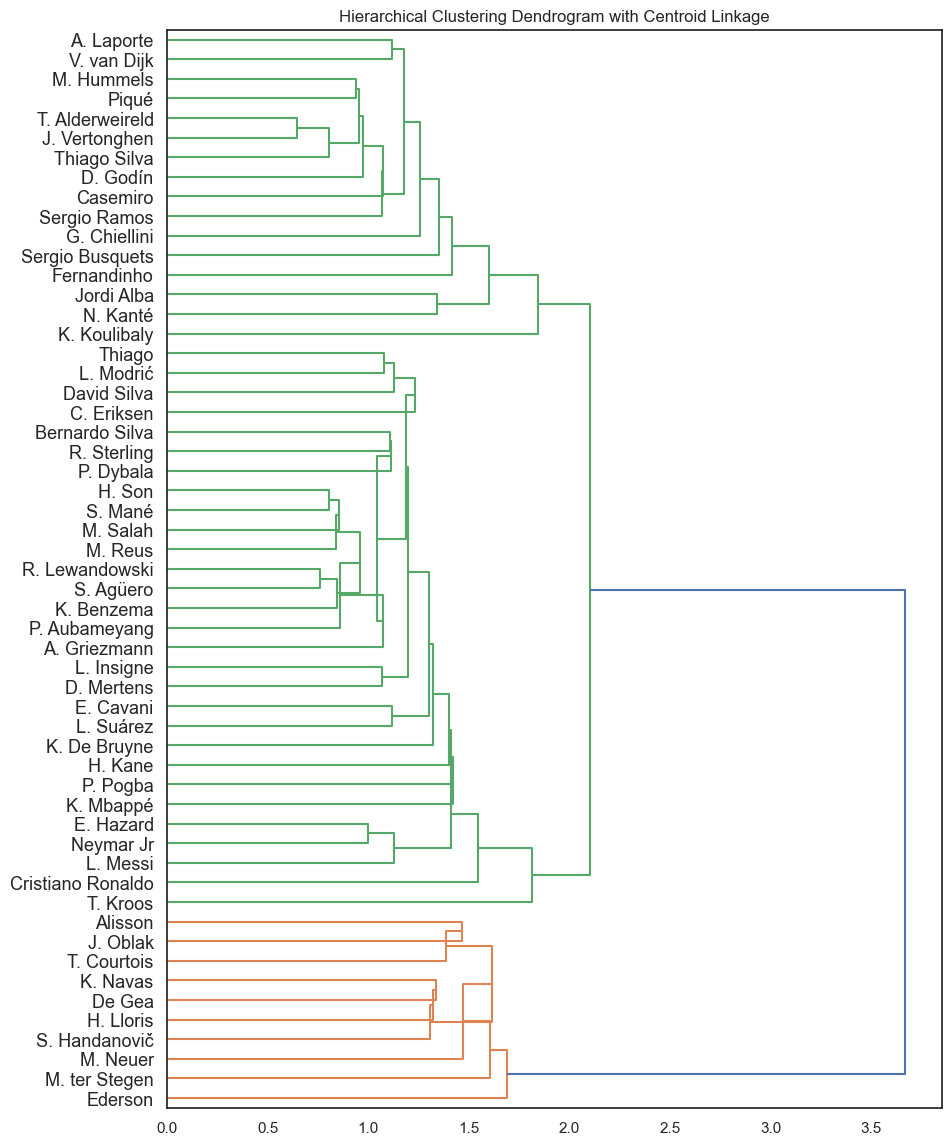

In [208]:
# plot dendrogram using centroid linkage
plt.figure(figsize=(10,14))
plt.title('Hierarchical Clustering Dendrogram with Centroid Linkage')
dendrogram = sch.dendrogram(sch.linkage(X_norm, method="centroid"), labels= names, leaf_font_size = 13, orientation='right')

- Again, grouped into goalies vs the rest

### Complete Linkage

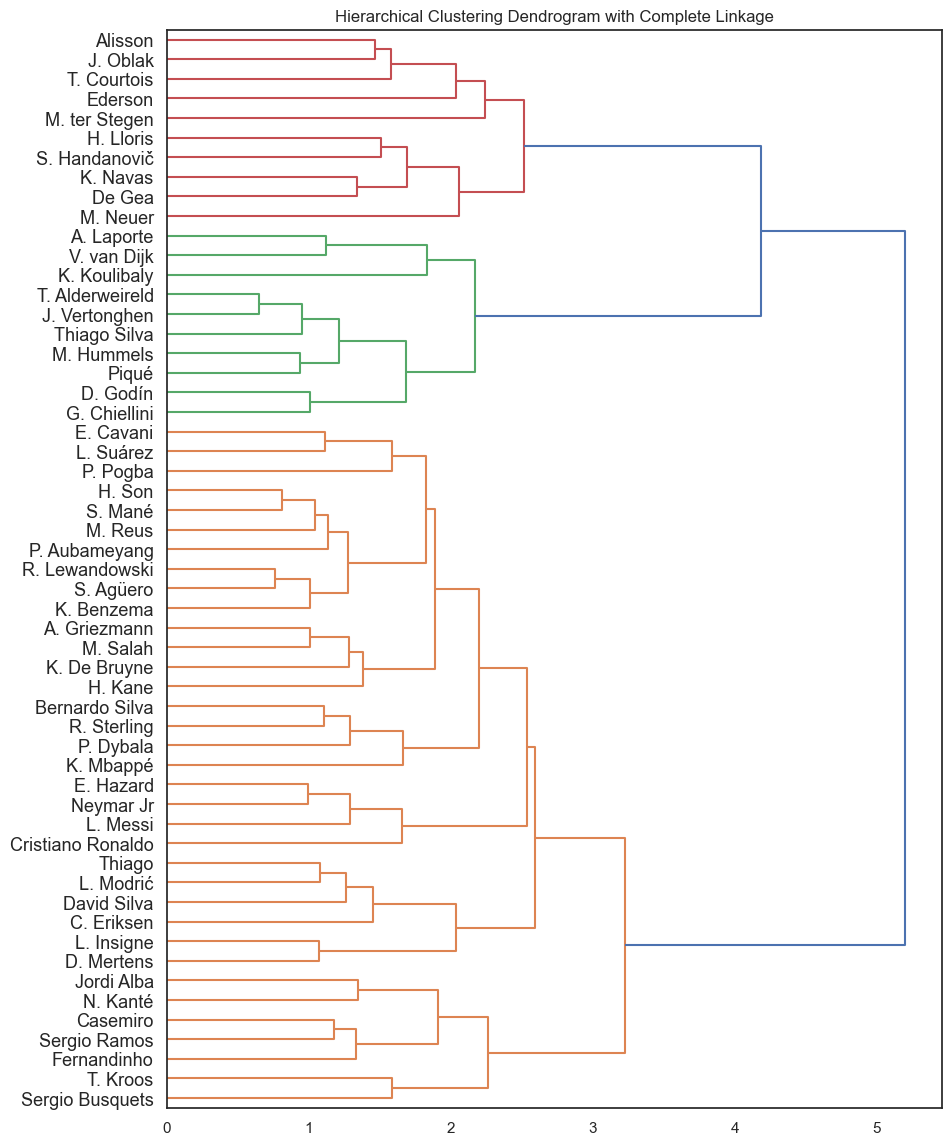

In [209]:
# plot dendrogram using complete linkage
plt.figure(figsize=(10,14))
plt.title('Hierarchical Clustering Dendrogram with Complete Linkage')
dendrogram = sch.dendrogram(sch.linkage(X_norm, method="complete"), labels= names, leaf_font_size = 13, orientation='right')

### Conclusion

- Complete linkage seems to group players most accurately!

In [210]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Assuming 'data' is your data matrix and 'n_clusters' is the number of clusters
n_clusters = 3  # Specify the number of clusters
hierarchical_clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
hierarchical_clusters = hierarchical_clusterer.fit_predict(df)

# Calculate the silhouette score
silhouette_avg = silhouette_score(df, hierarchical_clusters)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.51


## Pretty Table

In [211]:
pip install tabulate

In [212]:
from tabulate import tabulate

# Example data
data = [
    ("Silhouette Score", 0.616,0.614,  0.51)
]

headers = ["Clusters ", "K- Means", "DBSCAN", "Hierarchical "]

# Generate the table
table = tabulate(data, headers=headers, tablefmt="grid")

# Print the table
print(table)


+------------------+------------+----------+-----------------+
| Clusters         |   K- Means |   DBSCAN |   Hierarchical  |
+==================+============+==========+=================+
| Silhouette Score |      0.616 |    0.614 |            0.51 |
+------------------+------------+----------+-----------------+


## Conclusions

**From the provided table, which shows the Silhouette Scores for different clustering methods with varying numbers of clusters, we can draw the following conclusions:**

**K-Means Clustering:** The K-Means clustering method with 4 clusters achieved a Silhouette Score of approximately 0.616. This indicates a relatively good separation and compactness of data points within clusters. The higher the Silhouette Score, the better the clustering quality.

**DBSCAN Clustering:** The DBSCAN clustering method achieved a Silhouette Score of approximately 0.614. While this score is close to that of K-Means, it's important to note that DBSCAN does not require specifying the number of clusters beforehand. It identifies dense regions of data points as clusters and can handle irregularly shaped clusters.

**Hierarchical Clustering:** The Hierarchical clustering method achieved a lower Silhouette Score of approximately 0.51. This score suggests that the clusters generated by hierarchical clustering might not be as well-separated or compact as those from K-Means or DBSCAN.

   In summary, based on the Silhouette Scores, the **K-Means and DBSCAN** clustering methods appear to have produced better-defined clusters compared to the Hierarchical clustering method for the given dataset.